In [1]:
import numpy as np
import pandas as pd
# from icecream import ic
import subprocess
import json
import os
import plotly.graph_objects as go
from matplotlib import pyplot as plt
# import geopandas as gpd
# from shapely.geometry import Polygon
# from shapely.ops import cascaded_union, unary_union
# from shapely import geometry
# from geopy import distance
%matplotlib inline
# import plotly.express as px 
from scipy import signal
from tqdm import tqdm
# from Bio import Phylo
# import ete3
import itertools
import sklearn
from sklearn import metrics
import jax.numpy as jnp

ModuleNotFoundError: No module named 'jax'

In [2]:
full = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data1/CRyPTIC_reuse_table_20221019_cleaned.csv')


In [ ]:
AMI_MIC=[0.125, 0.5, 1.0, 16.0, 32.0, 2.0, 4.0, 8.0]
BDQ_MIC=[0.03, 0.06, 0.0075, 0.015, 0.12, 0.004, 0.25, 0.5, 1.0, 4.0, 2.0]
CFZ_MIC=[0.03, 0.12, 0.06, 0.015, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0]
DLM_MIC=[0.0075, 0.004, 0.015, 0.03, 0.06, 0.12, 0.25, 2.0, 1.0, 0.5]
EMB_MIC=[1.0, 2.0, 4.0, 8.0, 0.5, 16.0, 0.25, 32.0, 0.125, 0.03, 64.0, 0.12]
ETH_MIC=[1.0, 2.0, 0.5, 16.0, 4.0, 8.0, 0.125]
INH_MIC=[0.05, 3.2, 0.01125, 1.6, 6.4, 0.2, 0.8, 0.4, 25.6, 0.1, 12.8]
KAN_MIC=[2.0, 0.5, 4.0, 32.0, 8.0, 16.0]
LEV_MIC=[0.5, 0.25, 1.0, 4.0, 8.0, 0.06, 2.0, 16.0]
LZD_MIC=[0.5, 0.25, 1.0, 0.12, 0.06, 0.15, 2.0, 4.0, 0.03, 8.0]
MXF_MIC=[0.25, 0.5, 0.12, 0.03, 4.0, 8.0, 1.0, 2.0]
RIF_MIC=[8.0, 0.03, 0.12, 16.0, 0.06, 0.015, 0.25, 0.5, 4.0, 2.0, 1.0]
RFB_MIC=[0.03, 4.0, 2.0, 0.12, 1.0, 0.25, 0.5]

In [ ]:
def find_range(target_value, quest_value):
    if target_value / 2 <= quest_value <= target_value * 2:
        
        return target_value
    pairwise_mse = [(true - pred) ** 2 for true, pred in zip(target_value, quest_value)]

    # mean_squared_error(y_true, y_pred)
    
    return None


In [21]:
[(true - pred) ** 2 for true, pred in zip([100,99],[19,91])]

    # mean_squared_error(y_true, y_pred)

[6561, 64]

In [68]:
import numpy as np

def find_range_vectorized(target_values, quest_values):
    # Convert lists to numpy arrays for efficient broadcasting
    target_values = np.array(target_values) # Reshape for broadcasting
    quest_values = np.array(quest_values)

    # Perform broadcasting to compare each quest value against all target values
    # This creates a boolean matrix where rows correspond to target values and columns to quest values
    # in_range_matrix = (target_values / 2 <= quest_values) & (quest_values <= target_values * 2)
    in_range_matrix = np.abs(np.log2(target_values) - np.log2(quest_values))
    in_range_matrix  = in_range_matrix  <= 1
    
    mse = [(true - pred) ** 2 for true, pred in zip(target_values,quest_values)]
    # print(mse)
    return in_range_matrix, mse

# Example usage
target_values = [[10, 20, 30, 40, 50], [10, 20, 30, 40, 50]]
quest_values = [[25, 5, 60, 1, 1], [10, 20, 30, 40, 50]]
result = find_range_vectorized(target_values, quest_values)
# print(result)


In [88]:
np.array([[ 225,  225,  900, 1521, 2401],[0, 0, 0, 0, 0]])

array([[ 225,  225,  900, 1521, 2401],
       [   0,    0,    0,    0,    0]])

In [66]:
target_values.shape

AttributeError: 'list' object has no attribute 'shape'

In [82]:
result[0][:,0]

def EA_calc(target_matrix: np.array):
    drugs = ['AMI', 'BDQ', 'CFZ', 'DLM', 'EMB', 'ETH', 'INH', 'KAN', 'LEV', 'LZD', 'MXF', 'RIF', 'RFB']
    for x, drug in zip(range(target_matrix.shape[1]), drugs):
        ea_count = len([item for item in target_matrix[:,x] if item == True])
        ea_rate = (ea_count / len(target_matrix[:,x])) * 100
        print(drug, ea_rate)

EA_calc(result[0])

AMI 50.0
BDQ 50.0
CFZ 100.0
DLM 50.0
EMB 50.0


In [89]:
def MSE_calc(target_matrix: np.array):
    drugs = ['AMI', 'BDQ', 'CFZ', 'DLM', 'EMB', 'ETH', 'INH', 'KAN', 'LEV', 'LZD', 'MXF', 'RIF', 'RFB']
    for x, drug in zip(range(target_matrix.shape[1]), drugs):
        mse = np.mean(target_matrix[:,x])
        print(drug, mse)
        
MSE_calc(np.array([[ 225,  225,  900, 1521, 2401],[0, 0, 0, 0, 0]]))

AMI 112.5
BDQ 112.5
CFZ 450.0
DLM 760.5
EMB 1200.5


In [60]:
import numpy as np

# Example MIC values (using numeric values for simplicity)
reference_MIC = np.array([2, 4, 8, 16, 32])
evaluated_MIC = np.array([4, 4, 16, 16, 64])
reference_MIC =  np.array([10, 20, 30, 40, 50])
evaluated_MIC =  np.array([25, 5, 60, 1, 1])
# Calculate the difference in log2 scale to handle doubling
difference = np.abs(np.log2(reference_MIC) - np.log2(evaluated_MIC))
print(difference)
print(difference <= 1)
# Count the agreements within ±1 doubling dilution (log2 scale)
ea_count = np.sum(difference <= 1)

# Calculate EA rate
ea_rate = (ea_count / len(reference_MIC)) * 100

print(f"Essential Agreement rate: {ea_rate}%")


[1.32192809 2.         1.         5.32192809 5.64385619]
[False False  True False False]
Essential Agreement rate: 20.0%


In [ ]:
def find_range(target_value, quest_value):
    if target_value / 2 <= quest_value <= target_value * 2:
        return True

In [22]:
metrics.mean_squared_error([100],[19], multioutput='uniform_average')

6561.0

In [ ]:
appendix = '64-2-256-2-128-log-reg, Epoch: 120, LR: 0.0001, cnnDR: 0,  fnDR: 0.2, l2decay: 1e-09'
Train_Loss=[5.619394302368164, 3.666234016418457, 2.590270757675171, 2.038069725036621, 1.7620339393615723, 1.6001406908035278, 1.4941595792770386, 1.4502618312835693, 1.4099153280258179, 1.3663263320922852, 1.342736840248108, 1.3257402181625366, 1.2984485626220703, 1.2860000133514404, 1.269742727279663, 1.2432284355163574, 1.238993763923645, 1.2219635248184204, 1.215623140335083, 1.205513834953308, 1.1937109231948853, 1.1881120204925537, 1.1745686531066895, 1.1696586608886719, 1.1629908084869385, 1.1666339635849, 1.1495091915130615, 1.1437915563583374, 1.1442410945892334, 1.1315020322799683, 1.1251294612884521, 1.1267175674438477, 1.115860939025879, 1.1191432476043701, 1.1119699478149414, 1.1022565364837646, 1.1043919324874878, 1.1007249355316162, 1.0964728593826294, 1.0913171768188477, 1.0856789350509644, 1.081893801689148, 1.0781850814819336, 1.082499384880066, 1.0807706117630005, 1.0673589706420898, 1.066552996635437, 1.0714751482009888, 1.0625786781311035, 1.0659834146499634, 1.059614658355713, 1.059212327003479, 1.0584672689437866, 1.0503965616226196, 1.0561349391937256, 1.0565389394760132, 1.0480540990829468, 1.0410585403442383, 1.0428447723388672, 1.0385841131210327, 1.041526198387146, 1.0382566452026367, 1.0377055406570435, 1.0278035402297974, 1.0331693887710571, 1.0285831689834595, 1.0272996425628662, 1.0236272811889648, 1.0230166912078857, 1.0254921913146973, 1.0215795040130615, 1.0215115547180176, 1.0194507837295532, 1.014080286026001, 1.0117138624191284, 1.0172761678695679, 1.0132019519805908, 1.0089010000228882, 1.0059722661972046, 1.0054905414581299, 1.0036861896514893, 1.0051273107528687, 0.9985096454620361, 0.9989092946052551, 0.9945963621139526, 0.9909297823905945, 0.992844820022583, 0.9906413555145264, 0.9903262257575989, 0.9897487163543701, 0.9886987805366516, 0.9891151785850525, 0.9845765829086304, 0.9843125939369202, 0.9830780029296875, 0.9821291565895081, 0.9795401692390442, 0.9791845083236694, 0.9802756309509277, 0.9819731712341309, 0.9767306447029114, 0.9801254272460938, 0.9806635975837708, 0.9692252278327942, 0.9750902056694031, 0.967606782913208, 0.9722434878349304, 0.9629318714141846, 0.9682348370552063, 0.9700229167938232, 0.9691148400306702, 0.9644930958747864, 0.9644769430160522, 0.9713868498802185, 0.9615397453308105, 0.9578710794448853, 0.964616060256958, 0.954691469669342, 0.9607186913490295, 0.9538747072219849]
Test_Loss=[4.49040412902832, 3.0328683853149414, 2.276716947555542, 1.8864856958389282, 1.6732147932052612, 1.545632243156433, 1.493338704109192, 1.4103084802627563, 1.4100821018218994, 1.3807084560394287, 1.3253371715545654, 1.31773042678833, 1.2846417427062988, 1.2831143140792847, 1.2615524530410767, 1.2516313791275024, 1.2311745882034302, 1.2294150590896606, 1.2262513637542725, 1.21204674243927, 1.2028851509094238, 1.1982465982437134, 1.1859898567199707, 1.1853058338165283, 1.182509183883667, 1.17681884765625, 1.1589148044586182, 1.1618003845214844, 1.1459169387817383, 1.1649831533432007, 1.1540758609771729, 1.1370625495910645, 1.1360329389572144, 1.1484805345535278, 1.126937985420227, 1.1398853063583374, 1.1296428442001343, 1.123549461364746, 1.1165659427642822, 1.130771279335022, 1.1218812465667725, 1.117201328277588, 1.1168514490127563, 1.1134052276611328, 1.1026760339736938, 1.0967316627502441, 1.0890049934387207, 1.0988292694091797, 1.0896176099777222, 1.0908911228179932, 1.1113836765289307, 1.0819226503372192, 1.0890929698944092, 1.0795938968658447, 1.0955935716629028, 1.1036688089370728, 1.0782982110977173, 1.0832650661468506, 1.0906579494476318, 1.084115743637085, 1.0837349891662598, 1.0874220132827759, 1.076382040977478, 1.0677598714828491, 1.064175009727478, 1.0927388668060303, 1.0617824792861938, 1.0746492147445679, 1.0659375190734863, 1.0571318864822388, 1.0601239204406738, 1.0628738403320312, 1.0678282976150513, 1.0694105625152588, 1.056960940361023, 1.0714905261993408, 1.079105019569397, 1.0589699745178223, 1.053519368171692, 1.071922779083252, 1.0628362894058228, 1.0655380487442017, 1.0442198514938354, 1.059990406036377, 1.0486329793930054, 1.0585274696350098, 1.0460368394851685, 1.0635288953781128, 1.0624558925628662, 1.0652813911437988, 1.0574671030044556, 1.0632290840148926, 1.0586919784545898, 1.046364188194275, 1.0698751211166382, 1.0610712766647339, 1.041689395904541, 1.0367093086242676, 1.0290931463241577, 1.0421291589736938, 1.0396336317062378, 1.044281005859375, 1.0616127252578735, 1.0652406215667725, 1.052294373512268, 1.0309149026870728, 1.0482823848724365, 1.0539608001708984, 1.057758092880249, 1.056559443473816, 1.0467543601989746, 1.0582760572433472, 1.0349006652832031, 1.059829592704773, 1.037151575088501, 1.0385098457336426, 1.0489205121994019, 1.0381370782852173, 1.0466573238372803, 1.0593701601028442]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 120, LR: 0.0001, cnnDR: 0,  fnDR: 0.2, l2decay: 1e-08'
Train_Loss=[6.3652729988098145, 4.2577805519104, 3.0925238132476807, 2.4538848400115967, 2.065516471862793, 1.8046886920928955, 1.6326450109481812, 1.5339112281799316, 1.4467276334762573, 1.3906315565109253, 1.3615871667861938, 1.3263967037200928, 1.3081010580062866, 1.2744992971420288, 1.2703337669372559, 1.2523562908172607, 1.240483283996582, 1.224409580230713, 1.2172486782073975, 1.2010445594787598, 1.1938385963439941, 1.1917834281921387, 1.1762795448303223, 1.1739519834518433, 1.172175407409668, 1.1635686159133911, 1.1622600555419922, 1.1506032943725586, 1.1453053951263428, 1.1424072980880737, 1.1391898393630981, 1.1316461563110352, 1.1293916702270508, 1.116682529449463, 1.1236023902893066, 1.1108324527740479, 1.1173932552337646, 1.1042121648788452, 1.1001434326171875, 1.0982017517089844, 1.1002389192581177, 1.0931484699249268, 1.087684988975525, 1.088480830192566, 1.0841525793075562, 1.0819754600524902, 1.0802693367004395, 1.0748915672302246, 1.0647468566894531, 1.0684661865234375, 1.0742661952972412, 1.0662823915481567, 1.0619707107543945, 1.0558420419692993, 1.057403802871704, 1.0517860651016235, 1.0504719018936157, 1.0478919744491577, 1.0420948266983032, 1.0394017696380615, 1.0485608577728271, 1.0458805561065674, 1.0372953414916992, 1.0358251333236694, 1.0334880352020264, 1.033473014831543, 1.0290077924728394, 1.027108907699585, 1.0307657718658447, 1.0213319063186646, 1.0208942890167236, 1.0153822898864746, 1.0195735692977905, 1.014230728149414, 1.0166141986846924, 1.0117429494857788, 1.012808918952942, 1.0187896490097046, 1.0103344917297363, 1.006466269493103, 1.0023956298828125, 1.0013539791107178, 1.0015472173690796, 1.0007323026657104, 1.0025577545166016, 0.9934309720993042, 1.000657081604004, 0.9948749542236328, 0.9896230101585388, 0.9976218342781067, 0.9960318207740784, 0.9907698631286621, 0.9813246726989746, 0.9845400452613831, 0.98700350522995, 0.9896429181098938, 0.9786712527275085, 0.9897796511650085, 0.9858801960945129, 0.9773762226104736, 0.9801955223083496, 0.9803506731987, 0.9749106168746948, 0.9724622964859009, 0.9749709963798523, 0.9759886860847473, 0.9750221967697144, 0.9718919396400452, 0.9674907326698303, 0.9658489227294922, 0.9690095782279968, 0.9729008078575134, 0.9707227945327759, 0.9642424583435059, 0.9620065093040466, 0.9628005027770996, 0.9614408612251282, 0.9610067009925842, 0.9605634808540344, 0.9618628621101379]
Test_Loss=[5.0866827964782715, 3.592341184616089, 2.716879367828369, 2.2116143703460693, 1.893221139907837, 1.703908920288086, 1.5779372453689575, 1.4645782709121704, 1.4160388708114624, 1.3581907749176025, 1.329476237297058, 1.317975640296936, 1.2947747707366943, 1.282216191291809, 1.2526979446411133, 1.2502081394195557, 1.2171112298965454, 1.237996220588684, 1.2180228233337402, 1.2137653827667236, 1.1968765258789062, 1.2097879648208618, 1.183107614517212, 1.1859910488128662, 1.1721302270889282, 1.1785401105880737, 1.1538186073303223, 1.1517566442489624, 1.1400864124298096, 1.16165030002594, 1.1594502925872803, 1.1380105018615723, 1.1423135995864868, 1.1362920999526978, 1.1207176446914673, 1.1376217603683472, 1.1220893859863281, 1.130221962928772, 1.1267372369766235, 1.1190792322158813, 1.1163272857666016, 1.0975834131240845, 1.121530532836914, 1.0934114456176758, 1.0964595079421997, 1.1037864685058594, 1.1014314889907837, 1.0970789194107056, 1.0855295658111572, 1.1094449758529663, 1.098734974861145, 1.0908254384994507, 1.084258794784546, 1.0867867469787598, 1.0953519344329834, 1.0897364616394043, 1.0820566415786743, 1.091589331626892, 1.0812557935714722, 1.062391757965088, 1.0636359453201294, 1.067623257637024, 1.0659524202346802, 1.0665552616119385, 1.0697063207626343, 1.0643144845962524, 1.0558202266693115, 1.0630779266357422, 1.0701688528060913, 1.0745950937271118, 1.0601459741592407, 1.0444910526275635, 1.052878975868225, 1.0680564641952515, 1.0416313409805298, 1.056056022644043, 1.0444790124893188, 1.0517228841781616, 1.0495237112045288, 1.0569547414779663, 1.0483671426773071, 1.0428415536880493, 1.0540051460266113, 1.0356744527816772, 1.0585917234420776, 1.0630857944488525, 1.0612818002700806, 1.0259591341018677, 1.0497078895568848, 1.0422894954681396, 1.0442278385162354, 1.0565705299377441, 1.0445667505264282, 1.0418972969055176, 1.041921615600586, 1.048537015914917, 1.0444077253341675, 1.0304644107818604, 1.0262362957000732, 1.052166223526001, 1.033498764038086, 1.0476640462875366, 1.0465961694717407, 1.0479198694229126, 1.0358835458755493, 1.0394408702850342, 1.0486290454864502, 1.04827880859375, 1.0434497594833374, 1.0434935092926025, 1.048675537109375, 1.0380992889404297, 1.0508931875228882, 1.0324264764785767, 1.029307246208191, 1.0500937700271606, 1.0409342050552368, 1.0501986742019653, 1.0422106981277466, 1.0351663827896118]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 120, LR: 0.0001, cnnDR: 0,  fnDR: 0.2, l2decay: 1e-07'
Train_Loss=[6.452646255493164, 4.200420379638672, 2.966578483581543, 2.2838926315307617, 1.8876547813415527, 1.67232084274292, 1.5421918630599976, 1.460947871208191, 1.4164308309555054, 1.371473789215088, 1.3404147624969482, 1.3199080228805542, 1.2981020212173462, 1.280592918395996, 1.2586479187011719, 1.2466627359390259, 1.230066180229187, 1.2192240953445435, 1.211338996887207, 1.1983642578125, 1.1867332458496094, 1.1863752603530884, 1.1774883270263672, 1.1773208379745483, 1.162708044052124, 1.156463384628296, 1.1544002294540405, 1.1436731815338135, 1.1403381824493408, 1.129646897315979, 1.1215429306030273, 1.124930500984192, 1.1236753463745117, 1.1172634363174438, 1.1067452430725098, 1.1105284690856934, 1.1052756309509277, 1.097919225692749, 1.0929268598556519, 1.0978944301605225, 1.0869826078414917, 1.084018349647522, 1.080735445022583, 1.0821515321731567, 1.0718915462493896, 1.0702282190322876, 1.0732438564300537, 1.066430926322937, 1.0637717247009277, 1.0597999095916748, 1.0627424716949463, 1.059027910232544, 1.0551278591156006, 1.056946039199829, 1.049422264099121, 1.0414690971374512, 1.0439844131469727, 1.0451287031173706, 1.0404447317123413, 1.038222312927246, 1.0323137044906616, 1.0417500734329224, 1.0306612253189087, 1.0319041013717651, 1.0196106433868408, 1.0275987386703491, 1.0158374309539795, 1.0245651006698608, 1.017991304397583, 1.019311547279358, 1.0154317617416382, 1.0140926837921143, 1.0196360349655151, 1.0120238065719604, 1.0026612281799316, 1.0083459615707397, 1.0051578283309937, 1.005661964416504, 1.0015672445297241, 1.005754828453064, 0.9961610436439514, 1.0008715391159058, 0.9937284588813782, 0.9980957508087158, 0.9942697286605835, 0.9943998456001282, 1.0006479024887085, 0.9939787983894348, 0.9917064309120178, 0.9874870181083679, 0.9863580465316772, 0.9817882180213928, 0.981256365776062, 0.9849950671195984, 0.9801295399665833, 0.977308988571167, 0.9793200492858887, 0.9753695130348206, 0.9763783812522888, 0.9768584370613098, 0.9749380350112915, 0.9708511233329773, 0.966874897480011, 0.964809000492096, 0.9713026285171509, 0.9696794152259827, 0.9664214253425598, 0.960141658782959, 0.9668864011764526, 0.9601843953132629, 0.9557872414588928, 0.9704161286354065, 0.9633417725563049, 0.9521341919898987, 0.9589691162109375, 0.9596218466758728, 0.9598288536071777, 0.953387439250946, 0.9501854777336121, 0.9538345336914062]
Test_Loss=[5.187150001525879, 3.4902424812316895, 2.554025888442993, 2.0915024280548096, 1.7731510400772095, 1.591490387916565, 1.4944875240325928, 1.4434841871261597, 1.3803454637527466, 1.3353638648986816, 1.3300135135650635, 1.3102353811264038, 1.287424087524414, 1.2784955501556396, 1.258514404296875, 1.2361125946044922, 1.2498284578323364, 1.1987324953079224, 1.213279366493225, 1.199463963508606, 1.2002846002578735, 1.194690465927124, 1.1768629550933838, 1.1770354509353638, 1.1629894971847534, 1.1653767824172974, 1.1534535884857178, 1.1512819528579712, 1.1518328189849854, 1.1500047445297241, 1.1387698650360107, 1.1278654336929321, 1.1334811449050903, 1.1178338527679443, 1.1142526865005493, 1.1323829889297485, 1.1112996339797974, 1.1152902841567993, 1.1154930591583252, 1.1178901195526123, 1.1142362356185913, 1.1035951375961304, 1.1096640825271606, 1.0976911783218384, 1.1022305488586426, 1.0922391414642334, 1.0906988382339478, 1.107552409172058, 1.096619963645935, 1.0850731134414673, 1.084951400756836, 1.0912548303604126, 1.1041665077209473, 1.0836094617843628, 1.085986614227295, 1.0794018507003784, 1.0878082513809204, 1.0829721689224243, 1.0823132991790771, 1.0698219537734985, 1.0857926607131958, 1.086915373802185, 1.082468032836914, 1.0908547639846802, 1.0807738304138184, 1.0889935493469238, 1.072345495223999, 1.0725908279418945, 1.058574914932251, 1.093569278717041, 1.063306450843811, 1.0652841329574585, 1.0636831521987915, 1.0690854787826538, 1.0663114786148071, 1.066910982131958, 1.0617692470550537, 1.054280400276184, 1.0764724016189575, 1.0579800605773926, 1.0579540729522705, 1.0406140089035034, 1.0687938928604126, 1.055958867073059, 1.0376935005187988, 1.054449200630188, 1.0477625131607056, 1.0547481775283813, 1.0534414052963257, 1.0586202144622803, 1.0560907125473022, 1.039562463760376, 1.0483468770980835, 1.0546417236328125, 1.0458849668502808, 1.0448673963546753, 1.053414225578308, 1.0478613376617432, 1.0586844682693481, 1.0462734699249268, 1.0405292510986328, 1.051953673362732, 1.0337610244750977, 1.0573493242263794, 1.0546622276306152, 1.0437493324279785, 1.0524784326553345, 1.0513776540756226, 1.0320922136306763, 1.035108208656311, 1.0341074466705322, 1.0406339168548584, 1.0365952253341675, 1.0463907718658447, 1.0435701608657837, 1.0411120653152466, 1.045900583267212, 1.02837336063385, 1.040582537651062, 1.0431755781173706]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 120, LR: 0.0001, cnnDR: 0,  fnDR: 0.3, l2decay: 1e-09'
Train_Loss=[6.4879584312438965, 4.520963191986084, 3.3223159313201904, 2.6121413707733154, 2.1688430309295654, 1.8997958898544312, 1.7152575254440308, 1.6026190519332886, 1.524134635925293, 1.4710994958877563, 1.4389270544052124, 1.3921221494674683, 1.3711063861846924, 1.3523104190826416, 1.3364484310150146, 1.3157167434692383, 1.2996333837509155, 1.291947841644287, 1.28379225730896, 1.2719147205352783, 1.2619937658309937, 1.2402187585830688, 1.232443928718567, 1.2264745235443115, 1.2211846113204956, 1.208940029144287, 1.2106549739837646, 1.209572434425354, 1.1911176443099976, 1.1927003860473633, 1.1857417821884155, 1.1852596998214722, 1.1702388525009155, 1.1721843481063843, 1.159873127937317, 1.168958067893982, 1.1584552526474, 1.1505420207977295, 1.149930715560913, 1.1543558835983276, 1.145290732383728, 1.1311352252960205, 1.1365830898284912, 1.1295870542526245, 1.1315425634384155, 1.1235482692718506, 1.1208980083465576, 1.1182007789611816, 1.1218453645706177, 1.1172542572021484, 1.1169248819351196, 1.1073849201202393, 1.1059365272521973, 1.1033865213394165, 1.103660225868225, 1.0991761684417725, 1.0944135189056396, 1.1061856746673584, 1.0924729108810425, 1.0926969051361084, 1.0854254961013794, 1.0872424840927124, 1.0831406116485596, 1.079378604888916, 1.0801218748092651, 1.0745567083358765, 1.074587345123291, 1.0785263776779175, 1.0718648433685303, 1.070359230041504, 1.0730912685394287, 1.0626627206802368, 1.0644654035568237, 1.0650804042816162, 1.0663117170333862, 1.0722980499267578, 1.0617449283599854, 1.0619627237319946, 1.050850749015808, 1.04904043674469, 1.0618562698364258, 1.0496279001235962, 1.0517821311950684, 1.0461064577102661, 1.0472296476364136, 1.0421960353851318, 1.0446768999099731, 1.0378655195236206, 1.0454376935958862, 1.045053482055664, 1.0388957262039185, 1.0367316007614136, 1.0399413108825684, 1.0353925228118896, 1.0358704328536987, 1.0361442565917969, 1.0317221879959106, 1.0278605222702026, 1.0291869640350342, 1.020337462425232, 1.0249122381210327, 1.023055076599121, 1.0242403745651245, 1.0176990032196045, 1.0265601873397827, 1.0221569538116455, 1.0203346014022827, 1.0201144218444824, 1.0215706825256348, 1.0093376636505127, 1.0171045064926147, 1.0223339796066284, 1.0164175033569336, 1.0069698095321655, 1.0069485902786255, 1.0103909969329834, 1.00983464717865, 1.005365252494812, 1.0088273286819458, 1.0089489221572876]
Test_Loss=[5.3952107429504395, 3.8049027919769287, 2.89857816696167, 2.3860371112823486, 1.9677543640136719, 1.7721055746078491, 1.6235809326171875, 1.543635606765747, 1.5028711557388306, 1.4506497383117676, 1.41597318649292, 1.3919999599456787, 1.3754068613052368, 1.3595964908599854, 1.3142744302749634, 1.3112040758132935, 1.3068510293960571, 1.2862733602523804, 1.2687522172927856, 1.2451509237289429, 1.2508245706558228, 1.244515299797058, 1.2280728816986084, 1.2213594913482666, 1.210816502571106, 1.211669921875, 1.2092560529708862, 1.1987082958221436, 1.2188377380371094, 1.1920534372329712, 1.1992785930633545, 1.1974536180496216, 1.1893118619918823, 1.1683398485183716, 1.1744365692138672, 1.170865535736084, 1.1735683679580688, 1.1630996465682983, 1.1632001399993896, 1.1536298990249634, 1.1640293598175049, 1.1462397575378418, 1.1453701257705688, 1.133660912513733, 1.1253013610839844, 1.1399216651916504, 1.1399153470993042, 1.1278841495513916, 1.1368046998977661, 1.142613410949707, 1.1301980018615723, 1.1262575387954712, 1.1166682243347168, 1.1056090593338013, 1.1120580434799194, 1.1048684120178223, 1.1157270669937134, 1.108899474143982, 1.1041215658187866, 1.1221951246261597, 1.1054973602294922, 1.1171830892562866, 1.108723521232605, 1.113241195678711, 1.1093837022781372, 1.0981760025024414, 1.1158723831176758, 1.0995090007781982, 1.085928201675415, 1.0804699659347534, 1.0963953733444214, 1.0978976488113403, 1.1009564399719238, 1.0987486839294434, 1.0989117622375488, 1.1047821044921875, 1.1005865335464478, 1.099860429763794, 1.1055943965911865, 1.0810472965240479, 1.0937105417251587, 1.1004843711853027, 1.0824812650680542, 1.1040589809417725, 1.0810235738754272, 1.0754337310791016, 1.0703468322753906, 1.0816056728363037, 1.0816235542297363, 1.090040922164917, 1.0701433420181274, 1.0823208093643188, 1.098321557044983, 1.0803114175796509, 1.0706524848937988, 1.0806704759597778, 1.0767934322357178, 1.0868252515792847, 1.0835734605789185, 1.071644902229309, 1.069926381111145, 1.0665614604949951, 1.0802156925201416, 1.0581697225570679, 1.074058175086975, 1.0746530294418335, 1.074937105178833, 1.078765630722046, 1.074035406112671, 1.067670464515686, 1.0657238960266113, 1.0752710103988647, 1.066139578819275, 1.0795632600784302, 1.061780571937561, 1.073861837387085, 1.0790951251983643, 1.0613734722137451, 1.0880181789398193, 1.0881502628326416]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 120, LR: 0.0001, cnnDR: 0,  fnDR: 0.3, l2decay: 1e-08'
Train_Loss=[5.704801082611084, 3.866680860519409, 2.773380994796753, 2.175762176513672, 1.8586894273757935, 1.7002075910568237, 1.6108139753341675, 1.5373996496200562, 1.4836726188659668, 1.4543157815933228, 1.4203908443450928, 1.3868285417556763, 1.3768688440322876, 1.3494493961334229, 1.333100438117981, 1.3095202445983887, 1.2910584211349487, 1.280867099761963, 1.2739707231521606, 1.2519046068191528, 1.2472734451293945, 1.2413690090179443, 1.2286673784255981, 1.2279422283172607, 1.2108993530273438, 1.2046340703964233, 1.2001155614852905, 1.201559066772461, 1.1906191110610962, 1.1868020296096802, 1.1782722473144531, 1.1724733114242554, 1.1724821329116821, 1.1635535955429077, 1.155387043952942, 1.1569386720657349, 1.1506088972091675, 1.142985463142395, 1.1424354314804077, 1.1382417678833008, 1.13886559009552, 1.1293853521347046, 1.1310086250305176, 1.1283882856369019, 1.119720697402954, 1.1184813976287842, 1.114941120147705, 1.115717887878418, 1.1106154918670654, 1.109649658203125, 1.0998462438583374, 1.1005579233169556, 1.104598045349121, 1.0983808040618896, 1.0978106260299683, 1.0942902565002441, 1.089394450187683, 1.089728832244873, 1.0849040746688843, 1.0861812829971313, 1.0916017293930054, 1.0795114040374756, 1.076604962348938, 1.0751540660858154, 1.0790902376174927, 1.0685362815856934, 1.0610333681106567, 1.063569188117981, 1.0723068714141846, 1.0620156526565552, 1.0662542581558228, 1.0600621700286865, 1.0642009973526, 1.0503562688827515, 1.0579333305358887, 1.0504931211471558, 1.0552492141723633, 1.0584622621536255, 1.0533382892608643, 1.0532610416412354, 1.0424768924713135, 1.042362928390503, 1.0483198165893555, 1.0415170192718506, 1.0442211627960205, 1.0339792966842651, 1.0387029647827148, 1.0399396419525146, 1.036974310874939, 1.0342551469802856, 1.0311330556869507, 1.0310109853744507, 1.0324753522872925, 1.0285686254501343, 1.0269865989685059, 1.0240771770477295, 1.0218420028686523, 1.0219653844833374, 1.021650791168213, 1.027148962020874, 1.0185120105743408, 1.0162760019302368, 1.02452552318573, 1.0255839824676514, 1.0197327136993408, 1.0196332931518555, 1.016916036605835, 1.0091577768325806, 1.0154660940170288, 1.0171796083450317, 1.0106436014175415, 1.0104669332504272, 1.0093238353729248, 1.009835958480835, 1.0028066635131836, 1.0131216049194336, 1.0065845251083374, 1.0076334476470947, 1.0019956827163696, 1.007735252380371]
Test_Loss=[4.6926703453063965, 3.2329041957855225, 2.4045917987823486, 2.0149316787719727, 1.7739683389663696, 1.6299070119857788, 1.5609872341156006, 1.4783974885940552, 1.471641182899475, 1.4021711349487305, 1.4061380624771118, 1.3628898859024048, 1.3686972856521606, 1.3146576881408691, 1.3358246088027954, 1.2971774339675903, 1.2939252853393555, 1.278782844543457, 1.2480131387710571, 1.2531801462173462, 1.2422242164611816, 1.2187763452529907, 1.2102361917495728, 1.208439588546753, 1.2103115320205688, 1.2064696550369263, 1.2018026113510132, 1.1912339925765991, 1.205589771270752, 1.188114881515503, 1.1933971643447876, 1.1646798849105835, 1.1635782718658447, 1.1747775077819824, 1.1655739545822144, 1.153603196144104, 1.1509172916412354, 1.1359769105911255, 1.1531940698623657, 1.1383596658706665, 1.1305760145187378, 1.1388533115386963, 1.1403042078018188, 1.1377296447753906, 1.1172072887420654, 1.1248787641525269, 1.1285626888275146, 1.1299517154693604, 1.1216052770614624, 1.1239056587219238, 1.1324399709701538, 1.105624794960022, 1.1036287546157837, 1.1151609420776367, 1.1220918893814087, 1.1218372583389282, 1.0995606184005737, 1.11341392993927, 1.1036447286605835, 1.1144312620162964, 1.0985952615737915, 1.089699387550354, 1.0930315256118774, 1.1006243228912354, 1.1004835367202759, 1.1054341793060303, 1.10733163356781, 1.1009914875030518, 1.1008940935134888, 1.0918091535568237, 1.0921489000320435, 1.0895843505859375, 1.089184284210205, 1.0683852434158325, 1.0939103364944458, 1.089992880821228, 1.079949975013733, 1.0838367938995361, 1.0832210779190063, 1.0835530757904053, 1.0789343118667603, 1.0771911144256592, 1.077587604522705, 1.0628340244293213, 1.078858733177185, 1.0745896100997925, 1.083855152130127, 1.0830743312835693, 1.0606162548065186, 1.0679599046707153, 1.057363510131836, 1.056159496307373, 1.0775903463363647, 1.0743768215179443, 1.0712487697601318, 1.0658438205718994, 1.0588035583496094, 1.058400273323059, 1.0722204446792603, 1.0299581289291382, 1.071542739868164, 1.0792083740234375, 1.0632407665252686, 1.0639389753341675, 1.048923373222351, 1.057485818862915, 1.062784194946289, 1.0610376596450806, 1.0543651580810547, 1.0614203214645386, 1.054462194442749, 1.066149353981018, 1.0548516511917114, 1.058639645576477, 1.0687023401260376, 1.0506417751312256, 1.066196084022522, 1.074357509613037, 1.0607868432998657, 1.0488718748092651]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 120, LR: 0.0001, cnnDR: 0,  fnDR: 0.3, l2decay: 1e-07'
Train_Loss=[6.027089595794678, 4.153391361236572, 3.046671152114868, 2.4121463298797607, 2.0526928901672363, 1.8195134401321411, 1.6707801818847656, 1.566290259361267, 1.5027997493743896, 1.4557671546936035, 1.415183663368225, 1.3914130926132202, 1.3638217449188232, 1.3517696857452393, 1.3303773403167725, 1.3160799741744995, 1.3010227680206299, 1.2846908569335938, 1.28386652469635, 1.268276333808899, 1.2563157081604004, 1.2446688413619995, 1.2417672872543335, 1.234136700630188, 1.2254453897476196, 1.2168141603469849, 1.209486722946167, 1.2044003009796143, 1.1997747421264648, 1.1865413188934326, 1.1935323476791382, 1.1806402206420898, 1.1756359338760376, 1.1676135063171387, 1.1621650457382202, 1.1638368368148804, 1.1517261266708374, 1.1435573101043701, 1.1459029912948608, 1.1438530683517456, 1.1466269493103027, 1.1376005411148071, 1.134879469871521, 1.132751226425171, 1.1331676244735718, 1.1329069137573242, 1.1253329515457153, 1.1155412197113037, 1.1197295188903809, 1.1117582321166992, 1.1168655157089233, 1.1170283555984497, 1.1011693477630615, 1.1037416458129883, 1.1079816818237305, 1.0990688800811768, 1.0935028791427612, 1.0921909809112549, 1.0962445735931396, 1.0875766277313232, 1.0842185020446777, 1.087522268295288, 1.07918119430542, 1.0817664861679077, 1.0831384658813477, 1.0809990167617798, 1.0743091106414795, 1.0715982913970947, 1.067623496055603, 1.0646982192993164, 1.063381314277649, 1.0661362409591675, 1.0636115074157715, 1.0615499019622803, 1.0586318969726562, 1.0605055093765259, 1.0593329668045044, 1.0562344789505005, 1.0574983358383179, 1.0537750720977783, 1.0517244338989258, 1.0486230850219727, 1.048706293106079, 1.0472277402877808, 1.0469595193862915, 1.0556514263153076, 1.0447291135787964, 1.0388453006744385, 1.043707013130188, 1.0442994832992554, 1.0353275537490845, 1.0371397733688354, 1.0325815677642822, 1.035883903503418, 1.0381489992141724, 1.0311007499694824, 1.0331757068634033, 1.0361088514328003, 1.0255939960479736, 1.0319836139678955, 1.0293024778366089, 1.0303491353988647, 1.0315158367156982, 1.0197821855545044, 1.0207817554473877, 1.0271961688995361, 1.0208241939544678, 1.022457242012024, 1.0189275741577148, 1.020347237586975, 1.0238313674926758, 1.014211893081665, 1.0093632936477661, 1.0134632587432861, 1.015417218208313, 1.0126322507858276, 1.0161468982696533, 1.015860676765442, 1.0183292627334595, 1.014314889907837]
Test_Loss=[4.955128192901611, 3.521890163421631, 2.6709535121917725, 2.18518328666687, 1.9179407358169556, 1.702696442604065, 1.5785582065582275, 1.5094953775405884, 1.4477773904800415, 1.4259384870529175, 1.3968464136123657, 1.3843542337417603, 1.355014443397522, 1.330689787864685, 1.3125578165054321, 1.2997169494628906, 1.29281747341156, 1.2658532857894897, 1.2547465562820435, 1.2584291696548462, 1.2464582920074463, 1.235889196395874, 1.2340484857559204, 1.2152063846588135, 1.2254117727279663, 1.217111587524414, 1.1990487575531006, 1.2072819471359253, 1.1843582391738892, 1.1876096725463867, 1.1811439990997314, 1.1677621603012085, 1.1702442169189453, 1.182117223739624, 1.162192702293396, 1.1717102527618408, 1.1663538217544556, 1.1616768836975098, 1.1531556844711304, 1.1655470132827759, 1.1342318058013916, 1.1322274208068848, 1.161397099494934, 1.1327680349349976, 1.142387866973877, 1.1250325441360474, 1.1259983777999878, 1.1300894021987915, 1.1256195306777954, 1.112491250038147, 1.111158847808838, 1.1124422550201416, 1.1163711547851562, 1.1283432245254517, 1.1178632974624634, 1.1135730743408203, 1.1077638864517212, 1.1165968179702759, 1.1111087799072266, 1.0994497537612915, 1.0843874216079712, 1.0957976579666138, 1.097252368927002, 1.1059997081756592, 1.0927497148513794, 1.0866378545761108, 1.1113845109939575, 1.0772050619125366, 1.089561939239502, 1.0870862007141113, 1.0723854303359985, 1.0631989240646362, 1.074360966682434, 1.0903671979904175, 1.0755141973495483, 1.0801135301589966, 1.0701124668121338, 1.0723813772201538, 1.0857596397399902, 1.0628608465194702, 1.0870766639709473, 1.0762298107147217, 1.0786844491958618, 1.0797926187515259, 1.0727002620697021, 1.0803301334381104, 1.0604764223098755, 1.0723272562026978, 1.0728099346160889, 1.070526123046875, 1.071889877319336, 1.065128207206726, 1.0720888376235962, 1.0816972255706787, 1.082869052886963, 1.0596203804016113, 1.070095419883728, 1.060971736907959, 1.0688180923461914, 1.0517548322677612, 1.055206298828125, 1.069217562675476, 1.0615867376327515, 1.0578151941299438, 1.0843743085861206, 1.0593931674957275, 1.0494592189788818, 1.0548443794250488, 1.0568333864212036, 1.0474408864974976, 1.051554799079895, 1.0661274194717407, 1.0494921207427979, 1.0647685527801514, 1.0462642908096313, 1.0567269325256348, 1.0352051258087158, 1.0514857769012451, 1.0609139204025269, 1.0568392276763916]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 120, LR: 0.0001, cnnDR: 0,  fnDR: 0.4, l2decay: 1e-09'
Train_Loss=[5.1255598068237305, 3.66347074508667, 2.7373173236846924, 2.2218432426452637, 1.9322882890701294, 1.7736173868179321, 1.6717828512191772, 1.6093366146087646, 1.567089319229126, 1.5224987268447876, 1.4878140687942505, 1.4575015306472778, 1.4276028871536255, 1.4109807014465332, 1.3883671760559082, 1.3723796606063843, 1.3582111597061157, 1.340268850326538, 1.3318612575531006, 1.3179901838302612, 1.303961157798767, 1.30167555809021, 1.2813206911087036, 1.2765742540359497, 1.2626245021820068, 1.2605522871017456, 1.2502743005752563, 1.2480884790420532, 1.2438539266586304, 1.2316187620162964, 1.2313768863677979, 1.2253018617630005, 1.2178843021392822, 1.2125043869018555, 1.2061357498168945, 1.2015535831451416, 1.1986287832260132, 1.1857173442840576, 1.1833149194717407, 1.183612585067749, 1.1775630712509155, 1.1780719757080078, 1.1720101833343506, 1.1709108352661133, 1.1647623777389526, 1.1609303951263428, 1.1575164794921875, 1.1547170877456665, 1.1555627584457397, 1.1511974334716797, 1.1504037380218506, 1.1399507522583008, 1.1476030349731445, 1.1389812231063843, 1.1376434564590454, 1.140186071395874, 1.1313661336898804, 1.129276156425476, 1.1283167600631714, 1.1258751153945923, 1.1256701946258545, 1.1143174171447754, 1.1231259107589722, 1.1270793676376343, 1.1135587692260742, 1.111852765083313, 1.1124480962753296, 1.1071960926055908, 1.1123944520950317, 1.1016398668289185, 1.102386474609375, 1.0932620763778687, 1.1023558378219604, 1.0987628698349, 1.0994508266448975, 1.0930263996124268, 1.1014304161071777, 1.0924347639083862, 1.0894346237182617, 1.0805127620697021, 1.0823419094085693, 1.0830068588256836, 1.0814495086669922, 1.0838117599487305, 1.0882340669631958, 1.0750226974487305, 1.0780888795852661, 1.078917384147644, 1.0757583379745483, 1.0746209621429443, 1.0729875564575195, 1.0695469379425049, 1.07218337059021, 1.0723505020141602, 1.0769703388214111, 1.067157506942749, 1.0639094114303589, 1.0620838403701782, 1.0694278478622437, 1.0670042037963867, 1.0711208581924438, 1.0584861040115356, 1.0672856569290161, 1.061429738998413, 1.0579063892364502, 1.0599597692489624, 1.053383708000183, 1.0601489543914795, 1.0570068359375, 1.0611398220062256, 1.0586011409759521, 1.0516637563705444, 1.05402410030365, 1.0565745830535889, 1.0492116212844849, 1.050215721130371, 1.0525341033935547, 1.0492823123931885, 1.0496561527252197, 1.0432404279708862]
Test_Loss=[4.254159927368164, 3.148118734359741, 2.4451406002044678, 2.0562570095062256, 1.862892985343933, 1.6611508131027222, 1.6177196502685547, 1.5748339891433716, 1.525564432144165, 1.488681435585022, 1.4531171321868896, 1.4672962427139282, 1.4210619926452637, 1.3835805654525757, 1.3677116632461548, 1.3795115947723389, 1.342092514038086, 1.3587456941604614, 1.300784945487976, 1.3096108436584473, 1.2869435548782349, 1.298985481262207, 1.2901571989059448, 1.2672274112701416, 1.2563691139221191, 1.2652297019958496, 1.2408565282821655, 1.2416133880615234, 1.256235122680664, 1.2285763025283813, 1.2364248037338257, 1.2275328636169434, 1.2246408462524414, 1.2057193517684937, 1.2129590511322021, 1.2003190517425537, 1.2095533609390259, 1.2007598876953125, 1.195281982421875, 1.1896950006484985, 1.1727999448776245, 1.1836522817611694, 1.2063051462173462, 1.1818013191223145, 1.1557793617248535, 1.1683180332183838, 1.1628106832504272, 1.1628509759902954, 1.1503263711929321, 1.1557576656341553, 1.13782799243927, 1.1584913730621338, 1.1461683511734009, 1.1309434175491333, 1.1367632150650024, 1.1454960107803345, 1.1310253143310547, 1.1501110792160034, 1.160373330116272, 1.1426438093185425, 1.1365267038345337, 1.126190423965454, 1.1303633451461792, 1.1143022775650024, 1.115310549736023, 1.1341263055801392, 1.1156286001205444, 1.1191858053207397, 1.1180986166000366, 1.1274827718734741, 1.105791449546814, 1.1236846446990967, 1.1154725551605225, 1.1073204278945923, 1.1132733821868896, 1.1099580526351929, 1.1129820346832275, 1.1143674850463867, 1.1083719730377197, 1.1045657396316528, 1.0963646173477173, 1.1023025512695312, 1.1000458002090454, 1.1061296463012695, 1.1318641901016235, 1.094322681427002, 1.105517029762268, 1.0909862518310547, 1.11753249168396, 1.099242091178894, 1.101920247077942, 1.1060305833816528, 1.094154953956604, 1.0801167488098145, 1.101868987083435, 1.1015877723693848, 1.0785386562347412, 1.0982670783996582, 1.0948513746261597, 1.0921378135681152, 1.08953857421875, 1.0946341753005981, 1.104013204574585, 1.072488784790039, 1.0892562866210938, 1.0939441919326782, 1.0871034860610962, 1.0777428150177002, 1.077462077140808, 1.0689730644226074, 1.09168541431427, 1.0996159315109253, 1.0871541500091553, 1.0712822675704956, 1.079959511756897, 1.0708409547805786, 1.0613256692886353, 1.0723224878311157, 1.0656418800354004, 1.0818092823028564]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 120, LR: 0.0001, cnnDR: 0,  fnDR: 0.4, l2decay: 1e-08'
Train_Loss=[5.5029401779174805, 3.9520766735076904, 2.9811813831329346, 2.379422187805176, 2.03117299079895, 1.8355789184570312, 1.7292520999908447, 1.6412725448608398, 1.5752179622650146, 1.5286813974380493, 1.508040189743042, 1.4821428060531616, 1.4378752708435059, 1.4240142107009888, 1.4085582494735718, 1.3799716234207153, 1.3621028661727905, 1.3488367795944214, 1.326991081237793, 1.3314948081970215, 1.3141775131225586, 1.3020905256271362, 1.294536828994751, 1.278383731842041, 1.2709285020828247, 1.2643030881881714, 1.2586768865585327, 1.2502496242523193, 1.238217830657959, 1.241652488708496, 1.2283896207809448, 1.2192212343215942, 1.216830849647522, 1.2084919214248657, 1.204392433166504, 1.192117691040039, 1.1976523399353027, 1.190443754196167, 1.180783987045288, 1.1769849061965942, 1.182573676109314, 1.1710859537124634, 1.1709624528884888, 1.1616779565811157, 1.162229061126709, 1.1626495122909546, 1.1554151773452759, 1.1571736335754395, 1.149094820022583, 1.1440435647964478, 1.1463978290557861, 1.147237777709961, 1.1408940553665161, 1.1315945386886597, 1.1322557926177979, 1.1277955770492554, 1.12967848777771, 1.1312978267669678, 1.1183456182479858, 1.123562216758728, 1.120910406112671, 1.116114616394043, 1.121102213859558, 1.1170644760131836, 1.1100777387619019, 1.117195963859558, 1.1145665645599365, 1.108420968055725, 1.1033419370651245, 1.1065728664398193, 1.099422812461853, 1.1098209619522095, 1.1015688180923462, 1.1011708974838257, 1.1009496450424194, 1.0919394493103027, 1.097245454788208, 1.0908806324005127, 1.0896998643875122, 1.0816327333450317, 1.0874451398849487, 1.0963704586029053, 1.0839468240737915, 1.0836886167526245, 1.0788774490356445, 1.0769882202148438, 1.0733953714370728, 1.0825185775756836, 1.0810716152191162, 1.081229567527771, 1.0665569305419922, 1.073391318321228, 1.080470085144043, 1.0745035409927368, 1.0663695335388184, 1.0672852993011475, 1.069179892539978, 1.0672223567962646, 1.0694069862365723, 1.069052815437317, 1.0683289766311646, 1.0566219091415405, 1.0592149496078491, 1.061057209968567, 1.063240647315979, 1.0584478378295898, 1.0584285259246826, 1.0611220598220825, 1.0556118488311768, 1.0626033544540405, 1.061228632926941, 1.0455806255340576, 1.0545905828475952, 1.05488920211792, 1.0534417629241943, 1.051053762435913, 1.0484557151794434, 1.0556180477142334, 1.0500543117523193, 1.0489848852157593]
Test_Loss=[4.595448970794678, 3.407379150390625, 2.585390090942383, 2.156961679458618, 1.8759831190109253, 1.764793872833252, 1.6538344621658325, 1.6060978174209595, 1.5609349012374878, 1.4902949333190918, 1.4576727151870728, 1.4372727870941162, 1.397674560546875, 1.4053152799606323, 1.3667874336242676, 1.34432852268219, 1.3429889678955078, 1.3099161386489868, 1.3155008554458618, 1.3001915216445923, 1.3084197044372559, 1.2663227319717407, 1.3034173250198364, 1.26179039478302, 1.2540414333343506, 1.2475122213363647, 1.2676254510879517, 1.2279554605484009, 1.2327908277511597, 1.2372547388076782, 1.215201497077942, 1.2075040340423584, 1.218644380569458, 1.2363133430480957, 1.1985079050064087, 1.196374535560608, 1.2072936296463013, 1.1818722486495972, 1.1861950159072876, 1.174909234046936, 1.19693124294281, 1.1840729713439941, 1.169313907623291, 1.17995023727417, 1.1686838865280151, 1.167183756828308, 1.1686760187149048, 1.150580883026123, 1.15770423412323, 1.1539970636367798, 1.1667314767837524, 1.1479856967926025, 1.1385583877563477, 1.1439495086669922, 1.1391782760620117, 1.1530652046203613, 1.1484875679016113, 1.1408696174621582, 1.1304372549057007, 1.129457950592041, 1.1406160593032837, 1.1421146392822266, 1.1404175758361816, 1.1189215183258057, 1.1220781803131104, 1.1282964944839478, 1.1105374097824097, 1.117016077041626, 1.1245005130767822, 1.1156671047210693, 1.1244438886642456, 1.110605239868164, 1.1135305166244507, 1.1066539287567139, 1.1133297681808472, 1.1155946254730225, 1.1244181394577026, 1.116270661354065, 1.1121114492416382, 1.1284555196762085, 1.100055456161499, 1.119978904724121, 1.1046243906021118, 1.1035467386245728, 1.1024518013000488, 1.084269404411316, 1.109129786491394, 1.0970516204833984, 1.1275677680969238, 1.1061567068099976, 1.1012526750564575, 1.101837158203125, 1.0920273065567017, 1.0892387628555298, 1.1000176668167114, 1.104444146156311, 1.1102911233901978, 1.1036103963851929, 1.105272889137268, 1.0816198587417603, 1.1074265241622925, 1.0832403898239136, 1.1079940795898438, 1.103489637374878, 1.0927257537841797, 1.093639850616455, 1.0927220582962036, 1.090051531791687, 1.0838598012924194, 1.090697169303894, 1.1022554636001587, 1.0757653713226318, 1.0973337888717651, 1.0802682638168335, 1.0792309045791626, 1.0846490859985352, 1.0915032625198364, 1.075154423713684, 1.092441201210022, 1.085209608078003]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 120, LR: 0.0001, cnnDR: 0,  fnDR: 0.4, l2decay: 1e-07'
Train_Loss=[5.942302703857422, 4.1494879722595215, 3.048438310623169, 2.418505907058716, 2.0662293434143066, 1.855843424797058, 1.7359044551849365, 1.6471103429794312, 1.6000703573226929, 1.5425708293914795, 1.5235023498535156, 1.4847960472106934, 1.4477860927581787, 1.4316364526748657, 1.4079748392105103, 1.3880741596221924, 1.3772538900375366, 1.3600695133209229, 1.350682258605957, 1.3366209268569946, 1.3176978826522827, 1.3111449480056763, 1.3027986288070679, 1.2904393672943115, 1.2827435731887817, 1.2684398889541626, 1.2707910537719727, 1.2615852355957031, 1.2573275566101074, 1.2452343702316284, 1.2428319454193115, 1.2349154949188232, 1.2358976602554321, 1.2221872806549072, 1.2265052795410156, 1.2147200107574463, 1.2101176977157593, 1.2099720239639282, 1.1951133012771606, 1.1885778903961182, 1.1882635354995728, 1.189621925354004, 1.188207983970642, 1.1879072189331055, 1.1764112710952759, 1.1783746480941772, 1.1793699264526367, 1.1674975156784058, 1.167153239250183, 1.1704838275909424, 1.160919189453125, 1.1595520973205566, 1.155947208404541, 1.1577626466751099, 1.151689052581787, 1.1489086151123047, 1.155326247215271, 1.140000343322754, 1.1415499448776245, 1.138084888458252, 1.134191632270813, 1.1378602981567383, 1.1275817155838013, 1.1257511377334595, 1.1275173425674438, 1.1309888362884521, 1.1197272539138794, 1.1173204183578491, 1.1207242012023926, 1.1168882846832275, 1.1149572134017944, 1.1168957948684692, 1.1142874956130981, 1.1140483617782593, 1.1187230348587036, 1.1100950241088867, 1.1087077856063843, 1.1092902421951294, 1.1041650772094727, 1.1075996160507202, 1.096936583518982, 1.1055514812469482, 1.1073551177978516, 1.0975587368011475, 1.1060761213302612, 1.0986545085906982, 1.0934216976165771, 1.0972484350204468, 1.0811998844146729, 1.0914769172668457, 1.0821884870529175, 1.0906833410263062, 1.0847810506820679, 1.080991268157959, 1.084479570388794, 1.082414984703064, 1.081717610359192, 1.0841678380966187, 1.0835555791854858, 1.0796573162078857, 1.071205496788025, 1.079298973083496, 1.0712594985961914, 1.0708173513412476, 1.0798249244689941, 1.068634033203125, 1.0643519163131714, 1.0685687065124512, 1.0695199966430664, 1.063346266746521, 1.067496418952942, 1.0695668458938599, 1.0608067512512207, 1.0605510473251343, 1.0610607862472534, 1.0614145994186401, 1.0645860433578491, 1.0564990043640137, 1.0664886236190796, 1.0644571781158447]
Test_Loss=[4.895651340484619, 3.4793293476104736, 2.660449504852295, 2.2017107009887695, 1.9336795806884766, 1.7760454416275024, 1.6899667978286743, 1.60894775390625, 1.5653512477874756, 1.5345083475112915, 1.482830286026001, 1.4377549886703491, 1.4248331785202026, 1.4106464385986328, 1.377012848854065, 1.375922441482544, 1.3531084060668945, 1.343820571899414, 1.3322910070419312, 1.315880298614502, 1.2772661447525024, 1.306770920753479, 1.2945470809936523, 1.2807682752609253, 1.2717063426971436, 1.2805290222167969, 1.2791424989700317, 1.25044846534729, 1.2391934394836426, 1.243437647819519, 1.2466814517974854, 1.2157567739486694, 1.2194362878799438, 1.2259361743927002, 1.229327917098999, 1.1928021907806396, 1.207621455192566, 1.2052407264709473, 1.2080875635147095, 1.186668872833252, 1.1963952779769897, 1.1713218688964844, 1.1772488355636597, 1.174661636352539, 1.1928250789642334, 1.1856420040130615, 1.1740071773529053, 1.1480424404144287, 1.1872888803482056, 1.1757150888442993, 1.1773163080215454, 1.1669411659240723, 1.160789132118225, 1.169394850730896, 1.147852897644043, 1.1671816110610962, 1.1578147411346436, 1.1521443128585815, 1.1491138935089111, 1.1507424116134644, 1.1743717193603516, 1.1598925590515137, 1.139366626739502, 1.1526437997817993, 1.1636021137237549, 1.151158094406128, 1.129341721534729, 1.1368021965026855, 1.1274844408035278, 1.1272028684616089, 1.1239664554595947, 1.1233537197113037, 1.1250296831130981, 1.1182935237884521, 1.1247364282608032, 1.1242704391479492, 1.1116596460342407, 1.1291918754577637, 1.1348135471343994, 1.119475245475769, 1.1103556156158447, 1.1220743656158447, 1.1312003135681152, 1.1199451684951782, 1.1073681116104126, 1.1132553815841675, 1.1250560283660889, 1.1260422468185425, 1.1116223335266113, 1.1121550798416138, 1.1029239892959595, 1.1193491220474243, 1.1031936407089233, 1.0981850624084473, 1.1168228387832642, 1.103319525718689, 1.106512427330017, 1.1014759540557861, 1.088484287261963, 1.1038790941238403, 1.107938289642334, 1.081899881362915, 1.0814467668533325, 1.0954806804656982, 1.119511365890503, 1.1110650300979614, 1.105847954750061, 1.0846890211105347, 1.092590570449829, 1.0931593179702759, 1.0937594175338745, 1.0950775146484375, 1.0971148014068604, 1.074090600013733, 1.0782524347305298, 1.113275170326233, 1.0975761413574219, 1.0895023345947266, 1.0800855159759521, 1.0860549211502075]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 120, LR: 0.0001, cnnDR: 0,  fnDR: 0.5, l2decay: 1e-09'
Train_Loss=[6.149017333984375, 4.330354690551758, 3.271075487136841, 2.620913505554199, 2.2240138053894043, 1.9625223875045776, 1.832411527633667, 1.7330225706100464, 1.6743344068527222, 1.6106990575790405, 1.569389820098877, 1.5416020154953003, 1.5166540145874023, 1.4957809448242188, 1.46882164478302, 1.4601354598999023, 1.438157320022583, 1.4182507991790771, 1.4042130708694458, 1.3906577825546265, 1.3733311891555786, 1.3653620481491089, 1.3514798879623413, 1.3455872535705566, 1.3300713300704956, 1.3218289613723755, 1.3225065469741821, 1.3109652996063232, 1.3035928010940552, 1.29789137840271, 1.2907934188842773, 1.2894374132156372, 1.2836626768112183, 1.268699288368225, 1.2666586637496948, 1.2589548826217651, 1.2500715255737305, 1.2467331886291504, 1.250831961631775, 1.2449100017547607, 1.2372785806655884, 1.2410372495651245, 1.2293883562088013, 1.2271974086761475, 1.2267464399337769, 1.2187039852142334, 1.2098380327224731, 1.2128851413726807, 1.2190618515014648, 1.2076154947280884, 1.2010246515274048, 1.1974523067474365, 1.1874339580535889, 1.1937034130096436, 1.184180736541748, 1.1893256902694702, 1.1832855939865112, 1.1766012907028198, 1.1807998418807983, 1.178869605064392, 1.1792335510253906, 1.1737638711929321, 1.1722866296768188, 1.1712892055511475, 1.1628248691558838, 1.1623470783233643, 1.164324402809143, 1.164997935295105, 1.1643881797790527, 1.1648300886154175, 1.1523727178573608, 1.159428358078003, 1.1578302383422852, 1.14975905418396, 1.151941180229187, 1.144404649734497, 1.156236171722412, 1.1472703218460083, 1.148422122001648, 1.146366000175476, 1.1413743495941162, 1.139296531677246, 1.1354994773864746, 1.1326379776000977, 1.135898232460022, 1.1279741525650024, 1.129880666732788, 1.129077672958374, 1.1270636320114136, 1.122961163520813, 1.1274187564849854, 1.123706579208374, 1.1260251998901367, 1.126234531402588, 1.1236851215362549, 1.1163294315338135, 1.1276397705078125, 1.12238347530365, 1.1235607862472534, 1.1129478216171265, 1.11734938621521, 1.117675542831421, 1.11103355884552, 1.1151031255722046, 1.1147561073303223, 1.1107416152954102, 1.1087350845336914, 1.1052097082138062, 1.1017364263534546, 1.109838843345642, 1.1137179136276245, 1.1136809587478638, 1.1051435470581055, 1.104552984237671, 1.1066805124282837, 1.0956693887710571, 1.1002157926559448, 1.100818395614624, 1.0987522602081299, 1.0988763570785522]
Test_Loss=[5.099878311157227, 3.696779489517212, 2.8967907428741455, 2.374448537826538, 2.0437159538269043, 1.8926339149475098, 1.7796531915664673, 1.6657847166061401, 1.6072839498519897, 1.5771681070327759, 1.5292868614196777, 1.4859586954116821, 1.50090491771698, 1.4529881477355957, 1.4519129991531372, 1.4190624952316284, 1.4036403894424438, 1.3700982332229614, 1.3635575771331787, 1.3875408172607422, 1.3408619165420532, 1.3356069326400757, 1.3346450328826904, 1.353590965270996, 1.3381421566009521, 1.3243714570999146, 1.31072199344635, 1.2818883657455444, 1.2932239770889282, 1.2878676652908325, 1.2815405130386353, 1.2695064544677734, 1.261843204498291, 1.2635341882705688, 1.2658685445785522, 1.2495989799499512, 1.2468024492263794, 1.234358310699463, 1.237662672996521, 1.2348047494888306, 1.2320077419281006, 1.2381060123443604, 1.2267364263534546, 1.2268943786621094, 1.2335199117660522, 1.2096285820007324, 1.2140445709228516, 1.2067680358886719, 1.2153524160385132, 1.2014334201812744, 1.2023521661758423, 1.2060033082962036, 1.1884764432907104, 1.188281536102295, 1.1982418298721313, 1.1972463130950928, 1.183693528175354, 1.1824251413345337, 1.1862493753433228, 1.1746697425842285, 1.1627928018569946, 1.1738734245300293, 1.1811397075653076, 1.1877418756484985, 1.1725913286209106, 1.1577892303466797, 1.1603178977966309, 1.18224036693573, 1.1792560815811157, 1.1679373979568481, 1.1826542615890503, 1.1696902513504028, 1.1644350290298462, 1.1695762872695923, 1.1649303436279297, 1.1553095579147339, 1.149289846420288, 1.127789855003357, 1.1592847108840942, 1.154187798500061, 1.1524053812026978, 1.1295990943908691, 1.1579147577285767, 1.1511497497558594, 1.1478384733200073, 1.1345895528793335, 1.1385606527328491, 1.1550137996673584, 1.1231095790863037, 1.1236926317214966, 1.1500110626220703, 1.1360723972320557, 1.1276417970657349, 1.1417545080184937, 1.1383997201919556, 1.1235226392745972, 1.1401387453079224, 1.142494797706604, 1.1440527439117432, 1.1464152336120605, 1.1268174648284912, 1.139089584350586, 1.14301335811615, 1.1277811527252197, 1.1503995656967163, 1.1410527229309082, 1.1157917976379395, 1.137034296989441, 1.133196473121643, 1.12077796459198, 1.1164494752883911, 1.1308178901672363, 1.1222010850906372, 1.1310460567474365, 1.125684142112732, 1.1233516931533813, 1.1334267854690552, 1.1197123527526855, 1.1436748504638672, 1.1253992319107056]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 120, LR: 0.0001, cnnDR: 0,  fnDR: 0.5, l2decay: 1e-08'
Train_Loss=[5.773472309112549, 4.1042070388793945, 3.1206672191619873, 2.4651451110839844, 2.112823963165283, 1.9199074506759644, 1.7848824262619019, 1.7173004150390625, 1.6497266292572021, 1.6118119955062866, 1.5655642747879028, 1.5379832983016968, 1.5126539468765259, 1.4780887365341187, 1.469199538230896, 1.4477144479751587, 1.4222301244735718, 1.3978191614151, 1.3896143436431885, 1.3837358951568604, 1.367260217666626, 1.3515220880508423, 1.3435100317001343, 1.3465663194656372, 1.3260209560394287, 1.3242748975753784, 1.3102800846099854, 1.3001244068145752, 1.2939608097076416, 1.286335825920105, 1.2776588201522827, 1.2841851711273193, 1.2696622610092163, 1.2634215354919434, 1.2627102136611938, 1.2534071207046509, 1.2586820125579834, 1.2434213161468506, 1.2399603128433228, 1.2418767213821411, 1.2271509170532227, 1.2254095077514648, 1.2274125814437866, 1.2228124141693115, 1.2159188985824585, 1.2106977701187134, 1.210627555847168, 1.2114171981811523, 1.2117115259170532, 1.201740026473999, 1.1922836303710938, 1.1961824893951416, 1.1864515542984009, 1.175826072692871, 1.1881223917007446, 1.1896685361862183, 1.182137370109558, 1.1890777349472046, 1.172634482383728, 1.1789578199386597, 1.1680352687835693, 1.173378348350525, 1.1710209846496582, 1.1627482175827026, 1.1572951078414917, 1.1632897853851318, 1.1561989784240723, 1.1551326513290405, 1.155956506729126, 1.1477069854736328, 1.1508759260177612, 1.1535707712173462, 1.152571678161621, 1.1481819152832031, 1.1441638469696045, 1.1455256938934326, 1.1402761936187744, 1.1397678852081299, 1.1440675258636475, 1.1443954706192017, 1.137916922569275, 1.1349319219589233, 1.1375689506530762, 1.1341989040374756, 1.1348718404769897, 1.125532627105713, 1.1278834342956543, 1.127421259880066, 1.1318615674972534, 1.1259135007858276, 1.1154202222824097, 1.1192386150360107, 1.113295555114746, 1.119590401649475, 1.1185792684555054, 1.1152369976043701, 1.113810658454895, 1.1152065992355347, 1.1102726459503174, 1.107279896736145, 1.1100990772247314, 1.1042749881744385, 1.103969931602478, 1.1032917499542236, 1.0942437648773193, 1.0989259481430054, 1.1025176048278809, 1.1029002666473389, 1.103229284286499, 1.110780119895935, 1.101154088973999, 1.1017098426818848, 1.0975852012634277, 1.0946338176727295, 1.0989784002304077, 1.0976483821868896, 1.103440523147583, 1.0907659530639648, 1.099927306175232, 1.093683123588562]
Test_Loss=[4.835733890533447, 3.5477283000946045, 2.7559094429016113, 2.2752113342285156, 1.9617772102355957, 1.8274835348129272, 1.7261676788330078, 1.6283771991729736, 1.5827878713607788, 1.5818500518798828, 1.533742070198059, 1.5003705024719238, 1.4741891622543335, 1.423896074295044, 1.4530445337295532, 1.4185025691986084, 1.3882715702056885, 1.4008549451828003, 1.38373863697052, 1.3446444272994995, 1.334689736366272, 1.3243566751480103, 1.3181568384170532, 1.3509341478347778, 1.299770712852478, 1.3202134370803833, 1.284904956817627, 1.2946503162384033, 1.283469557762146, 1.3039634227752686, 1.2833962440490723, 1.2456223964691162, 1.2724114656448364, 1.2648783922195435, 1.2517602443695068, 1.2610191106796265, 1.2373260259628296, 1.244035243988037, 1.2345079183578491, 1.2253351211547852, 1.2290016412734985, 1.2356951236724854, 1.2332978248596191, 1.2213927507400513, 1.2091377973556519, 1.2267787456512451, 1.2053390741348267, 1.2046277523040771, 1.1942708492279053, 1.2001861333847046, 1.1996886730194092, 1.1989362239837646, 1.1943408250808716, 1.1874628067016602, 1.1807160377502441, 1.183747410774231, 1.1727544069290161, 1.1821829080581665, 1.1860005855560303, 1.1865229606628418, 1.1637287139892578, 1.1641095876693726, 1.1684330701828003, 1.1532988548278809, 1.1705909967422485, 1.1642301082611084, 1.1771188974380493, 1.163421392440796, 1.1733633279800415, 1.1507426500320435, 1.149660348892212, 1.1373295783996582, 1.1577235460281372, 1.1638373136520386, 1.1460522413253784, 1.163061261177063, 1.1500927209854126, 1.1385680437088013, 1.1484895944595337, 1.1436375379562378, 1.1591038703918457, 1.1509571075439453, 1.1450395584106445, 1.1312274932861328, 1.138378381729126, 1.1573762893676758, 1.135225772857666, 1.1421724557876587, 1.1217275857925415, 1.1176239252090454, 1.1246609687805176, 1.1313886642456055, 1.1306012868881226, 1.1326626539230347, 1.1428933143615723, 1.1325470209121704, 1.1339623928070068, 1.1335184574127197, 1.13926100730896, 1.1316403150558472, 1.131314992904663, 1.1391915082931519, 1.1309527158737183, 1.125425100326538, 1.1121317148208618, 1.1434048414230347, 1.1067774295806885, 1.1309738159179688, 1.122908353805542, 1.1112236976623535, 1.1212879419326782, 1.1080924272537231, 1.1236203908920288, 1.1108860969543457, 1.1045805215835571, 1.1034777164459229, 1.129762053489685, 1.1210269927978516, 1.109645962715149, 1.1000807285308838]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 120, LR: 0.0001, cnnDR: 0,  fnDR: 0.5, l2decay: 1e-07'
Train_Loss=[5.781486511230469, 4.193156719207764, 3.2354297637939453, 2.5864691734313965, 2.193953514099121, 1.9456602334976196, 1.8281317949295044, 1.7450960874557495, 1.6593132019042969, 1.624511957168579, 1.5897248983383179, 1.550423502922058, 1.5223687887191772, 1.492537498474121, 1.4750369787216187, 1.4580453634262085, 1.4337267875671387, 1.4241962432861328, 1.4060252904891968, 1.4031140804290771, 1.383498191833496, 1.3574835062026978, 1.3526140451431274, 1.3504345417022705, 1.3450642824172974, 1.3402572870254517, 1.3350555896759033, 1.3217967748641968, 1.3070977926254272, 1.3052834272384644, 1.303436517715454, 1.3043394088745117, 1.288809895515442, 1.2856254577636719, 1.282675862312317, 1.2757354974746704, 1.2719067335128784, 1.2582532167434692, 1.2608401775360107, 1.2538936138153076, 1.2492631673812866, 1.2454971075057983, 1.2450908422470093, 1.2320317029953003, 1.2325128316879272, 1.2241239547729492, 1.220747470855713, 1.2292389869689941, 1.220540165901184, 1.217504858970642, 1.2088062763214111, 1.2078537940979004, 1.196682333946228, 1.2051670551300049, 1.1906826496124268, 1.195134162902832, 1.1939491033554077, 1.1916210651397705, 1.1900112628936768, 1.1811697483062744, 1.1925832033157349, 1.18425714969635, 1.1813559532165527, 1.1705539226531982, 1.1727864742279053, 1.1746143102645874, 1.170300841331482, 1.1687943935394287, 1.1679569482803345, 1.1644126176834106, 1.1589813232421875, 1.1548045873641968, 1.162498116493225, 1.1547255516052246, 1.1554967164993286, 1.1500550508499146, 1.150478720664978, 1.148112177848816, 1.145784616470337, 1.1499571800231934, 1.1465076208114624, 1.1464682817459106, 1.1401293277740479, 1.1367169618606567, 1.141530990600586, 1.1324313879013062, 1.1300699710845947, 1.1360777616500854, 1.1316757202148438, 1.132562518119812, 1.1302480697631836, 1.1302355527877808, 1.1275986433029175, 1.133589267730713, 1.1268514394760132, 1.1236249208450317, 1.1254650354385376, 1.121155023574829, 1.131935477256775, 1.1232229471206665, 1.1160786151885986, 1.1170674562454224, 1.1181795597076416, 1.1146854162216187, 1.1143451929092407, 1.1201050281524658, 1.1156492233276367, 1.1092984676361084, 1.1062841415405273, 1.1072486639022827, 1.1087684631347656, 1.1038938760757446, 1.1067990064620972, 1.1101230382919312, 1.1083325147628784, 1.110042929649353, 1.1057984828948975, 1.101227045059204, 1.0983164310455322, 1.104480266571045]
Test_Loss=[4.900522232055664, 3.671743631362915, 2.867335557937622, 2.3222410678863525, 2.0061962604522705, 1.8842318058013916, 1.7484054565429688, 1.6778759956359863, 1.6160345077514648, 1.5868501663208008, 1.5517534017562866, 1.4894057512283325, 1.4936660528182983, 1.4565016031265259, 1.4491159915924072, 1.4114447832107544, 1.3945058584213257, 1.3968889713287354, 1.3673604726791382, 1.3583869934082031, 1.3827028274536133, 1.3414103984832764, 1.3293554782867432, 1.3216745853424072, 1.3371516466140747, 1.3304882049560547, 1.306420922279358, 1.2922130823135376, 1.3009185791015625, 1.2762848138809204, 1.3130723237991333, 1.2585405111312866, 1.2773789167404175, 1.2758007049560547, 1.2676554918289185, 1.284250020980835, 1.2437468767166138, 1.2368475198745728, 1.2508958578109741, 1.2464027404785156, 1.2305635213851929, 1.2390717267990112, 1.2145311832427979, 1.236109972000122, 1.2141679525375366, 1.2244305610656738, 1.22745680809021, 1.2278450727462769, 1.2055801153182983, 1.2070252895355225, 1.2086135149002075, 1.2006222009658813, 1.1875648498535156, 1.1942609548568726, 1.1886357069015503, 1.1990151405334473, 1.2082549333572388, 1.1809512376785278, 1.179079294204712, 1.1827293634414673, 1.179664134979248, 1.171464443206787, 1.1847769021987915, 1.182347059249878, 1.1942253112792969, 1.1680961847305298, 1.1611703634262085, 1.1736997365951538, 1.1716474294662476, 1.1470638513565063, 1.1581041812896729, 1.167498230934143, 1.1627546548843384, 1.1557458639144897, 1.154619812965393, 1.149964690208435, 1.1522867679595947, 1.1561692953109741, 1.1674907207489014, 1.132285714149475, 1.1501576900482178, 1.157222032546997, 1.136922836303711, 1.1453971862792969, 1.1454622745513916, 1.1450717449188232, 1.1456018686294556, 1.1425061225891113, 1.1391642093658447, 1.1528265476226807, 1.1319268941879272, 1.14485764503479, 1.1480170488357544, 1.157042384147644, 1.1564244031906128, 1.1413012742996216, 1.1277726888656616, 1.1231619119644165, 1.1335351467132568, 1.1332135200500488, 1.1250828504562378, 1.1472529172897339, 1.13836669921875, 1.131045937538147, 1.1220117807388306, 1.122896432876587, 1.12101411819458, 1.1289949417114258, 1.1182382106781006, 1.1331524848937988, 1.1267011165618896, 1.1163437366485596, 1.1214417219161987, 1.1216561794281006, 1.1188534498214722, 1.1030930280685425, 1.1280639171600342, 1.117552638053894, 1.1197999715805054, 1.1336877346038818]
lossGraph(Train_Loss, Test_Loss, appendix)

In [119]:
def lossGraph(train_epoch_loss, test_epoch_loss, appendix='-'):
    fig, ax = plt.subplots(facecolor = 'white') 
    x = np.arange(1, len(train_epoch_loss)+1, 1)
    ax.plot(x, train_epoch_loss,label='Training')   
    ax.plot(x, test_epoch_loss,label='Validation')  
    ax.legend() 
    ax.set_xlabel("Number of Epoch")    
    ax.set_ylabel("Loss")   
    ax.set_xticks(np.arange(0, +1, 10))    
    ax.set_title(f'{appendix}')
    ax.set_ylim(0.65, 1.35)
    # ax_2 = ax.twinx() 
    # ax_2.plot(history["lr"], "k--", lw=1) 
    # ax_2.set_yscale("log")    
    # ax.set_ylim(ax.get_ylim()[0], history["training_losses"][0    ])
    ax.grid(axis="x")   
    fig.tight_layout()  
    fig.show()  

/tmp/ipykernel_49443/1954264931.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


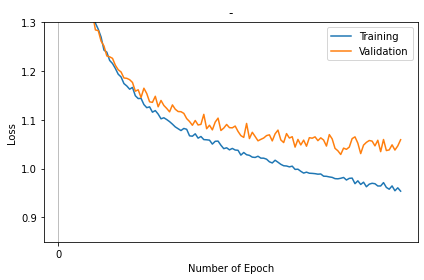

In [103]:
# >> 64-2-256-2-128-log-reg, Epoch: 120, LR: 0.0001, cnnDR: 0,  fnDR: 0.2, l2decay: 1e-09
Train_Loss=[5.619394302368164, 3.666234016418457, 2.590270757675171, 2.038069725036621, 1.7620339393615723, 1.6001406908035278, 1.4941595792770386, 1.4502618312835693, 1.4099153280258179, 1.3663263320922852, 1.342736840248108, 1.3257402181625366, 1.2984485626220703, 1.2860000133514404, 1.269742727279663, 1.2432284355163574, 1.238993763923645, 1.2219635248184204, 1.215623140335083, 1.205513834953308, 1.1937109231948853, 1.1881120204925537, 1.1745686531066895, 1.1696586608886719, 1.1629908084869385, 1.1666339635849, 1.1495091915130615, 1.1437915563583374, 1.1442410945892334, 1.1315020322799683, 1.1251294612884521, 1.1267175674438477, 1.115860939025879, 1.1191432476043701, 1.1119699478149414, 1.1022565364837646, 1.1043919324874878, 1.1007249355316162, 1.0964728593826294, 1.0913171768188477, 1.0856789350509644, 1.081893801689148, 1.0781850814819336, 1.082499384880066, 1.0807706117630005, 1.0673589706420898, 1.066552996635437, 1.0714751482009888, 1.0625786781311035, 1.0659834146499634, 1.059614658355713, 1.059212327003479, 1.0584672689437866, 1.0503965616226196, 1.0561349391937256, 1.0565389394760132, 1.0480540990829468, 1.0410585403442383, 1.0428447723388672, 1.0385841131210327, 1.041526198387146, 1.0382566452026367, 1.0377055406570435, 1.0278035402297974, 1.0331693887710571, 1.0285831689834595, 1.0272996425628662, 1.0236272811889648, 1.0230166912078857, 1.0254921913146973, 1.0215795040130615, 1.0215115547180176, 1.0194507837295532, 1.014080286026001, 1.0117138624191284, 1.0172761678695679, 1.0132019519805908, 1.0089010000228882, 1.0059722661972046, 1.0054905414581299, 1.0036861896514893, 1.0051273107528687, 0.9985096454620361, 0.9989092946052551, 0.9945963621139526, 0.9909297823905945, 0.992844820022583, 0.9906413555145264, 0.9903262257575989, 0.9897487163543701, 0.9886987805366516, 0.9891151785850525, 0.9845765829086304, 0.9843125939369202, 0.9830780029296875, 0.9821291565895081, 0.9795401692390442, 0.9791845083236694, 0.9802756309509277, 0.9819731712341309, 0.9767306447029114, 0.9801254272460938, 0.9806635975837708, 0.9692252278327942, 0.9750902056694031, 0.967606782913208, 0.9722434878349304, 0.9629318714141846, 0.9682348370552063, 0.9700229167938232, 0.9691148400306702, 0.9644930958747864, 0.9644769430160522, 0.9713868498802185, 0.9615397453308105, 0.9578710794448853, 0.964616060256958, 0.954691469669342, 0.9607186913490295, 0.9538747072219849]
Test_Loss=[4.49040412902832, 3.0328683853149414, 2.276716947555542, 1.8864856958389282, 1.6732147932052612, 1.545632243156433, 1.493338704109192, 1.4103084802627563, 1.4100821018218994, 1.3807084560394287, 1.3253371715545654, 1.31773042678833, 1.2846417427062988, 1.2831143140792847, 1.2615524530410767, 1.2516313791275024, 1.2311745882034302, 1.2294150590896606, 1.2262513637542725, 1.21204674243927, 1.2028851509094238, 1.1982465982437134, 1.1859898567199707, 1.1853058338165283, 1.182509183883667, 1.17681884765625, 1.1589148044586182, 1.1618003845214844, 1.1459169387817383, 1.1649831533432007, 1.1540758609771729, 1.1370625495910645, 1.1360329389572144, 1.1484805345535278, 1.126937985420227, 1.1398853063583374, 1.1296428442001343, 1.123549461364746, 1.1165659427642822, 1.130771279335022, 1.1218812465667725, 1.117201328277588, 1.1168514490127563, 1.1134052276611328, 1.1026760339736938, 1.0967316627502441, 1.0890049934387207, 1.0988292694091797, 1.0896176099777222, 1.0908911228179932, 1.1113836765289307, 1.0819226503372192, 1.0890929698944092, 1.0795938968658447, 1.0955935716629028, 1.1036688089370728, 1.0782982110977173, 1.0832650661468506, 1.0906579494476318, 1.084115743637085, 1.0837349891662598, 1.0874220132827759, 1.076382040977478, 1.0677598714828491, 1.064175009727478, 1.0927388668060303, 1.0617824792861938, 1.0746492147445679, 1.0659375190734863, 1.0571318864822388, 1.0601239204406738, 1.0628738403320312, 1.0678282976150513, 1.0694105625152588, 1.056960940361023, 1.0714905261993408, 1.079105019569397, 1.0589699745178223, 1.053519368171692, 1.071922779083252, 1.0628362894058228, 1.0655380487442017, 1.0442198514938354, 1.059990406036377, 1.0486329793930054, 1.0585274696350098, 1.0460368394851685, 1.0635288953781128, 1.0624558925628662, 1.0652813911437988, 1.0574671030044556, 1.0632290840148926, 1.0586919784545898, 1.046364188194275, 1.0698751211166382, 1.0610712766647339, 1.041689395904541, 1.0367093086242676, 1.0290931463241577, 1.0421291589736938, 1.0396336317062378, 1.044281005859375, 1.0616127252578735, 1.0652406215667725, 1.052294373512268, 1.0309149026870728, 1.0482823848724365, 1.0539608001708984, 1.057758092880249, 1.056559443473816, 1.0467543601989746, 1.0582760572433472, 1.0349006652832031, 1.059829592704773, 1.037151575088501, 1.0385098457336426, 1.0489205121994019, 1.0381370782852173, 1.0466573238372803, 1.0593701601028442]
lossGraph(Train_Loss, Test_Loss)

In [123]:
import torch
print(torch.__version__)
print(torch.version.cuda)


1.12.1
11.3


/tmp/ipykernel_49443/49808587.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_49443/49808587.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_49443/49808587.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_49443/49808587.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_49443/49808587.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_49443/49808587.py:18: UserWarn

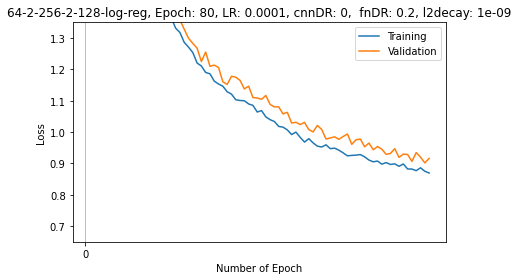

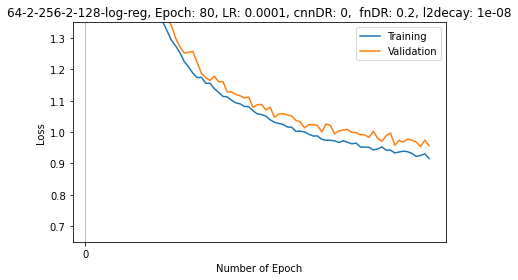

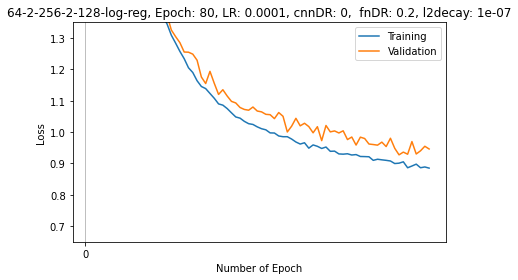

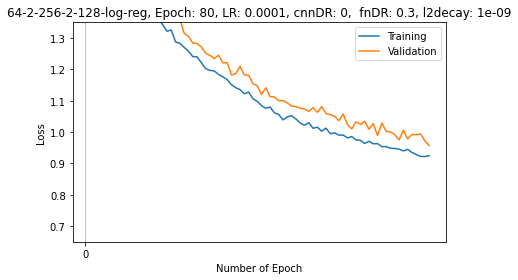

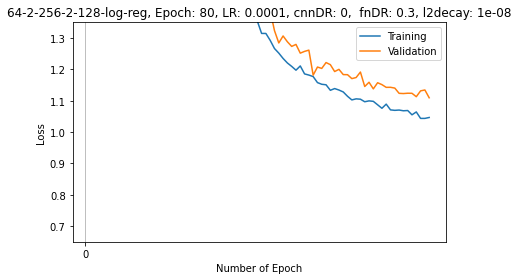

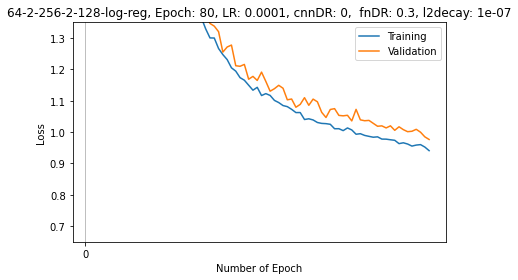

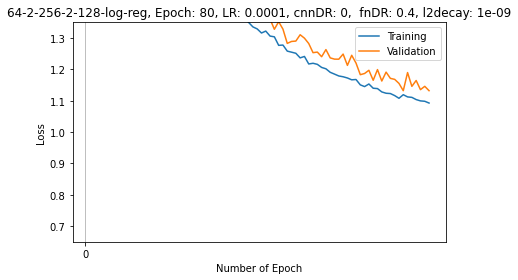

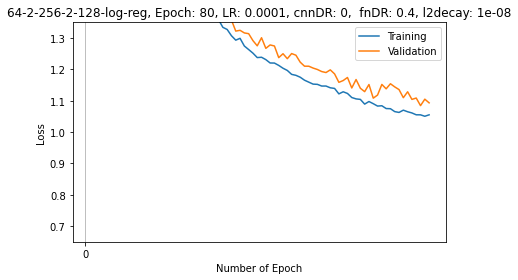

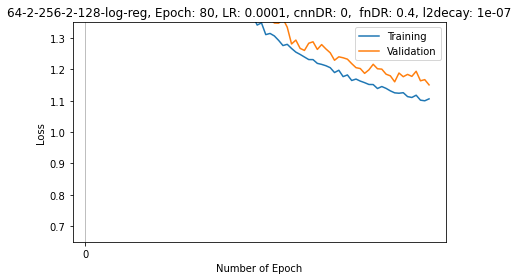

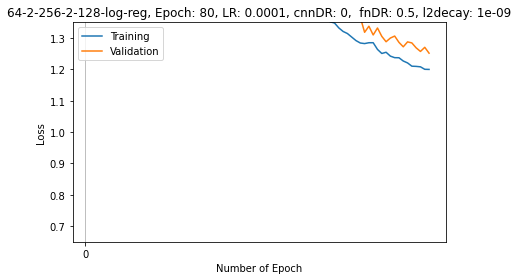

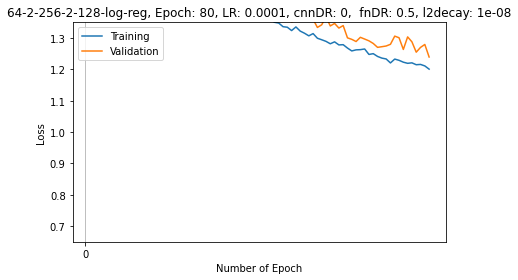

In [120]:
appendix = '64-2-256-2-128-log-reg, Epoch: 80, LR: 0.0001, cnnDR: 0,  fnDR: 0.2, l2decay: 1e-09'
Train_Loss=[5.876010417938232, 4.4222588539123535, 3.6164400577545166, 3.1140174865722656, 2.8080334663391113, 2.6188573837280273, 2.481287956237793, 2.359757900238037, 2.0956881046295166, 1.9554768800735474, 1.9253504276275635, 1.8804749250411987, 1.8283265829086304, 1.764502763748169, 1.676391839981079, 1.5749198198318481, 1.4926362037658691, 1.4474364519119263, 1.3890212774276733, 1.3643501996994019, 1.3318315744400024, 1.3178354501724243, 1.2864619493484497, 1.2712123394012451, 1.253995656967163, 1.2203634977340698, 1.2108479738235474, 1.1902488470077515, 1.186013102531433, 1.162514567375183, 1.1534944772720337, 1.1463139057159424, 1.1287405490875244, 1.1212304830551147, 1.1032685041427612, 1.1007959842681885, 1.100022792816162, 1.089808702468872, 1.0852605104446411, 1.064048409461975, 1.0686020851135254, 1.0486088991165161, 1.0396034717559814, 1.0337504148483276, 1.0180305242538452, 1.0158623456954956, 1.0070079565048218, 0.9920884370803833, 0.999976634979248, 0.9832260608673096, 0.9681604504585266, 0.9790855646133423, 0.965579628944397, 0.9551400542259216, 0.9524734020233154, 0.9594318270683289, 0.9471340179443359, 0.948807954788208, 0.9423741102218628, 0.9336795806884766, 0.9242296814918518, 0.9256924986839294, 0.9265108704566956, 0.9283020496368408, 0.920973539352417, 0.9107925891876221, 0.9051705598831177, 0.9076231122016907, 0.8976325392723083, 0.902752161026001, 0.8967850208282471, 0.8987089991569519, 0.8909511566162109, 0.8983148336410522, 0.88222336769104, 0.8821119070053101, 0.8769770860671997, 0.8860831260681152, 0.8751248717308044, 0.8694249987602234]
Test_Loss=[4.980190089882913, 3.9614475128130415, 3.3461085781195927, 2.910315665101313, 2.6924572918629925, 2.530097534101032, 2.4488916711534556, 2.2440236764394514, 1.9563394269252452, 1.9394442666670473, 1.9997336821510419, 1.8964430298788941, 1.8629432361506069, 1.7570281690697522, 1.6755833068181583, 1.5999003051656433, 1.5204732353514834, 1.4974122877945073, 1.4426545677554143, 1.4075052738780613, 1.3926767070863293, 1.357993601240651, 1.3284624192543204, 1.2997474648849914, 1.2831491791232867, 1.2680281737760895, 1.2251723590098367, 1.2554759131495197, 1.2100235076917039, 1.213759343753682, 1.2058243935370518, 1.160560452466369, 1.1522550104779934, 1.1782255271851458, 1.1751066654880837, 1.1650441920649899, 1.1377025756467811, 1.1465998166518556, 1.1102487652658675, 1.1088177150950398, 1.104638140590501, 1.1168350229133746, 1.0882831036606526, 1.0804104691268224, 1.0804831275079796, 1.0579854476038386, 1.0630062145228547, 1.0290171086265145, 1.031330064429991, 1.0240060311361632, 1.030919806803057, 1.007921201926754, 1.0005539953552918, 1.021204521575441, 1.0085529183310058, 0.9779829003679774, 0.9812239976019391, 0.9849233433509903, 0.9769550762700501, 0.9861522426619722, 0.9939107043719855, 0.9609853575036027, 0.9755584081356873, 0.9776711433356793, 0.9531092812397767, 0.9650229246737603, 0.9436717216980742, 0.9540703967144759, 0.9452295545190692, 0.9290492516154497, 0.9319172924570162, 0.9470697075343134, 0.9193361745147247, 0.9299416203972779, 0.9284578746586014, 0.9063980174341044, 0.9346440983900248, 0.9202086064112072, 0.9017954619766946, 0.9161142829963533]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 80, LR: 0.0001, cnnDR: 0,  fnDR: 0.2, l2decay: 1e-08'
Train_Loss=[4.888727188110352, 3.7059261798858643, 3.0921342372894287, 2.7560136318206787, 2.562194347381592, 2.454164743423462, 2.3838398456573486, 2.2192978858947754, 2.0235650539398193, 1.9029167890548706, 1.8127198219299316, 1.7113862037658691, 1.6190564632415771, 1.5296355485916138, 1.4785900115966797, 1.4529858827590942, 1.388770580291748, 1.3523030281066895, 1.3230060338974, 1.2934015989303589, 1.274963617324829, 1.2531383037567139, 1.2250494956970215, 1.2080739736557007, 1.1880977153778076, 1.173890233039856, 1.1747479438781738, 1.1556124687194824, 1.1560046672821045, 1.138506531715393, 1.1269798278808594, 1.113987922668457, 1.1122715473175049, 1.1017100811004639, 1.0931756496429443, 1.0900951623916626, 1.0818703174591064, 1.081201434135437, 1.0679658651351929, 1.0582151412963867, 1.0560985803604126, 1.0509978532791138, 1.0392019748687744, 1.0312042236328125, 1.0276427268981934, 1.0245187282562256, 1.0162354707717896, 1.0156526565551758, 1.002174735069275, 1.0030394792556763, 1.0003374814987183, 0.9930564761161804, 0.9875573515892029, 0.9876924753189087, 0.9770024418830872, 0.9741254448890686, 0.9737444519996643, 0.9720281362533569, 0.9667655825614929, 0.9723342061042786, 0.9675818085670471, 0.9626243114471436, 0.9648640751838684, 0.9525055289268494, 0.9521345496177673, 0.9515097737312317, 0.943131685256958, 0.9460725784301758, 0.9526328444480896, 0.9423506855964661, 0.9425621628761292, 0.9334800243377686, 0.9364961981773376, 0.9392406940460205, 0.9372871518135071, 0.9318141341209412, 0.9222657680511475, 0.9255836606025696, 0.9305647611618042, 0.9154708385467529]
Test_Loss=[4.165035739199981, 3.3420552854745837, 2.8937403765386636, 2.6642677232590875, 2.5108346477141024, 2.4201829549278124, 2.367715751743414, 2.1671912200767456, 1.977316281418979, 1.9819320456657807, 1.8243665855107427, 1.6981105412499256, 1.595736281654507, 1.537375043404418, 1.4765011022281176, 1.4529117534459528, 1.4211695681840395, 1.3820260551148453, 1.3615177273352244, 1.3407671377375545, 1.2995369652547957, 1.2722034866552456, 1.252140927182416, 1.2544728637253533, 1.2574491708496842, 1.2224237165014176, 1.1874362854749025, 1.1740982358035839, 1.1648134054666313, 1.1785225513011894, 1.1605493196811152, 1.1613719604999064, 1.1283927063472141, 1.128061254506767, 1.1201583802503015, 1.115818596448324, 1.1091398780579973, 1.1117816104765916, 1.078960610807036, 1.087280053462575, 1.0881428414575158, 1.0708943008816305, 1.0793621943490166, 1.047284423272796, 1.057586849528785, 1.0585300462310123, 1.0549643492558725, 1.0514100841009255, 1.0374361159904217, 1.0321578205287347, 1.01381311666194, 1.023445341750726, 1.0238040512088706, 1.0210216086394217, 1.0002984099000891, 1.0257481403777287, 1.021313527226875, 0.9941312321269987, 1.0034297989577472, 1.0067397744601858, 1.0085349194418505, 0.9991973708348914, 0.998390215390907, 0.991455740293695, 0.9913701351639584, 0.9830701999357104, 1.002431381001275, 0.9807826253599263, 0.9705531214379574, 0.9887233875767628, 0.9972112854273325, 0.9580481110715691, 0.9739083119231936, 0.968199887649474, 0.9775404817665146, 0.9744314933627507, 0.9681657875989784, 0.9534458823538688, 0.9743122875374643, 0.9565039862144794]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 80, LR: 0.0001, cnnDR: 0,  fnDR: 0.2, l2decay: 1e-07'
Train_Loss=[5.465356826782227, 4.045893669128418, 3.3009307384490967, 2.866823673248291, 2.6345317363739014, 2.49381685256958, 2.385878086090088, 2.2297351360321045, 2.072784662246704, 1.992785930633545, 1.9227821826934814, 1.8087619543075562, 1.6501151323318481, 1.5498888492584229, 1.4691892862319946, 1.4254742860794067, 1.391059160232544, 1.3699814081192017, 1.345402717590332, 1.309390902519226, 1.2839457988739014, 1.2574660778045654, 1.2341885566711426, 1.205246925354004, 1.190102458000183, 1.1638758182525635, 1.1455150842666626, 1.1387877464294434, 1.123250961303711, 1.1078875064849854, 1.0899556875228882, 1.0859788656234741, 1.0750946998596191, 1.0615129470825195, 1.0483394861221313, 1.0444726943969727, 1.034273386001587, 1.0268350839614868, 1.0244066715240479, 1.0167430639266968, 1.0107712745666504, 1.0072999000549316, 0.9974654316902161, 0.9970502853393555, 0.9876082539558411, 0.9852936863899231, 0.9853181838989258, 0.9778451323509216, 0.9684160947799683, 0.961905837059021, 0.965967059135437, 0.9487245082855225, 0.9590815901756287, 0.9546655416488647, 0.9477851986885071, 0.9523577094078064, 0.9386625289916992, 0.9393056631088257, 0.9303745627403259, 0.9295799136161804, 0.9308711290359497, 0.9268850088119507, 0.9282543659210205, 0.9222168326377869, 0.921851396560669, 0.921314001083374, 0.9098694920539856, 0.9134345054626465, 0.9115254878997803, 0.9099057912826538, 0.9078226685523987, 0.8996976613998413, 0.9008594751358032, 0.9052022695541382, 0.8862101435661316, 0.8917945623397827, 0.8977363705635071, 0.8862734436988831, 0.8887932300567627, 0.8850691318511963]
Test_Loss=[4.578515361045385, 3.5896611783005548, 3.046315316427165, 2.7286407245960715, 2.5820085537072366, 2.4257086035561675, 2.3258586905035354, 2.1728898265508274, 2.086840454871447, 2.012544127886263, 1.8985945098001815, 1.7734300866021986, 1.6686442988021584, 1.527070797109, 1.4883874158525594, 1.4547711990980592, 1.4347162428421714, 1.3965276340322743, 1.3740979078006585, 1.3258829026335592, 1.3046631059914182, 1.2853358733683171, 1.2554798609271067, 1.2549450831310986, 1.248719485559977, 1.229263998851595, 1.1757214452278142, 1.1549301506620477, 1.1937861949052182, 1.1556738744826625, 1.1201963801117416, 1.1351928481643994, 1.115239986804447, 1.0980247456292682, 1.0930181743398644, 1.0784559592125111, 1.0722655272187451, 1.069819353193869, 1.0799951437194835, 1.0672562649634698, 1.0645748484442974, 1.0567322264858445, 1.0555568533274566, 1.042978425461851, 1.0623765787057455, 1.0504334932034693, 1.0004352194163917, 1.018844786473569, 1.0439966273246657, 1.0199801262718071, 1.028188117173535, 1.0176100353344892, 0.9977446869373886, 1.0172444240632101, 0.9727506554837966, 1.021064679554076, 1.000726810428739, 1.0037365218166037, 0.997201695659701, 1.004097900944317, 0.9761804467483564, 0.9842763518067671, 0.9586319302413252, 0.9838477322327822, 0.9795430299068801, 0.9619271152964316, 0.9603354235639321, 0.9583608713324077, 0.9679978055924449, 0.9538809365092026, 0.980360837719486, 0.9482958605917091, 0.9274432750087188, 0.936179343042758, 0.9294168699514306, 0.9697537616597707, 0.9301681938725745, 0.9403504560280673, 0.9547904431908153, 0.9461288968327501]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 80, LR: 0.0001, cnnDR: 0,  fnDR: 0.3, l2decay: 1e-09'
Train_Loss=[5.918237686157227, 4.4630208015441895, 3.4644806385040283, 2.8158445358276367, 2.39172101020813, 2.1336145401000977, 1.9376890659332275, 1.8504301309585571, 1.7345337867736816, 1.6485005617141724, 1.567023754119873, 1.5066989660263062, 1.4560182094573975, 1.4380451440811157, 1.4027186632156372, 1.3805029392242432, 1.3613582849502563, 1.342329978942871, 1.321629524230957, 1.3256992101669312, 1.2875754833221436, 1.2835438251495361, 1.2702528238296509, 1.2580686807632446, 1.2409210205078125, 1.2401602268218994, 1.2212655544281006, 1.202516794204712, 1.1969200372695923, 1.1953603029251099, 1.1838628053665161, 1.176194667816162, 1.1674559116363525, 1.1510874032974243, 1.141601324081421, 1.1353940963745117, 1.122251272201538, 1.1275303363800049, 1.106436848640442, 1.0981247425079346, 1.0842047929763794, 1.0761927366256714, 1.0797239542007446, 1.0614069700241089, 1.0562124252319336, 1.0390204191207886, 1.048809289932251, 1.0521788597106934, 1.0420341491699219, 1.0289510488510132, 1.021966576576233, 1.0302150249481201, 1.0122135877609253, 1.0157124996185303, 1.0029023885726929, 1.0125776529312134, 0.995028018951416, 0.9974727034568787, 0.9905030727386475, 0.9904605746269226, 0.9814766049385071, 0.9856200814247131, 0.9749140739440918, 0.9737846851348877, 0.9637370109558105, 0.9704098105430603, 0.9626837372779846, 0.963255763053894, 0.9534369111061096, 0.9537633061408997, 0.9485056400299072, 0.9477269649505615, 0.945809006690979, 0.9400109648704529, 0.9448000192642212, 0.9350700974464417, 0.9284465909004211, 0.9222588539123535, 0.9222134947776794, 0.9244180917739868]
Test_Loss=[4.985799680185269, 3.860718530777364, 3.1098140141512607, 2.61919362310102, 2.2737923031334293, 2.1006184305768705, 1.95928595297118, 1.8215513111320458, 1.7584464083366953, 1.6670868806889505, 1.5715234720611149, 1.549272857520924, 1.5050521588339472, 1.467176698134365, 1.4029084855677372, 1.4191317145913502, 1.401634436167374, 1.3621417709908983, 1.3522147201598216, 1.3681928213041052, 1.3570249359744593, 1.3588095826926327, 1.315064249597497, 1.3049878582806005, 1.2839657359177623, 1.2825145328762373, 1.2713977791914948, 1.2516740978186727, 1.2448174430061472, 1.234627292737757, 1.2453826494485938, 1.2207651538919506, 1.2214429785675658, 1.18251023141608, 1.186055186358218, 1.2099109642855574, 1.1821197993992574, 1.1815889192394728, 1.1540620756050086, 1.1480977732929454, 1.1201283805091908, 1.1414302743038962, 1.113324598201347, 1.1121650318690917, 1.1000115033552187, 1.1007017474550802, 1.0933695326485768, 1.083116541836775, 1.0814610710438226, 1.0759616135200747, 1.0739868806336994, 1.0661866587709308, 1.0778489061484229, 1.0631886358152838, 1.0813731526849435, 1.0590701808185095, 1.0556970291595236, 1.050019569058284, 1.0365483811603, 1.0579158258020611, 1.0237538652497078, 1.010184646313502, 1.032961889349601, 1.024778429049803, 1.0346328180037827, 1.0089798269289418, 1.0271316816722584, 0.9894295955004421, 1.028833556227379, 1.002560441658127, 1.0003114933989623, 0.9925091807349484, 0.9749406379087864, 1.005853946936778, 0.9782901920840594, 0.9924004132722865, 0.9916992435232923, 0.994562686363671, 0.9718372556207006, 0.9570164386493027]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 80, LR: 0.0001, cnnDR: 0,  fnDR: 0.3, l2decay: 1e-08'
Train_Loss=[7.208978176116943, 5.3148064613342285, 4.184205532073975, 3.4853708744049072, 3.029749870300293, 2.7428719997406006, 2.5710089206695557, 2.462655544281006, 2.3994028568267822, 2.367015838623047, 2.3574132919311523, 2.327228307723999, 2.2889914512634277, 2.2754158973693848, 2.247459888458252, 2.209704637527466, 2.183346748352051, 2.1437153816223145, 2.0854523181915283, 2.010802745819092, 1.9211905002593994, 1.8262099027633667, 1.7897065877914429, 1.7314732074737549, 1.699263572692871, 1.6574305295944214, 1.6228032112121582, 1.5932332277297974, 1.572878122329712, 1.549796462059021, 1.5471011400222778, 1.514790415763855, 1.482944369316101, 1.4594764709472656, 1.4440038204193115, 1.4256314039230347, 1.41118586063385, 1.385340929031372, 1.3584556579589844, 1.3544195890426636, 1.314824104309082, 1.314709186553955, 1.2926322221755981, 1.2666195631027222, 1.252018690109253, 1.235008955001831, 1.2205784320831299, 1.2096408605575562, 1.1975096464157104, 1.211057186126709, 1.1856602430343628, 1.181968331336975, 1.177146077156067, 1.1579467058181763, 1.152585744857788, 1.1509835720062256, 1.1333447694778442, 1.138906478881836, 1.1342028379440308, 1.1280856132507324, 1.1142042875289917, 1.1026898622512817, 1.106064796447754, 1.1049689054489136, 1.0968403816223145, 1.0996036529541016, 1.0981383323669434, 1.08708918094635, 1.0759913921356201, 1.0892163515090942, 1.0708699226379395, 1.069413185119629, 1.0703465938568115, 1.06804358959198, 1.0688508749008179, 1.05515718460083, 1.0643283128738403, 1.0437109470367432, 1.0436989068984985, 1.0466011762619019]
Test_Loss=[6.051892633682349, 4.606375382184461, 3.7663524150606267, 3.1755326606866188, 2.8521957009210546, 2.675005807771322, 2.527302461213343, 2.47581319621987, 2.432804891293036, 2.4035246090632407, 2.3551672223515956, 2.3097330875876088, 2.3223814266525045, 2.2687494494410805, 2.2414578987310585, 2.2341393201976585, 2.177536972253635, 2.1653770661140066, 2.101022735147535, 1.9878093467474791, 1.9208453332905588, 1.8259821792009046, 1.8481694294791735, 1.7855044649326879, 1.7120962119202314, 1.735518427065649, 1.685143837719766, 1.6330005505509897, 1.6234035837044083, 1.5687555588183208, 1.6128130402214271, 1.5640413467315408, 1.550967558334176, 1.5595748190531307, 1.5067129899782963, 1.4733819760325195, 1.4746869148520256, 1.4800881285660927, 1.4435262083475138, 1.4272317665780043, 1.352312054430474, 1.4427451543655112, 1.3867363898151333, 1.3236784687522027, 1.28443590340769, 1.3067260480649239, 1.2881661193353102, 1.2734060761869106, 1.2797554175853265, 1.2518725902055095, 1.2575340964460875, 1.261498159144493, 1.1816964366415383, 1.207560632077814, 1.2031951625366277, 1.2219095753704323, 1.2151610806521047, 1.1931961921872412, 1.2001983116994392, 1.1834770362972955, 1.1831488062236135, 1.170641529857317, 1.1741399886530521, 1.1915591701780397, 1.145466776813301, 1.1590199749519807, 1.1379090523687532, 1.1574942186765256, 1.1514752036061646, 1.1427779952340231, 1.142929400375231, 1.1403998797601107, 1.1236870463688469, 1.1229707507989024, 1.124031988924657, 1.1237906238605624, 1.1129540775974134, 1.1315277536796509, 1.1343882347695333, 1.1095303299745296]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 80, LR: 0.0001, cnnDR: 0,  fnDR: 0.3, l2decay: 1e-07'
Train_Loss=[5.631253242492676, 4.13519287109375, 3.309257984161377, 2.8715293407440186, 2.633974552154541, 2.493941307067871, 2.411457061767578, 2.3744022846221924, 2.3356611728668213, 2.292001724243164, 2.259145975112915, 2.2055342197418213, 2.0826845169067383, 1.9454946517944336, 1.8836733102798462, 1.8482868671417236, 1.7940670251846313, 1.7125860452651978, 1.6749207973480225, 1.6421276330947876, 1.5787466764450073, 1.5578676462173462, 1.4868273735046387, 1.4619319438934326, 1.4182387590408325, 1.3976213932037354, 1.3646880388259888, 1.3294111490249634, 1.3004913330078125, 1.3001407384872437, 1.2666887044906616, 1.2472490072250366, 1.231380820274353, 1.2050724029541016, 1.1944984197616577, 1.1737066507339478, 1.1655629873275757, 1.1496446132659912, 1.1337031126022339, 1.1428446769714355, 1.1166584491729736, 1.1227749586105347, 1.116978645324707, 1.101176381111145, 1.0942226648330688, 1.0846977233886719, 1.0812548398971558, 1.0726605653762817, 1.0622919797897339, 1.0623739957809448, 1.0402013063430786, 1.0424796342849731, 1.0387898683547974, 1.030664086341858, 1.0277563333511353, 1.0269783735275269, 1.0248886346817017, 1.0107067823410034, 1.0108715295791626, 1.0047032833099365, 1.0132642984390259, 1.0068937540054321, 0.9931984543800354, 0.9948924779891968, 0.9894165396690369, 0.9864409565925598, 0.9836500883102417, 0.9848741888999939, 0.9777064919471741, 0.9774889349937439, 0.9755613803863525, 0.9738260507583618, 0.9632043242454529, 0.9658847451210022, 0.9619568586349487, 0.9553611278533936, 0.9585821032524109, 0.9600623846054077, 0.9523158669471741, 0.9407945275306702]
Test_Loss=[4.665687086989668, 3.6611088135763272, 3.016154405381923, 2.7411163261100313, 2.5543509578912666, 2.4499863384595195, 2.4253401945287156, 2.3754365738994254, 2.359289179212729, 2.322338133181032, 2.2783740796062397, 2.136747064411666, 2.0561918313426455, 2.0098906365487386, 1.90567820292153, 1.852130107858585, 1.7874739417988545, 1.7346163624368014, 1.6863179558339705, 1.649317899410222, 1.6269564804030752, 1.556468392792155, 1.5374829263819125, 1.5084069654334926, 1.4787624414988871, 1.4212607291775112, 1.3961386959911783, 1.3748925671427825, 1.3467325935658876, 1.338025812549502, 1.3203660404681927, 1.2552530817031133, 1.2714776407498394, 1.2776993246569568, 1.211737920116433, 1.2099914959813367, 1.2159225020627125, 1.168724180895154, 1.1777148167043527, 1.1648183645083796, 1.191338001449403, 1.1617277893982172, 1.1304634921941832, 1.1384782454885398, 1.1492758976264177, 1.1399462109925456, 1.1030201094643735, 1.1055572900822075, 1.0793489385068995, 1.0883610016932275, 1.1098106860285006, 1.0855028747575632, 1.1052553473469935, 1.0966985985281967, 1.0630937600310355, 1.0465773957998956, 1.0721751882698094, 1.0748057843468528, 1.0533036000406382, 1.0519055067879486, 1.0536684266747738, 1.0356546508081395, 1.0725408896157291, 1.0390671391533384, 1.0362855320695066, 1.0373124537534302, 1.0279665941768148, 1.0186908836145088, 1.0198841646300367, 1.0132883492559748, 1.020018556971888, 1.0056691246252312, 1.0169251501233352, 1.0078302735038172, 1.0013398015821875, 1.0026490578936114, 1.0089026670153005, 0.9996892176071756, 0.9849211618829036, 0.9764676548035301]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 80, LR: 0.0001, cnnDR: 0,  fnDR: 0.4, l2decay: 1e-09'
Train_Loss=[5.983493804931641, 4.512066841125488, 3.667387008666992, 3.117565631866455, 2.7651872634887695, 2.5440595149993896, 2.4004504680633545, 2.2999064922332764, 2.2112488746643066, 2.0848801136016846, 1.989830493927002, 1.9223477840423584, 1.8769276142120361, 1.8475635051727295, 1.8096367120742798, 1.763277530670166, 1.7177542448043823, 1.6788012981414795, 1.6483298540115356, 1.6368094682693481, 1.6057242155075073, 1.6001023054122925, 1.5659550428390503, 1.542253017425537, 1.5440477132797241, 1.5200786590576172, 1.4939956665039062, 1.4812146425247192, 1.4566413164138794, 1.4352827072143555, 1.428816318511963, 1.4118461608886719, 1.4031524658203125, 1.3964122533798218, 1.3800644874572754, 1.3808752298355103, 1.3666200637817383, 1.3500252962112427, 1.3357280492782593, 1.3292304277420044, 1.3162031173706055, 1.3222941160202026, 1.3063557147979736, 1.3040226697921753, 1.2768338918685913, 1.2776867151260376, 1.2584145069122314, 1.2549974918365479, 1.2514917850494385, 1.2368301153182983, 1.2413697242736816, 1.2173705101013184, 1.2195799350738525, 1.2162108421325684, 1.2063343524932861, 1.2019693851470947, 1.1907497644424438, 1.1849828958511353, 1.1790728569030762, 1.1765469312667847, 1.17266845703125, 1.1668592691421509, 1.167797327041626, 1.1507197618484497, 1.1452059745788574, 1.1535040140151978, 1.139946699142456, 1.138840675354004, 1.1282310485839844, 1.1239639520645142, 1.1230028867721558, 1.116494059562683, 1.1078611612319946, 1.119336724281311, 1.1123034954071045, 1.1108148097991943, 1.1037812232971191, 1.0995861291885376, 1.0983525514602661, 1.0927001237869263]
Test_Loss=[5.046759222310682, 4.020758974020636, 3.3994504819057916, 2.9427192729469507, 2.648807633659655, 2.501941622979838, 2.3504447248758, 2.261242965846535, 2.193117982056333, 2.0465022592017883, 1.9941958072576562, 1.946963543865134, 1.9475454803386911, 1.888614373939509, 1.8414282839212097, 1.772139960506518, 1.7381238288040062, 1.7269486909994962, 1.6942372828845889, 1.6875350885105531, 1.670922044046479, 1.6188283678476951, 1.6200138805899942, 1.585295027986974, 1.5524007046366841, 1.5574570127333978, 1.5203729719872647, 1.5468004803548179, 1.5194603066617267, 1.5340456272367138, 1.4867105004080208, 1.4460426702649904, 1.4571767301848435, 1.4619938420619967, 1.4052134494242419, 1.4171626047072339, 1.456159589482909, 1.3945338826595466, 1.4022780865575497, 1.3871586259100486, 1.393405603022511, 1.3559050720961714, 1.360486164512135, 1.3280394933301642, 1.3522116255724053, 1.328494067669208, 1.2830428252852075, 1.2892368478093519, 1.2903981645032199, 1.3106222189383983, 1.2996785061792149, 1.2825682165204135, 1.2533877412975174, 1.2553300871341855, 1.2405385164926994, 1.2633166965541898, 1.2367759873865531, 1.2327833274406639, 1.2326165010109282, 1.2489530115274434, 1.2128598981106067, 1.245072461780287, 1.2202729847750255, 1.1831510966831986, 1.1869899249744544, 1.1972206380894204, 1.1653071320730686, 1.1994142805096109, 1.1629628324739048, 1.1913738870588468, 1.1714125355466978, 1.1682693423090924, 1.1553555232641286, 1.13208478415814, 1.189961524528992, 1.1460015100036318, 1.1646488503647252, 1.1354322791159606, 1.1460249089966543, 1.1321240736656544]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 80, LR: 0.0001, cnnDR: 0,  fnDR: 0.4, l2decay: 1e-08'
Train_Loss=[5.107466220855713, 3.853388786315918, 3.153672695159912, 2.7623355388641357, 2.5188586711883545, 2.3836004734039307, 2.3059678077697754, 2.236196279525757, 2.1687982082366943, 2.0952095985412598, 1.9992374181747437, 1.9137707948684692, 1.845682144165039, 1.7801541090011597, 1.7439638376235962, 1.6987875699996948, 1.6683343648910522, 1.6405333280563354, 1.6091398000717163, 1.581964373588562, 1.5505766868591309, 1.5393157005310059, 1.5167943239212036, 1.5084260702133179, 1.4723620414733887, 1.4595204591751099, 1.4300477504730225, 1.4200137853622437, 1.383713960647583, 1.3679956197738647, 1.3584223985671997, 1.3342410326004028, 1.3274405002593994, 1.307447910308838, 1.29331374168396, 1.2991828918457031, 1.274658203125, 1.2633683681488037, 1.251885175704956, 1.2377955913543701, 1.238769292831421, 1.2312142848968506, 1.2205241918563843, 1.2202826738357544, 1.2128028869628906, 1.2037218809127808, 1.1966907978057861, 1.1842033863067627, 1.1811217069625854, 1.1750963926315308, 1.1656086444854736, 1.1593424081802368, 1.1530705690383911, 1.1523587703704834, 1.146931529045105, 1.1469769477844238, 1.1413589715957642, 1.1393513679504395, 1.1219631433486938, 1.1286280155181885, 1.1233187913894653, 1.1103447675704956, 1.1059486865997314, 1.104337215423584, 1.0892870426177979, 1.097586750984192, 1.0906308889389038, 1.0830425024032593, 1.0840660333633423, 1.0751445293426514, 1.074623942375183, 1.0653530359268188, 1.0627686977386475, 1.069990634918213, 1.064924716949463, 1.061112880706787, 1.0551954507827759, 1.0550671815872192, 1.050541639328003, 1.0551137924194336]
Test_Loss=[4.29126349057727, 3.4063980634323845, 2.8971985929094726, 2.6794439247092647, 2.4860897469261984, 2.3452803852990356, 2.2611096777392063, 2.2464204683166016, 2.1605664748405684, 2.116820096546676, 2.010498514390453, 1.963193387990381, 1.8857304380131432, 1.8231292293888133, 1.765370570487588, 1.7502059679781705, 1.7028447862131177, 1.7183089674445675, 1.679331175890835, 1.6141967153294479, 1.6210192001006447, 1.5888311445500163, 1.5597149512933681, 1.5407008198298942, 1.5332834909812447, 1.4920179586603335, 1.4693764852997477, 1.4561820509121968, 1.4116120354070414, 1.422015919962462, 1.4132033679117186, 1.422397756432029, 1.3763604566858414, 1.3573736046061173, 1.3222747911800057, 1.3247355418620563, 1.3164006814860878, 1.3140581697045115, 1.2918551613387301, 1.2752620366056828, 1.3010438580115065, 1.2672323480639238, 1.2781188607449085, 1.2747197880602559, 1.2375720949714457, 1.250045890892079, 1.234221401752978, 1.2505526507292182, 1.2453527849433514, 1.2231136737282509, 1.2102735099813222, 1.2102112894581836, 1.204288918305229, 1.199772242457372, 1.1931761182542442, 1.19002421904581, 1.1985364506235727, 1.1856512177380512, 1.158747060759317, 1.1645000919446427, 1.1742439898027481, 1.1407591018183751, 1.1677240407754312, 1.139860522687576, 1.1290673276806942, 1.1518059484622811, 1.108326492326199, 1.1181571279853955, 1.152083201143677, 1.1380775318400818, 1.1542482578758366, 1.144245312658658, 1.1356076689957284, 1.1097764052348518, 1.1286206671947092, 1.1043373387940965, 1.1086526673734085, 1.084482299874836, 1.105050229243932, 1.093291375608747]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 80, LR: 0.0001, cnnDR: 0,  fnDR: 0.4, l2decay: 1e-07'
Train_Loss=[5.747494220733643, 4.170973777770996, 3.3680050373077393, 2.9276952743530273, 2.693253993988037, 2.550711154937744, 2.4715068340301514, 2.3945727348327637, 2.305280923843384, 2.2259676456451416, 2.19793963432312, 2.1591224670410156, 2.0944955348968506, 2.0115673542022705, 1.9523955583572388, 1.8886100053787231, 1.8208515644073486, 1.7485339641571045, 1.7251002788543701, 1.6844550371170044, 1.6569677591323853, 1.6289145946502686, 1.6157381534576416, 1.5933171510696411, 1.5852431058883667, 1.5723916292190552, 1.559922218322754, 1.5505820512771606, 1.5458630323410034, 1.52866530418396, 1.5152966976165771, 1.5059643983840942, 1.4859503507614136, 1.4707653522491455, 1.4362469911575317, 1.4155761003494263, 1.39967679977417, 1.3889362812042236, 1.3707727193832397, 1.3415125608444214, 1.3484126329421997, 1.311051368713379, 1.314758539199829, 1.3067935705184937, 1.2925182580947876, 1.2761458158493042, 1.2800424098968506, 1.2668675184249878, 1.2551984786987305, 1.2478139400482178, 1.2395867109298706, 1.231426477432251, 1.231241226196289, 1.2193005084991455, 1.2160634994506836, 1.2116988897323608, 1.2054997682571411, 1.1899932622909546, 1.1973239183425903, 1.1770548820495605, 1.18235445022583, 1.1646571159362793, 1.169193148612976, 1.1627153158187866, 1.1577786207199097, 1.1520066261291504, 1.1516729593276978, 1.1390496492385864, 1.145377516746521, 1.139481544494629, 1.1314729452133179, 1.1252527236938477, 1.1239947080612183, 1.1256968975067139, 1.1132575273513794, 1.1105021238327026, 1.1176893711090088, 1.1019281148910522, 1.0998984575271606, 1.1060630083084106]
Test_Loss=[4.7273440638740185, 3.6744421685566087, 3.095592018568632, 2.7812051534336972, 2.65947728006414, 2.498710542621306, 2.43680589142236, 2.389479635477509, 2.2689670506248247, 2.2031199193987727, 2.223583208622891, 2.145796109794705, 2.091933280058958, 2.024443422355955, 1.9513016785439738, 1.8937681313482093, 1.8474375180152622, 1.7649840849153906, 1.735912732208835, 1.7705263830990878, 1.7132432463799157, 1.717852997020213, 1.6741451354833845, 1.6932806438269605, 1.634357038072484, 1.6353307385746625, 1.6311636855225515, 1.6141736960265973, 1.6142479706815367, 1.5905788537169425, 1.617837009040023, 1.5656950691663718, 1.5580399484386278, 1.5108743014864987, 1.4835600746335347, 1.4847089797623112, 1.4640092211086968, 1.4195004291993178, 1.4349303422390183, 1.3694397688516224, 1.3981967345287059, 1.3579998852550623, 1.3608793492549478, 1.3480499310835052, 1.3474983799271998, 1.361696330496197, 1.3345299944303468, 1.2811651165565858, 1.2935313822962335, 1.2670805378298744, 1.2605761576777088, 1.283533629515944, 1.2880884356852316, 1.2638402560541167, 1.2792321564035343, 1.2652817503972726, 1.2530702664645725, 1.2291859213678995, 1.2402005014979975, 1.237136718555505, 1.2326591862574228, 1.2184427931622872, 1.205580681225613, 1.2027389344114192, 1.1873999640888848, 1.1985782246068994, 1.2163796341751267, 1.2020512075273089, 1.2008987697923146, 1.1847764130226228, 1.1794266161217204, 1.160399657201765, 1.1884970869708769, 1.176758343392571, 1.1840820925569981, 1.17776968333422, 1.1941051222734955, 1.1636682199411663, 1.1673618751821573, 1.150659541299752]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 80, LR: 0.0001, cnnDR: 0,  fnDR: 0.5, l2decay: 1e-09'
Train_Loss=[4.9662861824035645, 3.7380893230438232, 3.1223740577697754, 2.8071866035461426, 2.630341053009033, 2.5426747798919678, 2.4891529083251953, 2.4544262886047363, 2.4174821376800537, 2.3895392417907715, 2.3527116775512695, 2.3468000888824463, 2.3428807258605957, 2.313424587249756, 2.3036062717437744, 2.2851672172546387, 2.271178722381592, 2.2483675479888916, 2.2292497158050537, 2.2145211696624756, 2.2020814418792725, 2.178440570831299, 2.1633143424987793, 2.138977527618408, 2.1194510459899902, 2.0997297763824463, 2.0869200229644775, 2.07008695602417, 2.0533995628356934, 2.0573790073394775, 2.0384597778320312, 2.0168893337249756, 2.0005552768707275, 1.9890905618667603, 1.95166015625, 1.9011837244033813, 1.859621286392212, 1.819178819656372, 1.8033710718154907, 1.7700775861740112, 1.7328975200653076, 1.716223955154419, 1.6719350814819336, 1.6376750469207764, 1.621962547302246, 1.5695675611495972, 1.5614346265792847, 1.5058494806289673, 1.4761269092559814, 1.463472604751587, 1.436025619506836, 1.4242806434631348, 1.4036239385604858, 1.3904756307601929, 1.3717669248580933, 1.3590980768203735, 1.3519490957260132, 1.348030924797058, 1.332420825958252, 1.3210762739181519, 1.3145034313201904, 1.30319082736969, 1.2919126749038696, 1.2842458486557007, 1.2824333906173706, 1.2851167917251587, 1.2851684093475342, 1.2638086080551147, 1.2508565187454224, 1.2547403573989868, 1.2423981428146362, 1.2374879121780396, 1.2372052669525146, 1.2267749309539795, 1.220698595046997, 1.2102811336517334, 1.2096644639968872, 1.2082644701004028, 1.2003647089004517, 1.2000032663345337]
Test_Loss=[4.187046494003854, 3.323962091917945, 2.9456730883155817, 2.743346203503529, 2.586418163777831, 2.4955333098064485, 2.4809411677168725, 2.449316912867847, 2.3805256104902957, 2.4192091195295164, 2.3389889449045884, 2.3751222732766544, 2.324219466179326, 2.3121067219215004, 2.33070058532645, 2.318334269980721, 2.2951285578682357, 2.2775314933384894, 2.2722796391870355, 2.243124849610951, 2.229550216915913, 2.208578780102396, 2.1685190322592955, 2.1754197826992296, 2.1426949119435132, 2.1053150043868443, 2.1096484636693376, 2.0928694911724994, 2.1089304453361555, 2.135005053321024, 2.0861731637223397, 2.0751970606879953, 2.0521379912063953, 2.0045064075593535, 1.977190464944897, 1.9388437751134726, 1.8688946243358846, 1.8205356326079227, 1.824357578797077, 1.835834108042802, 1.7999882750068066, 1.7377178677452119, 1.7344566905034362, 1.7256117814547076, 1.6460465467383154, 1.657111383258938, 1.6293821507806536, 1.5916328498412464, 1.5319005641211731, 1.507015653167406, 1.482079106763227, 1.45509425152077, 1.4666678682509358, 1.4558678400935225, 1.4543601631031973, 1.4229471286003916, 1.4397690067104354, 1.396018398835997, 1.3638051712154688, 1.4256139127884622, 1.39187334332357, 1.3618063232536228, 1.3865114465528208, 1.3664244063385023, 1.3184429873017716, 1.3378016168896936, 1.3099068462689323, 1.3322009238948602, 1.3055121358536041, 1.2883110772881057, 1.3001184126682754, 1.3064037506121704, 1.2862268154351177, 1.2721807932949254, 1.2878556556046028, 1.2844862855534087, 1.2687689681803138, 1.2573348299739626, 1.2705258068556884, 1.2518124890568367]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 80, LR: 0.0001, cnnDR: 0,  fnDR: 0.5, l2decay: 1e-08'
Train_Loss=[5.608265399932861, 4.199642658233643, 3.4202520847320557, 2.9284892082214355, 2.5955512523651123, 2.3733127117156982, 2.246535539627075, 2.1623291969299316, 2.090991497039795, 2.019442319869995, 1.9487813711166382, 1.8749873638153076, 1.8107751607894897, 1.7632161378860474, 1.726616382598877, 1.6951234340667725, 1.676764965057373, 1.6519721746444702, 1.6400045156478882, 1.6047321557998657, 1.5942116975784302, 1.5711338520050049, 1.5550310611724854, 1.5421421527862549, 1.5335991382598877, 1.5215975046157837, 1.5155143737792969, 1.5033458471298218, 1.5102571249008179, 1.4748764038085938, 1.4702973365783691, 1.460884928703308, 1.4527376890182495, 1.4406037330627441, 1.4320992231369019, 1.4186625480651855, 1.4246045351028442, 1.3910695314407349, 1.3894579410552979, 1.3859986066818237, 1.3657101392745972, 1.3661993741989136, 1.3601362705230713, 1.3503950834274292, 1.3478965759277344, 1.3363361358642578, 1.334611177444458, 1.3239221572875977, 1.335541844367981, 1.3222668170928955, 1.3154222965240479, 1.3071361780166626, 1.3142813444137573, 1.2994738817214966, 1.2946361303329468, 1.2895311117172241, 1.2818189859390259, 1.2879348993301392, 1.2781838178634644, 1.2788876295089722, 1.2681230306625366, 1.2589529752731323, 1.2623881101608276, 1.263065218925476, 1.265190601348877, 1.2477730512619019, 1.2502377033233643, 1.241411805152893, 1.2360819578170776, 1.2333391904830933, 1.220688819885254, 1.2329750061035156, 1.2290061712265015, 1.2230688333511353, 1.2194609642028809, 1.2209616899490356, 1.2149666547775269, 1.2159247398376465, 1.211150884628296, 1.2008718252182007]
Test_Loss=[4.675670986303991, 3.717581893506208, 3.139862662035966, 2.758762801339337, 2.4521080871639427, 2.3060071876812165, 2.268498484663819, 2.1591907314933545, 2.114836690840607, 1.9965253909385359, 1.9523962073024879, 1.9255525901758426, 1.8831721379141448, 1.8114560502707162, 1.7718817576135952, 1.7481694045283993, 1.7039754134674272, 1.7040073681762649, 1.665277477046254, 1.6678182984170202, 1.675838338552618, 1.6444021526973958, 1.6162431251828913, 1.5774102977428548, 1.6000939051626701, 1.570585636058087, 1.5515337406477054, 1.5902912541827092, 1.5509601759615583, 1.5406376052548885, 1.5400856898825168, 1.4938836155313164, 1.517623583856838, 1.5049350471745877, 1.506940053330876, 1.4816375741362617, 1.4450059998409843, 1.4660558790027933, 1.4449792724760941, 1.4619058453135332, 1.4411405772408115, 1.4465252100585568, 1.43669608842797, 1.425463389925428, 1.394876752718047, 1.3823758195246205, 1.3957978067307144, 1.351590990071888, 1.356552637876805, 1.385225859681726, 1.3727131837885387, 1.3602441958557214, 1.359927500567143, 1.3338594742453602, 1.342301952407602, 1.3679374691509834, 1.3386893002169942, 1.3467390720847023, 1.3319145283805207, 1.3398747831784632, 1.3006928918818514, 1.2959161980616924, 1.2889871458130118, 1.302382334254571, 1.2968436025762093, 1.2911601602048794, 1.2827502251520728, 1.2703797220241428, 1.27243841684477, 1.274683259793956, 1.2801137140345515, 1.3061919142663803, 1.301075019530859, 1.263693539948953, 1.3037753455464711, 1.2879611340677435, 1.2549737593901786, 1.2702447690233636, 1.2795881303649894, 1.2395877270712152]
lossGraph(Train_Loss, Test_Loss, appendix)
appendix = '64-2-256-2-128-log-reg, Epoch: 80, LR: 0.0001, cnnDR: 0,  fnDR: 0.5, l2decay: 1e-07'
Train_Loss=[6.088285446166992, 4.571933746337891, 3.726284980773926, 3.213538885116577, 2.88634991645813, 2.6742007732391357, 2.528919219970703, 2.4385316371917725, 2.3644566535949707, 2.3015692234039307, 2.2120261192321777, 2.150146484375, 2.0826961994171143, 2.0341684818267822, 2.0015006065368652, 1.9455205202102661, 1.891298770904541, 1.8560192584991455, 1.7996907234191895, 1.7703919410705566, 1.738931655883789, 1.7109010219573975, 1.6840840578079224, 1.6469805240631104, 1.6310935020446777, 1.613928198814392, 1.5934479236602783, 1.5733532905578613, 1.5458430051803589, 1.5380936861038208, 1.5221878290176392, 1.527280330657959, 1.5143052339553833, 1.5112305879592896, 1.4930500984191895, 1.4935182332992554, 1.4987713098526, 1.4652763605117798, 1.4615540504455566, 1.4549165964126587, 1.4515868425369263, 1.4421392679214478, 1.4348841905593872, 1.4341545104980469, 1.4401451349258423, 1.4220781326293945, 1.4286389350891113, 1.4107575416564941, 1.4104503393173218, 1.395125389099121, 1.4017552137374878, 1.381995439529419, 1.3891962766647339, 1.3774124383926392, 1.3786360025405884, 1.3682760000228882, 1.3621422052383423, 1.357444405555725, 1.3500703573226929, 1.3453220129013062, 1.345790147781372, 1.3342981338500977, 1.3267260789871216, 1.3328368663787842, 1.3237107992172241, 1.3210245370864868, 1.3157069683074951, 1.320716381072998, 1.3025678396224976, 1.3067712783813477, 1.3059422969818115, 1.2881834506988525, 1.2814133167266846, 1.293845534324646, 1.2844574451446533, 1.2778956890106201, 1.2722634077072144, 1.2773481607437134, 1.2602477073669434, 1.2563351392745972]
Test_Loss=[5.113299643263333, 4.035662196018221, 3.4224196477675064, 3.0301911831752575, 2.7705743511515157, 2.5843452214807416, 2.477609859411305, 2.452842617802778, 2.390777608790168, 2.295841077105053, 2.1607640177932583, 2.163527484163259, 2.0994426024404733, 2.0561149918603863, 1.9869292286228255, 1.9544114523364007, 1.9228298416829277, 1.9033508387692244, 1.832388510123117, 1.8301875030904393, 1.8091042901887462, 1.7052417295341844, 1.7071390225782606, 1.729795063699127, 1.6477558872565312, 1.6523827256938102, 1.636214457591037, 1.5845722975098127, 1.5821524083859018, 1.6145675382513176, 1.5863604096323503, 1.6076746622998779, 1.5731413303350346, 1.5828907502524174, 1.5970533353138812, 1.5352909284336305, 1.5833168359755225, 1.5530904658837767, 1.5209958565818595, 1.545311654452255, 1.5196430480985448, 1.5469101504859692, 1.488065742447479, 1.528299468567422, 1.472966796823279, 1.4541896718058183, 1.4568592132963551, 1.4939476648158287, 1.48061318981091, 1.4487221279818103, 1.4347780545791846, 1.4725144895698068, 1.424267148969997, 1.4263565434053627, 1.4313779712035475, 1.419154256936644, 1.416910103825111, 1.4096524836236661, 1.40965133753264, 1.3814914031201415, 1.3694732969715044, 1.413302278909866, 1.3949960447286203, 1.409517137565775, 1.4161818938278776, 1.3692824137621602, 1.3761915429261944, 1.360030089933251, 1.388445693774839, 1.348805642134993, 1.3578683718262539, 1.3874102655786258, 1.3635913289193764, 1.366110172541602, 1.345062244039328, 1.3367466353215676, 1.339992339250746, 1.3286906728320533, 1.3240531278511305, 1.326374367630078]

In [124]:
appendix = '64-2-256-2-128-log-reg, Epoch: 250, LR: 0.0001, cnnDR: 0,  fnDR: 0.2, l2decay: 1e-08'
Train_Loss=[5.619389057159424, 3.665861129760742, 2.590445041656494, 2.038693904876709, 1.7627631425857544, 1.6005456447601318, 1.4934860467910767, 1.4499766826629639, 1.4092599153518677, 1.3667833805084229, 1.34258234500885, 1.3254117965698242, 1.2966512441635132, 1.2846357822418213, 1.268728494644165, 1.2419548034667969, 1.2378275394439697, 1.2219904661178589, 1.215847134590149, 1.2052924633026123, 1.1912145614624023, 1.1875518560409546, 1.1736606359481812, 1.168867826461792, 1.1624668836593628, 1.1640104055404663, 1.14906644821167, 1.1442750692367554, 1.1432629823684692, 1.1321898698806763, 1.1255884170532227, 1.1247594356536865, 1.1145776510238647, 1.1186238527297974, 1.1122539043426514, 1.1019830703735352, 1.1023519039154053, 1.1013069152832031, 1.0970532894134521, 1.0896682739257812, 1.0862376689910889, 1.080844759941101, 1.0801643133163452, 1.0841084718704224, 1.0799555778503418, 1.0690711736679077, 1.0676708221435547, 1.0726131200790405, 1.0624232292175293, 1.0663982629776, 1.060835838317871, 1.0584771633148193, 1.0574349164962769, 1.0518308877944946, 1.056951880455017, 1.0586607456207275, 1.0508956909179688, 1.041598916053772, 1.0428425073623657, 1.0399224758148193, 1.039687991142273, 1.0395830869674683, 1.0381226539611816, 1.028557300567627, 1.0341464281082153, 1.0289115905761719, 1.028512716293335, 1.0218771696090698, 1.0227183103561401, 1.0264219045639038, 1.0202335119247437, 1.0191839933395386, 1.0195931196212769, 1.0139604806900024, 1.0112982988357544, 1.0169670581817627, 1.0121413469314575, 1.010611891746521, 1.0065431594848633, 1.005531668663025, 1.00257408618927, 1.0063384771347046, 0.9997245669364929, 0.9975148439407349, 0.9931166768074036, 0.9908667206764221, 0.991509199142456, 0.9889736175537109, 0.9889658689498901, 0.9887868165969849, 0.988918125629425, 0.9880493879318237, 0.9836085438728333, 0.9844909310340881, 0.9834755659103394, 0.9835271239280701, 0.9790967702865601, 0.9767813682556152, 0.9777069091796875, 0.9809869527816772, 0.9781534075737, 0.9800443053245544, 0.9792805910110474, 0.9689734578132629, 0.9744096994400024, 0.9657673239707947, 0.9718070030212402, 0.9637860655784607, 0.9682634472846985, 0.9690677523612976, 0.9691882729530334, 0.9618988037109375, 0.9647231101989746, 0.9685454368591309, 0.9600585103034973, 0.9591947793960571, 0.9636406302452087, 0.9541507363319397, 0.9593320488929749, 0.9532982707023621, 0.9532395601272583, 0.9519351124763489, 0.9512166380882263, 0.9576008319854736, 0.9507550597190857, 0.9563325643539429, 0.9515003561973572, 0.9502733945846558, 0.9525349140167236, 0.9426923394203186, 0.9517935514450073, 0.9489415884017944, 0.9494622945785522, 0.9445945620536804, 0.9451839327812195, 0.9386088848114014, 0.9413644671440125, 0.9406641721725464, 0.9398584961891174, 0.9464975595474243, 0.9391325116157532, 0.9356697797775269, 0.9406850934028625, 0.9349206686019897, 0.9365981221199036, 0.9316743612289429, 0.9352449178695679, 0.9351599812507629, 0.9350441694259644, 0.9237409234046936, 0.9299719929695129, 0.9368199706077576, 0.9322910308837891, 0.922220766544342, 0.9292606711387634, 0.9323657155036926, 0.931937575340271, 0.9309142231941223, 0.9243572950363159, 0.9256733655929565, 0.9218252301216125, 0.9209034442901611, 0.9214216470718384, 0.9212088584899902, 0.9242518544197083, 0.924454927444458, 0.9202282428741455, 0.9220902323722839, 0.9209593534469604, 0.9157983064651489, 0.9170200228691101, 0.9163293242454529, 0.9159110188484192, 0.9152843952178955, 0.9170335531234741, 0.9130925536155701, 0.917569100856781, 0.9137429594993591, 0.9184136986732483, 0.9126853942871094, 0.9120692014694214, 0.9091421365737915, 0.9054428935050964, 0.9139844179153442, 0.9075922966003418, 0.9108923077583313, 0.9102553129196167, 0.9070221781730652, 0.9113176465034485, 0.9149672985076904, 0.9066160917282104, 0.9084678292274475, 0.9027292132377625, 0.9077370166778564, 0.9044560790061951, 0.9049596190452576, 0.9071119427680969, 0.899300217628479, 0.8953876495361328, 0.8953554034233093, 0.8979231119155884, 0.9024533033370972, 0.9051140546798706, 0.8986620903015137, 0.9013300538063049, 0.8938724994659424, 0.8980363607406616, 0.8917061686515808, 0.8977589011192322, 0.8954809904098511, 0.8941875100135803, 0.8906310200691223, 0.8995180726051331, 0.899997889995575, 0.8964471220970154, 0.8945645689964294, 0.896199107170105, 0.8926834464073181, 0.8948116302490234, 0.8924203515052795, 0.8892706036567688, 0.8972218036651611, 0.8954143524169922, 0.8919479250907898, 0.8850505352020264, 0.8931278586387634, 0.8894311189651489, 0.8820673227310181, 0.8975023031234741, 0.8831952810287476, 0.885940670967102, 0.8890759348869324, 0.8856277465820312, 0.8848091959953308, 0.8869863748550415, 0.8823533654212952, 0.8867310285568237, 0.8880404233932495, 0.8816123008728027, 0.8862219452857971, 0.8825258016586304, 0.8814333081245422, 0.8779550790786743, 0.8779541850090027, 0.8843741416931152, 0.8868714570999146, 0.8838818073272705, 0.8777042031288147, 0.8818698525428772, 0.8849302530288696]
Test_Loss=[4.489625930786133, 3.0335350036621094, 2.278311014175415, 1.8863427639007568, 1.6733624935150146, 1.542644739151001, 1.4940170049667358, 1.4054213762283325, 1.4089312553405762, 1.3794151544570923, 1.3236585855484009, 1.3145256042480469, 1.2838668823242188, 1.281123161315918, 1.2587188482284546, 1.2489643096923828, 1.227558970451355, 1.229566216468811, 1.2222095727920532, 1.2095037698745728, 1.2072645425796509, 1.1959378719329834, 1.1908721923828125, 1.1870815753936768, 1.1804319620132446, 1.1787914037704468, 1.1622458696365356, 1.1626347303390503, 1.1450109481811523, 1.168898105621338, 1.1519562005996704, 1.1391726732254028, 1.1428821086883545, 1.1427675485610962, 1.127210021018982, 1.139212727546692, 1.1308685541152954, 1.1251437664031982, 1.1180564165115356, 1.132535696029663, 1.1242934465408325, 1.1154509782791138, 1.1157220602035522, 1.1087290048599243, 1.1058346033096313, 1.0974828004837036, 1.0891021490097046, 1.095463514328003, 1.090386986732483, 1.0921504497528076, 1.1120187044143677, 1.0858278274536133, 1.087249517440796, 1.0810707807540894, 1.0951685905456543, 1.099000096321106, 1.0758384466171265, 1.0820757150650024, 1.0875532627105713, 1.0870342254638672, 1.0858579874038696, 1.0884294509887695, 1.0712358951568604, 1.0758668184280396, 1.0660152435302734, 1.09557044506073, 1.0653891563415527, 1.0803765058517456, 1.062522530555725, 1.0604617595672607, 1.0560903549194336, 1.0624260902404785, 1.0705138444900513, 1.0661588907241821, 1.0586777925491333, 1.0675798654556274, 1.0723522901535034, 1.0526434183120728, 1.0569920539855957, 1.062550663948059, 1.0600450038909912, 1.06551194190979, 1.0487092733383179, 1.0614266395568848, 1.0456771850585938, 1.0524038076400757, 1.0419842004776, 1.0518051385879517, 1.058112621307373, 1.0668517351150513, 1.0490407943725586, 1.0617055892944336, 1.055897831916809, 1.0383535623550415, 1.0649808645248413, 1.0531266927719116, 1.0495330095291138, 1.0347448587417603, 1.0272557735443115, 1.0404596328735352, 1.0306271314620972, 1.0335063934326172, 1.0484484434127808, 1.0536011457443237, 1.0423824787139893, 1.0295941829681396, 1.0525375604629517, 1.0401408672332764, 1.0608123540878296, 1.0518128871917725, 1.048229694366455, 1.038179874420166, 1.0317455530166626, 1.0506534576416016, 1.032839059829712, 1.0341259241104126, 1.042683720588684, 1.0465160608291626, 1.039857268333435, 1.0587440729141235, 1.044779896736145, 1.0238088369369507, 1.0451058149337769, 1.0292117595672607, 1.0338393449783325, 1.0377336740493774, 1.045756459236145, 1.0267269611358643, 1.028181552886963, 1.0365853309631348, 1.040852427482605, 1.04130220413208, 1.0338510274887085, 1.0376625061035156, 1.044270634651184, 1.0421591997146606, 1.0280702114105225, 1.018302083015442, 1.0219082832336426, 1.0352933406829834, 1.040321946144104, 1.0244017839431763, 1.0291728973388672, 1.0495381355285645, 1.042974829673767, 1.039651870727539, 1.0378657579421997, 1.0417248010635376, 1.0406583547592163, 1.0289279222488403, 1.0462762117385864, 1.0273447036743164, 1.0433415174484253, 1.0409424304962158, 1.0333877801895142, 1.0346227884292603, 1.039838433265686, 1.0443456172943115, 1.0210472345352173, 1.043858528137207, 1.0293183326721191, 1.0151472091674805, 1.04190194606781, 1.016488790512085, 1.020508885383606, 1.04824697971344, 1.016754150390625, 1.0471845865249634, 1.0345730781555176, 1.007459044456482, 1.026044487953186, 1.0062605142593384, 1.0205004215240479, 1.0510307550430298, 1.0343643426895142, 1.0288879871368408, 1.0273030996322632, 1.0254238843917847, 1.0091511011123657, 1.0282701253890991, 1.0339387655258179, 1.0260835886001587, 1.0219712257385254, 1.0406585931777954, 1.04241144657135, 1.0484789609909058, 1.0405220985412598, 1.026767373085022, 1.034698486328125, 1.0283713340759277, 1.0315839052200317, 1.0406067371368408, 1.0266867876052856, 1.0334863662719727, 1.0364066362380981, 1.029131531715393, 1.0281692743301392, 1.0198842287063599, 1.0328837633132935, 1.0418115854263306, 1.0357533693313599, 1.027509331703186, 1.026788353919983, 1.025545358657837, 1.0251375436782837, 1.0137544870376587, 0.997585117816925, 1.0171048641204834, 1.0407297611236572, 1.0375701189041138, 1.0229620933532715, 1.0276336669921875, 1.0105643272399902, 1.0371702909469604, 1.0277267694473267, 1.0335123538970947, 1.0165622234344482, 1.0243231058120728, 1.0151824951171875, 1.0232429504394531, 1.0114845037460327, 1.0120536088943481, 1.0207148790359497, 1.0245565176010132, 1.033022403717041, 1.0392147302627563, 1.0372332334518433, 1.0251240730285645, 1.0321502685546875, 1.0197901725769043, 1.038508653640747, 1.035573959350586, 1.0187323093414307, 1.0278536081314087, 1.0261071920394897, 1.0187870264053345, 1.0372581481933594, 1.037060022354126, 1.0186176300048828, 1.0134942531585693, 1.0256593227386475, 1.033342719078064, 1.0418516397476196, 1.026199221611023, 1.0225915908813477, 1.0124189853668213, 1.024636149406433, 1.023613691329956, 1.0313241481781006, 1.0342962741851807]
appendix = '64-2-256-2-128-log-reg, Epoch: 250, LR: 0.0001, cnnDR: 0,  fnDR: 0.2, l2decay: 1e-07'
print(min(Test_Loss))
Train_Loss=[5.029962539672852, 3.4475090503692627, 2.592625617980957, 2.104557752609253, 1.819760799407959, 1.653876781463623, 1.5389643907546997, 1.4685009717941284, 1.4102452993392944, 1.3800355195999146, 1.354798674583435, 1.3143900632858276, 1.3063523769378662, 1.282435417175293, 1.260636568069458, 1.2555797100067139, 1.2438472509384155, 1.2286094427108765, 1.2169831991195679, 1.2096216678619385, 1.1933560371398926, 1.1903849840164185, 1.1816178560256958, 1.1768211126327515, 1.1757193803787231, 1.158461570739746, 1.1514188051223755, 1.1459100246429443, 1.143512487411499, 1.1435372829437256, 1.1339386701583862, 1.1265395879745483, 1.12839674949646, 1.1199901103973389, 1.1131852865219116, 1.1127309799194336, 1.1122767925262451, 1.1052124500274658, 1.1011589765548706, 1.0931365489959717, 1.0991588830947876, 1.0863275527954102, 1.0851285457611084, 1.0840259790420532, 1.0847798585891724, 1.078490972518921, 1.0728912353515625, 1.0740083456039429, 1.0660773515701294, 1.0710551738739014, 1.0642690658569336, 1.0592851638793945, 1.0557738542556763, 1.0601110458374023, 1.0561866760253906, 1.054869294166565, 1.0484296083450317, 1.0470765829086304, 1.0389084815979004, 1.0406968593597412, 1.041452169418335, 1.037214756011963, 1.0401512384414673, 1.0332003831863403, 1.034250020980835, 1.0283377170562744, 1.0326118469238281, 1.0249226093292236, 1.016640067100525, 1.0222604274749756, 1.0217564105987549, 1.0192844867706299, 1.0162678956985474, 1.0134872198104858, 1.012047290802002, 1.014858603477478, 1.003819227218628, 1.0076392889022827, 1.0052886009216309, 1.007529616355896, 1.0098313093185425, 1.0005525350570679, 0.9972348809242249, 0.9982848763465881, 0.999284029006958, 0.999109148979187, 0.9940559267997742, 0.9944742918014526, 0.9860249757766724, 0.989497721195221, 0.9917510151863098, 0.9938206076622009, 0.9860807061195374, 0.983697772026062, 0.9827216267585754, 0.9855588674545288, 0.9813276529312134, 0.9832715392112732, 0.9742811322212219, 0.9785504937171936, 0.9761981964111328, 0.9754589796066284, 0.9714163541793823, 0.9702938795089722, 0.9763132333755493, 0.9712044596672058, 0.9689247608184814, 0.962107241153717, 0.9663975238800049, 0.9673857688903809, 0.962485671043396, 0.965946614742279, 0.972944974899292, 0.9643470644950867, 0.9595186114311218, 0.9643189311027527, 0.9574055075645447, 0.9550032615661621, 0.9566187858581543, 0.9577574729919434, 0.9526933431625366, 0.9554782509803772, 0.9512977600097656, 0.9438580870628357, 0.9556388854980469, 0.9459847807884216, 0.9486170411109924, 0.9502005577087402, 0.9433344602584839, 0.9387769103050232, 0.9414076805114746, 0.9496392011642456, 0.9482649564743042, 0.9438685178756714, 0.9417805075645447, 0.9369503855705261, 0.9439827799797058, 0.9431409239768982, 0.9414515495300293, 0.9419951438903809, 0.9368879199028015, 0.936543345451355, 0.9357265830039978, 0.9347310662269592, 0.9447859525680542, 0.9336804747581482, 0.9333949089050293, 0.9334179759025574, 0.9308884143829346, 0.9261898398399353, 0.9311280846595764, 0.9268136620521545, 0.9284909963607788, 0.9282791018486023, 0.9259388446807861, 0.9291777610778809, 0.9294702410697937, 0.9235557913780212, 0.923428475856781, 0.922583818435669, 0.9201356172561646, 0.932855486869812, 0.9215985536575317, 0.9157842397689819, 0.9224957823753357, 0.9191049337387085, 0.9166954755783081, 0.9160701632499695, 0.9186963438987732, 0.9142143130302429, 0.9168828725814819, 0.9112196564674377, 0.9074470400810242, 0.9174609780311584, 0.9129781126976013, 0.9160212278366089, 0.911202073097229, 0.9118173718452454, 0.9091067910194397, 0.9051035642623901, 0.9116681814193726, 0.9100241661071777, 0.9008696675300598, 0.9044106006622314, 0.912760317325592, 0.9112455248832703, 0.9073207378387451, 0.9048779010772705, 0.9007618427276611, 0.9088843464851379, 0.9030705690383911, 0.9061628580093384, 0.9008480906486511, 0.905616044998169, 0.9086887836456299, 0.902461588382721, 0.9015945792198181, 0.8986338376998901, 0.9018805623054504, 0.8960016965866089, 0.8978987336158752, 0.8953480124473572, 0.8969092965126038, 0.8961578011512756, 0.9031932353973389, 0.8975285887718201, 0.8961306214332581, 0.8955525755882263, 0.8929135203361511, 0.8922426104545593, 0.9023401141166687, 0.8968213796615601, 0.893857479095459, 0.891672670841217, 0.8948579430580139, 0.8941007256507874, 0.8909683227539062, 0.887689471244812, 0.8921904563903809, 0.8836169242858887, 0.8913094401359558, 0.8907502889633179, 0.8872489929199219, 0.8829163908958435, 0.8824394941329956, 0.8818534016609192, 0.89183509349823, 0.8882235288619995, 0.885965883731842, 0.8865872621536255, 0.8848319053649902, 0.8830393552780151, 0.8828149437904358, 0.8810256123542786, 0.8855728507041931, 0.8829013705253601, 0.8827125430107117, 0.8824382424354553, 0.8765878081321716, 0.8768264651298523, 0.8860758543014526, 0.8766281008720398, 0.8766335248947144, 0.876867413520813, 0.8801732659339905, 0.8762869834899902, 0.874234139919281, 0.8770753741264343, 0.8811501264572144, 0.876240611076355]
Test_Loss=[4.086164474487305, 2.9077718257904053, 2.2830896377563477, 1.9665883779525757, 1.7019325494766235, 1.5723347663879395, 1.4842758178710938, 1.4238027334213257, 1.384918451309204, 1.3563718795776367, 1.3107802867889404, 1.3126764297485352, 1.292728066444397, 1.2884809970855713, 1.2737252712249756, 1.246287226676941, 1.237752914428711, 1.2175849676132202, 1.2099993228912354, 1.208315134048462, 1.1951195001602173, 1.1912107467651367, 1.1835161447525024, 1.1761932373046875, 1.1718724966049194, 1.1722691059112549, 1.1696618795394897, 1.1489349603652954, 1.1493103504180908, 1.156441330909729, 1.1519688367843628, 1.125069499015808, 1.1446768045425415, 1.1497050523757935, 1.1527537107467651, 1.1283836364746094, 1.133811593055725, 1.1290456056594849, 1.1241334676742554, 1.1200724840164185, 1.1199978590011597, 1.119354248046875, 1.1056158542633057, 1.1246591806411743, 1.098695158958435, 1.1029380559921265, 1.0950273275375366, 1.0781822204589844, 1.0909323692321777, 1.0802900791168213, 1.0994815826416016, 1.0995988845825195, 1.0891083478927612, 1.07999849319458, 1.093189001083374, 1.078959584236145, 1.0823030471801758, 1.0713331699371338, 1.0733774900436401, 1.0863169431686401, 1.0752851963043213, 1.0653215646743774, 1.0564032793045044, 1.0663552284240723, 1.0653822422027588, 1.073752522468567, 1.0725940465927124, 1.0584156513214111, 1.072556495666504, 1.0718214511871338, 1.0707260370254517, 1.0670140981674194, 1.0658133029937744, 1.060245156288147, 1.054250717163086, 1.0515931844711304, 1.0492994785308838, 1.0669224262237549, 1.0477640628814697, 1.0561975240707397, 1.0620249509811401, 1.055519461631775, 1.0644683837890625, 1.0595475435256958, 1.055031418800354, 1.0593465566635132, 1.0528430938720703, 1.0451263189315796, 1.0569249391555786, 1.0483144521713257, 1.043912649154663, 1.0453094244003296, 1.03537118434906, 1.0515056848526, 1.039941430091858, 1.0490972995758057, 1.046002984046936, 1.0547757148742676, 1.0445656776428223, 1.0431180000305176, 1.0589176416397095, 1.0309935808181763, 1.0347988605499268, 1.0584636926651, 1.0383843183517456, 1.0320903062820435, 1.031349778175354, 1.0334535837173462, 1.0547186136245728, 1.0406333208084106, 1.0488280057907104, 1.0242204666137695, 1.047422170639038, 1.0460963249206543, 1.0408846139907837, 1.0313061475753784, 1.0381641387939453, 1.0434613227844238, 1.041231632232666, 1.0532034635543823, 1.0305840969085693, 1.0483338832855225, 1.0355669260025024, 1.0294924974441528, 1.0232479572296143, 1.0405917167663574, 1.0556503534317017, 1.0300545692443848, 1.0395127534866333, 1.0274194478988647, 1.0180069208145142, 1.024078369140625, 1.036185622215271, 1.0280200242996216, 1.0362037420272827, 1.041015386581421, 1.048482894897461, 1.044201135635376, 1.0241578817367554, 1.051629662513733, 1.031378149986267, 1.0324087142944336, 1.036390781402588, 1.033768892288208, 1.0320295095443726, 1.0268007516860962, 1.039276361465454, 1.0301473140716553, 1.0246387720108032, 1.031363844871521, 1.0332598686218262, 1.03592848777771, 1.0332934856414795, 1.0425807237625122, 1.0179002285003662, 1.0313396453857422, 1.0403872728347778, 1.0270050764083862, 1.0365240573883057, 1.0298691987991333, 1.0218228101730347, 1.0297361612319946, 1.0280488729476929, 1.0137261152267456, 1.0310693979263306, 1.0294008255004883, 1.03459894657135, 1.0363224744796753, 1.039126992225647, 1.0366976261138916, 1.0405426025390625, 1.0372662544250488, 1.0312546491622925, 1.0380032062530518, 1.0356858968734741, 1.0488439798355103, 1.0160784721374512, 1.036163330078125, 1.029559850692749, 1.0418089628219604, 1.0292584896087646, 1.0356190204620361, 1.0307681560516357, 1.030811071395874, 1.0375783443450928, 1.0202300548553467, 1.0536028146743774, 1.0420184135437012, 1.0235832929611206, 1.0359910726547241, 1.02973473072052, 1.0289875268936157, 1.0263696908950806, 1.0275402069091797, 1.0172590017318726, 1.0319381952285767, 1.023222804069519, 1.0275214910507202, 1.0350192785263062, 1.0358680486679077, 1.0294666290283203, 1.026267647743225, 1.0060803890228271, 1.0283910036087036, 1.0241565704345703, 1.0286122560501099, 1.0173698663711548, 1.0239977836608887, 1.0303754806518555, 1.0418071746826172, 1.0243678092956543, 1.042472004890442, 1.053483009338379, 1.0268834829330444, 1.0332199335098267, 1.0242468118667603, 1.0490365028381348, 1.026143193244934, 1.032777190208435, 1.040004014968872, 1.0226141214370728, 1.0422343015670776, 1.0245232582092285, 1.0222676992416382, 1.0182116031646729, 1.0298938751220703, 1.0292344093322754, 1.0355695486068726, 1.0254546403884888, 1.0407060384750366, 1.030691146850586, 1.0347145795822144, 1.01827073097229, 1.0072412490844727, 1.0249007940292358, 1.0078606605529785, 1.0210219621658325, 1.0254018306732178, 1.035523533821106, 1.0230934619903564, 1.012683629989624, 1.0235297679901123, 1.0382295846939087, 1.0344449281692505, 1.012115240097046, 1.0211998224258423, 1.0337637662887573, 1.0409300327301025, 1.040205478668213, 1.0260366201400757]
appendix = '64-2-256-2-128-log-reg, Epoch: 250, LR: 0.0001, cnnDR: 0,  fnDR: 0.3, l2decay: 1e-07'
print(min(Test_Loss))
Train_Loss=[6.131680011749268, 4.154688835144043, 3.0198497772216797, 2.3839516639709473, 2.004210948944092, 1.7685099840164185, 1.6236096620559692, 1.5349370241165161, 1.4733132123947144, 1.4234652519226074, 1.3937751054763794, 1.3580663204193115, 1.3362195491790771, 1.3161197900772095, 1.3065367937088013, 1.2875611782073975, 1.2765065431594849, 1.2656885385513306, 1.2558292150497437, 1.2471299171447754, 1.2375199794769287, 1.2297608852386475, 1.2146905660629272, 1.209953784942627, 1.2028920650482178, 1.1937965154647827, 1.1945184469223022, 1.1948509216308594, 1.1815528869628906, 1.183668851852417, 1.170761227607727, 1.1627520322799683, 1.1617707014083862, 1.1642017364501953, 1.1565303802490234, 1.1523313522338867, 1.1499947309494019, 1.1512287855148315, 1.1400684118270874, 1.1384127140045166, 1.1363202333450317, 1.134121298789978, 1.1282380819320679, 1.1200531721115112, 1.1210929155349731, 1.1174753904342651, 1.11887526512146, 1.111896276473999, 1.11167573928833, 1.1071932315826416, 1.1097978353500366, 1.1049306392669678, 1.0929272174835205, 1.0923359394073486, 1.0950202941894531, 1.0932610034942627, 1.0909833908081055, 1.0912513732910156, 1.0876414775848389, 1.0798213481903076, 1.083709716796875, 1.0884727239608765, 1.0830659866333008, 1.0718536376953125, 1.0769282579421997, 1.0719671249389648, 1.072906732559204, 1.0699396133422852, 1.0642974376678467, 1.0588006973266602, 1.0614135265350342, 1.060472846031189, 1.0593944787979126, 1.056577205657959, 1.0602123737335205, 1.0553686618804932, 1.0635671615600586, 1.0538313388824463, 1.0539309978485107, 1.0515388250350952, 1.0473618507385254, 1.048140525817871, 1.0410311222076416, 1.0426604747772217, 1.045302391052246, 1.036453127861023, 1.0375926494598389, 1.0368047952651978, 1.0398969650268555, 1.031530737876892, 1.0331497192382812, 1.03350031375885, 1.0281449556350708, 1.0273460149765015, 1.034346103668213, 1.0302910804748535, 1.0283783674240112, 1.0327552556991577, 1.027835488319397, 1.0167649984359741, 1.0201694965362549, 1.0229572057724, 1.0194218158721924, 1.0171350240707397, 1.0056999921798706, 1.0113065242767334, 1.018755316734314, 1.0229618549346924, 1.0133343935012817, 1.0096886157989502, 1.0137346982955933, 1.0111455917358398, 1.0090872049331665, 1.0085171461105347, 1.0074949264526367, 1.0095880031585693, 1.006413459777832, 1.0053218603134155, 1.0008498430252075, 1.003436803817749, 1.0069953203201294, 1.003619909286499, 0.998620867729187, 0.9962583780288696, 0.9995751976966858, 0.9929322600364685, 0.9984277486801147, 0.995527982711792, 0.987701416015625, 0.9902399778366089, 0.9891391396522522, 0.9942097067832947, 0.9890355467796326, 0.9896448850631714, 0.9886578917503357, 0.9909729361534119, 0.9947046041488647, 0.9898119568824768, 0.987949788570404, 0.9872370362281799, 0.983077883720398, 0.9882508516311646, 0.9804543256759644, 0.9883651733398438, 0.97931307554245, 0.9809238910675049, 0.9812048673629761, 0.984645664691925, 0.977676510810852, 0.9801324605941772, 0.9754895567893982, 0.9765771627426147, 0.9754849672317505, 0.9791091084480286, 0.9790387749671936, 0.9696590900421143, 0.9718855023384094, 0.9707996249198914, 0.9747223258018494, 0.971710205078125, 0.9777698516845703, 0.9711614847183228, 0.9702335000038147, 0.9776361584663391, 0.9738094210624695, 0.974291980266571, 0.9700305461883545, 0.9662242531776428, 0.9750775694847107, 0.9691722393035889, 0.9680002927780151, 0.9675552248954773, 0.96563720703125, 0.9655159711837769, 0.9642555117607117, 0.9646828174591064, 0.9640222191810608, 0.9583479166030884, 0.9633679986000061, 0.9584130644798279, 0.9589167237281799, 0.9616299867630005, 0.9587261080741882, 0.9624218344688416, 0.9581090211868286, 0.9639700055122375, 0.9630925059318542, 0.9593128561973572, 0.9554604291915894, 0.9602265954017639, 0.9507136940956116, 0.9532967805862427, 0.9539684653282166, 0.9546051025390625, 0.9594507813453674, 0.9556350708007812, 0.950163722038269, 0.9472826719284058, 0.9510336518287659, 0.9557709097862244, 0.9489009380340576, 0.9493972659111023, 0.9545908570289612, 0.9526464343070984, 0.9463548064231873, 0.9479638934135437, 0.9445033669471741, 0.9449898600578308, 0.9414294362068176, 0.9458142518997192, 0.9429840445518494, 0.9428077340126038, 0.9460378289222717, 0.9434080719947815, 0.9435662031173706, 0.9375055432319641, 0.9404933452606201, 0.9425837993621826, 0.9457711577415466, 0.9403334259986877, 0.9374286532402039, 0.9352272748947144, 0.9415134787559509, 0.9412896037101746, 0.9377561807632446, 0.9410156607627869, 0.9361193776130676, 0.9339652061462402, 0.940762996673584, 0.9378368854522705, 0.9337445497512817, 0.9365354776382446, 0.9366282224655151, 0.9344250559806824, 0.9353787302970886, 0.9272324442863464, 0.9300965070724487, 0.9345320463180542, 0.9325212240219116, 0.9300011992454529, 0.9256317019462585, 0.9246430993080139, 0.9359132647514343, 0.927047610282898, 0.9311838746070862, 0.9268079400062561, 0.9277430176734924, 0.9294940829277039, 0.9287244081497192, 0.9294047951698303]
Test_Loss=[5.059239864349365, 3.4789838790893555, 2.656498432159424, 2.159618854522705, 1.8676296472549438, 1.6998082399368286, 1.5862386226654053, 1.489233374595642, 1.4253618717193604, 1.3988922834396362, 1.3666012287139893, 1.366426944732666, 1.3278868198394775, 1.3286516666412354, 1.3073595762252808, 1.27007257938385, 1.2541528940200806, 1.2576043605804443, 1.2505459785461426, 1.2506070137023926, 1.2219713926315308, 1.2059835195541382, 1.2394683361053467, 1.2175424098968506, 1.2138645648956299, 1.1968415975570679, 1.1960339546203613, 1.2044874429702759, 1.175602912902832, 1.1775730848312378, 1.1706873178482056, 1.1690155267715454, 1.1834396123886108, 1.1716077327728271, 1.1649574041366577, 1.1621346473693848, 1.1543806791305542, 1.1543978452682495, 1.1445605754852295, 1.1333670616149902, 1.1431515216827393, 1.1326653957366943, 1.1337131261825562, 1.1357131004333496, 1.1299166679382324, 1.1282541751861572, 1.112600326538086, 1.1229451894760132, 1.1208759546279907, 1.1209259033203125, 1.1185734272003174, 1.1267163753509521, 1.1277692317962646, 1.1148650646209717, 1.1205083131790161, 1.107992172241211, 1.1053290367126465, 1.1117671728134155, 1.0957590341567993, 1.1146568059921265, 1.0975435972213745, 1.1018540859222412, 1.0958744287490845, 1.0905170440673828, 1.0773677825927734, 1.0922725200653076, 1.0883958339691162, 1.1001124382019043, 1.102141261100769, 1.0900213718414307, 1.0928013324737549, 1.08572256565094, 1.090604543685913, 1.0945374965667725, 1.0788589715957642, 1.076368808746338, 1.07387375831604, 1.0790725946426392, 1.0731885433197021, 1.0791281461715698, 1.0826053619384766, 1.0699113607406616, 1.082542061805725, 1.07541024684906, 1.0858232975006104, 1.0692899227142334, 1.0747530460357666, 1.0618659257888794, 1.0737146139144897, 1.064587950706482, 1.0786027908325195, 1.0662297010421753, 1.0575262308120728, 1.0692964792251587, 1.0589689016342163, 1.0589661598205566, 1.0778993368148804, 1.078063726425171, 1.0717575550079346, 1.074331521987915, 1.0529066324234009, 1.054269552230835, 1.060346245765686, 1.057559609413147, 1.054092526435852, 1.0764548778533936, 1.0630196332931519, 1.0702769756317139, 1.0598255395889282, 1.071484088897705, 1.0734297037124634, 1.0582574605941772, 1.0510519742965698, 1.0600566864013672, 1.05372154712677, 1.077049732208252, 1.0721744298934937, 1.043073058128357, 1.065447449684143, 1.08879816532135, 1.0527269840240479, 1.066461205482483, 1.0512995719909668, 1.0701026916503906, 1.0586903095245361, 1.0568326711654663, 1.0547200441360474, 1.0442057847976685, 1.0499264001846313, 1.0658575296401978, 1.0355499982833862, 1.0529637336730957, 1.0380511283874512, 1.051214337348938, 1.0474117994308472, 1.0501583814620972, 1.0559885501861572, 1.048810362815857, 1.0672273635864258, 1.0599253177642822, 1.0475223064422607, 1.060418725013733, 1.0475825071334839, 1.062540054321289, 1.0471148490905762, 1.0470808744430542, 1.0514142513275146, 1.0495926141738892, 1.0381312370300293, 1.052079677581787, 1.0578871965408325, 1.052480936050415, 1.0550962686538696, 1.0408849716186523, 1.0496526956558228, 1.0613839626312256, 1.0310604572296143, 1.0468701124191284, 1.0553556680679321, 1.0546067953109741, 1.0550907850265503, 1.0567508935928345, 1.0525918006896973, 1.0562337636947632, 1.0349477529525757, 1.0448788404464722, 1.05615234375, 1.0508081912994385, 1.0445950031280518, 1.0341248512268066, 1.0415534973144531, 1.0486246347427368, 1.0423431396484375, 1.0464850664138794, 1.0526515245437622, 1.0362426042556763, 1.0403399467468262, 1.0283701419830322, 1.0354763269424438, 1.047739028930664, 1.0303503274917603, 1.067389726638794, 1.0313125848770142, 1.0554744005203247, 1.0354068279266357, 1.0390692949295044, 1.0511646270751953, 1.0410717725753784, 1.0546842813491821, 1.0461571216583252, 1.0388050079345703, 1.0485029220581055, 1.0275354385375977, 1.0460366010665894, 1.0575867891311646, 1.0501458644866943, 1.04972505569458, 1.0417038202285767, 1.0490585565567017, 1.0541589260101318, 1.0468074083328247, 1.026167392730713, 1.0317069292068481, 1.0526210069656372, 1.0270750522613525, 1.0495256185531616, 1.0608830451965332, 1.036590814590454, 1.0591329336166382, 1.0443655252456665, 1.0519185066223145, 1.0333298444747925, 1.0533738136291504, 1.027716875076294, 1.0359785556793213, 1.0444517135620117, 1.040813684463501, 1.024001955986023, 1.0473291873931885, 1.0460501909255981, 1.039080262184143, 1.0433014631271362, 1.055527925491333, 1.0285723209381104, 1.0334336757659912, 1.0547350645065308, 1.0409752130508423, 1.046742558479309, 1.0430347919464111, 1.0643324851989746, 1.0300767421722412, 1.0323323011398315, 1.0582520961761475, 1.032216191291809, 1.0376826524734497, 1.0398964881896973, 1.0324459075927734, 1.0378729104995728, 1.06179678440094, 1.0434319972991943, 1.03372061252594, 1.0315377712249756, 1.0358036756515503, 1.0412782430648804, 1.030035376548767, 1.048298716545105, 1.0359864234924316, 1.0265014171600342, 1.0368921756744385, 1.0378077030181885]
appendix = '64-2-256-2-128-log-reg, Epoch: 250, LR: 0.0001, cnnDR: 0,  fnDR: 0.4, l2decay: 1e-09'
print(min(Test_Loss))
Train_Loss=[5.540877342224121, 3.832308769226074, 2.8428847789764404, 2.2940146923065186, 1.9860587120056152, 1.8065869808197021, 1.7036303281784058, 1.6282308101654053, 1.5617196559906006, 1.5250039100646973, 1.482337236404419, 1.4489915370941162, 1.4240041971206665, 1.4024769067764282, 1.388262152671814, 1.3627785444259644, 1.3584944009780884, 1.3430767059326172, 1.323952317237854, 1.3190385103225708, 1.304773211479187, 1.298703670501709, 1.2896300554275513, 1.2766004800796509, 1.2751561403274536, 1.2599306106567383, 1.2527906894683838, 1.2491737604141235, 1.247199535369873, 1.2292261123657227, 1.2348363399505615, 1.2293037176132202, 1.2174062728881836, 1.2092264890670776, 1.2125426530838013, 1.2024420499801636, 1.2013400793075562, 1.1903005838394165, 1.1961203813552856, 1.1844940185546875, 1.1812512874603271, 1.1770720481872559, 1.1787314414978027, 1.1789745092391968, 1.1749247312545776, 1.1703838109970093, 1.1610920429229736, 1.1597756147384644, 1.1586722135543823, 1.1542112827301025, 1.1557637453079224, 1.1484124660491943, 1.1517125368118286, 1.147171974182129, 1.1402381658554077, 1.1362768411636353, 1.1435117721557617, 1.1293373107910156, 1.138215184211731, 1.1381779909133911, 1.1382737159729004, 1.1216703653335571, 1.1286230087280273, 1.1193323135375977, 1.1166425943374634, 1.1155200004577637, 1.1117136478424072, 1.1110807657241821, 1.1102302074432373, 1.1153860092163086, 1.1050268411636353, 1.1075689792633057, 1.1059261560440063, 1.1121360063552856, 1.1009700298309326, 1.0987468957901, 1.1006217002868652, 1.1018242835998535, 1.0936232805252075, 1.1014134883880615, 1.094411849975586, 1.1041538715362549, 1.0948237180709839, 1.0860995054244995, 1.0916757583618164, 1.0924770832061768, 1.0856651067733765, 1.088805079460144, 1.087450623512268, 1.0842725038528442, 1.0769628286361694, 1.081871509552002, 1.0849896669387817, 1.0901274681091309, 1.0772556066513062, 1.0745134353637695, 1.0670844316482544, 1.073400855064392, 1.0799965858459473, 1.07240629196167, 1.0682059526443481, 1.0667226314544678, 1.0691659450531006, 1.0650951862335205, 1.0644217729568481, 1.0615284442901611, 1.063289999961853, 1.0656782388687134, 1.061729907989502, 1.069610834121704, 1.0597368478775024, 1.052630066871643, 1.0552374124526978, 1.0600039958953857, 1.0586862564086914, 1.0469087362289429, 1.0451401472091675, 1.0514003038406372, 1.0531463623046875, 1.0535364151000977, 1.0515437126159668, 1.0583138465881348, 1.0529940128326416, 1.041866660118103, 1.0509233474731445, 1.0489249229431152, 1.0492784976959229, 1.0486148595809937, 1.0419740676879883, 1.0409126281738281, 1.03876531124115, 1.0380744934082031, 1.0413739681243896, 1.0423988103866577, 1.0345021486282349, 1.0425746440887451, 1.0335674285888672, 1.0287408828735352, 1.0339117050170898, 1.0336843729019165, 1.0261926651000977, 1.0296052694320679, 1.033890724182129, 1.0304867029190063, 1.032918095588684, 1.0340688228607178, 1.0279899835586548, 1.0326288938522339, 1.0277820825576782, 1.0247982740402222, 1.0201836824417114, 1.0235826969146729, 1.0185056924819946, 1.0228849649429321, 1.0214852094650269, 1.0253697633743286, 1.017907738685608, 1.0237159729003906, 1.0169013738632202, 1.021288275718689, 1.0203560590744019, 1.0197340250015259, 1.0140491724014282, 1.0163679122924805, 1.0228205919265747, 1.0143990516662598, 1.0108709335327148, 1.016294002532959, 1.014216423034668, 1.0091650485992432, 1.0117028951644897, 1.0126206874847412, 1.0196962356567383, 1.01167631149292, 1.0110989809036255, 1.0135650634765625, 1.0178961753845215, 1.0035831928253174, 1.0067839622497559, 1.0070691108703613, 1.004656195640564, 1.0114833116531372, 1.0064502954483032, 1.0073670148849487, 1.002152442932129, 1.0030914545059204, 1.000777006149292, 1.0009592771530151, 1.0090928077697754, 1.0045948028564453, 0.9987773895263672, 1.0055986642837524, 0.9988787770271301, 1.003317952156067, 1.0010552406311035, 1.0013322830200195, 0.9990869164466858, 1.0008350610733032, 0.998349666595459, 0.9982056021690369, 0.9938247203826904, 0.9956749677658081, 0.9985136985778809, 0.9939906597137451, 0.9980739951133728, 0.9937232136726379, 0.9984102845191956, 0.9943220019340515, 0.99724942445755, 0.9945690631866455, 0.9949141144752502, 0.9952489733695984, 0.9905546307563782, 0.9909434914588928, 0.987769365310669, 0.9880176186561584, 0.9985796213150024, 0.9883611798286438, 0.9863222241401672, 0.9887853860855103, 0.9892877340316772, 0.9897931814193726, 0.9836580157279968, 0.9849010109901428, 0.9849488139152527, 0.9821319580078125, 0.9817026257514954, 0.9878004789352417, 0.9867234826087952, 0.9819036722183228, 0.987758219242096, 0.980906069278717, 0.9832553863525391, 0.9756700396537781, 0.978360116481781, 0.9811092019081116, 0.9832414388656616, 0.9809357523918152, 0.9800589680671692, 0.9792705178260803, 0.9795843362808228, 0.9769961833953857, 0.9737309217453003, 0.9734492301940918, 0.9790085554122925, 0.9735565185546875, 0.9785377383232117, 0.9721322655677795, 0.9721983671188354, 0.9720003008842468]
Test_Loss=[4.599914073944092, 3.249187469482422, 2.5217771530151367, 2.0617613792419434, 1.8549801111221313, 1.7134490013122559, 1.6315542459487915, 1.5752111673355103, 1.5236338376998901, 1.4633740186691284, 1.4737305641174316, 1.4463127851486206, 1.4000416994094849, 1.3979895114898682, 1.3563929796218872, 1.3560988903045654, 1.3442081212997437, 1.3455859422683716, 1.3156400918960571, 1.3099784851074219, 1.2857197523117065, 1.286146640777588, 1.278897762298584, 1.2720656394958496, 1.2554951906204224, 1.2427072525024414, 1.2388532161712646, 1.233043909072876, 1.2380807399749756, 1.2315856218338013, 1.2153173685073853, 1.241199254989624, 1.2054685354232788, 1.2148386240005493, 1.2210224866867065, 1.2069568634033203, 1.1949890851974487, 1.1987993717193604, 1.185452938079834, 1.1828151941299438, 1.1622426509857178, 1.1708992719650269, 1.1767475605010986, 1.1678625345230103, 1.1763814687728882, 1.1736576557159424, 1.155537486076355, 1.1478806734085083, 1.1686649322509766, 1.1501737833023071, 1.1475406885147095, 1.1562453508377075, 1.1475279331207275, 1.1556369066238403, 1.1526368856430054, 1.1631357669830322, 1.1395868062973022, 1.1449331045150757, 1.1325923204421997, 1.1350593566894531, 1.1398236751556396, 1.1308971643447876, 1.1289087533950806, 1.1248197555541992, 1.1063648462295532, 1.1359819173812866, 1.1220152378082275, 1.1199452877044678, 1.1281977891921997, 1.1251189708709717, 1.1133261919021606, 1.122183918952942, 1.119253158569336, 1.1284176111221313, 1.117260456085205, 1.1245149374008179, 1.1228082180023193, 1.105472207069397, 1.1167293787002563, 1.1112865209579468, 1.0956817865371704, 1.1024434566497803, 1.1036125421524048, 1.0921236276626587, 1.1144967079162598, 1.1048997640609741, 1.1076956987380981, 1.0970821380615234, 1.0894360542297363, 1.1132923364639282, 1.0886338949203491, 1.086213231086731, 1.1051841974258423, 1.102307677268982, 1.0723119974136353, 1.1014738082885742, 1.0853108167648315, 1.0963356494903564, 1.078966498374939, 1.096199870109558, 1.0973505973815918, 1.1042624711990356, 1.079295039176941, 1.0912208557128906, 1.0987085103988647, 1.0973789691925049, 1.08604097366333, 1.0807764530181885, 1.0773464441299438, 1.083450436592102, 1.101542592048645, 1.09217369556427, 1.0971825122833252, 1.0960431098937988, 1.091074824333191, 1.092915654182434, 1.075599193572998, 1.0873314142227173, 1.091806173324585, 1.0755765438079834, 1.0903161764144897, 1.0813833475112915, 1.0890436172485352, 1.0899580717086792, 1.091119647026062, 1.1011817455291748, 1.1011559963226318, 1.0830456018447876, 1.0967658758163452, 1.080736756324768, 1.0937038660049438, 1.0926690101623535, 1.0703893899917603, 1.0688021183013916, 1.068442702293396, 1.071454405784607, 1.064953327178955, 1.0815839767456055, 1.0901923179626465, 1.0696195363998413, 1.0776746273040771, 1.0732231140136719, 1.076135516166687, 1.077894687652588, 1.0745692253112793, 1.0801787376403809, 1.059823751449585, 1.0759798288345337, 1.0763722658157349, 1.0804557800292969, 1.063519835472107, 1.0694289207458496, 1.056996464729309, 1.0615642070770264, 1.0657049417495728, 1.0677293539047241, 1.088356614112854, 1.0617629289627075, 1.0657230615615845, 1.068471908569336, 1.0582231283187866, 1.0810778141021729, 1.05274498462677, 1.0444427728652954, 1.0675312280654907, 1.0817152261734009, 1.0751160383224487, 1.055614709854126, 1.0716001987457275, 1.063352346420288, 1.0579015016555786, 1.0756539106369019, 1.0478352308273315, 1.0612424612045288, 1.076363205909729, 1.0726377964019775, 1.0708894729614258, 1.0502511262893677, 1.048351764678955, 1.0697520971298218, 1.0748693943023682, 1.0647424459457397, 1.0723313093185425, 1.0700194835662842, 1.0680855512619019, 1.0743249654769897, 1.0820437669754028, 1.0610508918762207, 1.0767525434494019, 1.0696824789047241, 1.0633543729782104, 1.05088472366333, 1.069805383682251, 1.0596107244491577, 1.0671590566635132, 1.0635910034179688, 1.047732949256897, 1.0681663751602173, 1.0575015544891357, 1.053719401359558, 1.0595916509628296, 1.077495813369751, 1.0491365194320679, 1.0539987087249756, 1.0726990699768066, 1.05842125415802, 1.0669342279434204, 1.0372107028961182, 1.0687048435211182, 1.0667850971221924, 1.052526831626892, 1.071577548980713, 1.064223289489746, 1.0624408721923828, 1.064308762550354, 1.0728882551193237, 1.0625406503677368, 1.0533896684646606, 1.0711766481399536, 1.0716497898101807, 1.0557975769042969, 1.0495771169662476, 1.0504399538040161, 1.0736944675445557, 1.0726864337921143, 1.063020944595337, 1.0765855312347412, 1.055652379989624, 1.0618218183517456, 1.0573924779891968, 1.0521389245986938, 1.0723555088043213, 1.036292314529419, 1.062341332435608, 1.065032958984375, 1.0498133897781372, 1.0595508813858032, 1.0741764307022095, 1.06388258934021, 1.059075951576233, 1.0632201433181763, 1.0488649606704712, 1.06307053565979, 1.0641571283340454, 1.0654929876327515, 1.0428396463394165, 1.0514848232269287, 1.0502986907958984, 1.0705106258392334, 1.0595202445983887]
appendix = '64-2-256-2-128-log-reg, Epoch: 250, LR: 0.0001, cnnDR: 0,  fnDR: 0.5, l2decay: 1e-07'
print(min(Test_Loss))
Train_Loss=[5.3115234375, 3.867830514907837, 3.0698211193084717, 2.517395257949829, 2.1700193881988525, 1.9582511186599731, 1.8314698934555054, 1.7505930662155151, 1.672539472579956, 1.6249711513519287, 1.5818475484848022, 1.5591670274734497, 1.5229421854019165, 1.4960134029388428, 1.4727809429168701, 1.4544872045516968, 1.4432122707366943, 1.4168049097061157, 1.4055813550949097, 1.3909471035003662, 1.3827060461044312, 1.3797587156295776, 1.356648564338684, 1.3525584936141968, 1.3362630605697632, 1.3342540264129639, 1.324806571006775, 1.3225188255310059, 1.3106738328933716, 1.3027130365371704, 1.2988520860671997, 1.2844479084014893, 1.2894755601882935, 1.2698402404785156, 1.2786190509796143, 1.2650949954986572, 1.2569327354431152, 1.257595419883728, 1.263981580734253, 1.248568058013916, 1.254507303237915, 1.243025779724121, 1.2345227003097534, 1.2348142862319946, 1.2273025512695312, 1.2168201208114624, 1.2219359874725342, 1.2181438207626343, 1.216168999671936, 1.2149523496627808, 1.2152997255325317, 1.1998097896575928, 1.206726312637329, 1.201637625694275, 1.204254388809204, 1.199084997177124, 1.1905393600463867, 1.185059905052185, 1.187488079071045, 1.1829895973205566, 1.1783939599990845, 1.1890428066253662, 1.182734489440918, 1.179190993309021, 1.174560546875, 1.1741385459899902, 1.1637150049209595, 1.1757879257202148, 1.1594549417495728, 1.1605433225631714, 1.1536552906036377, 1.1534130573272705, 1.1647309064865112, 1.155442714691162, 1.1505355834960938, 1.1562384366989136, 1.1548422574996948, 1.1491858959197998, 1.1419572830200195, 1.1510391235351562, 1.151213526725769, 1.1469614505767822, 1.1483955383300781, 1.1306194067001343, 1.1400296688079834, 1.1366795301437378, 1.1385620832443237, 1.1403069496154785, 1.1346160173416138, 1.132800817489624, 1.1330457925796509, 1.1340440511703491, 1.121116042137146, 1.1264824867248535, 1.1247901916503906, 1.1187337636947632, 1.1222000122070312, 1.1208479404449463, 1.1249572038650513, 1.1180528402328491, 1.1112560033798218, 1.1186989545822144, 1.1163579225540161, 1.115226149559021, 1.1204285621643066, 1.1167359352111816, 1.1105763912200928, 1.1159316301345825, 1.105905532836914, 1.1084433794021606, 1.1112312078475952, 1.1036361455917358, 1.104540228843689, 1.1057277917861938, 1.1002604961395264, 1.0992919206619263, 1.1025360822677612, 1.0967905521392822, 1.0996336936950684, 1.1012532711029053, 1.0935359001159668, 1.0911645889282227, 1.0947816371917725, 1.0963293313980103, 1.0959593057632446, 1.0878372192382812, 1.0892938375473022, 1.091064214706421, 1.0942296981811523, 1.0945429801940918, 1.084814429283142, 1.0940061807632446, 1.0884684324264526, 1.0838803052902222, 1.0850931406021118, 1.0855424404144287, 1.0848212242126465, 1.080431342124939, 1.0798014402389526, 1.0826512575149536, 1.085163950920105, 1.0762369632720947, 1.0726139545440674, 1.0790271759033203, 1.0776002407073975, 1.0738391876220703, 1.07906174659729, 1.0762172937393188, 1.072588324546814, 1.0672372579574585, 1.0738959312438965, 1.0749200582504272, 1.0724270343780518, 1.074868083000183, 1.0732609033584595, 1.072484016418457, 1.072162389755249, 1.0694451332092285, 1.0698521137237549, 1.0644950866699219, 1.0686689615249634, 1.0769504308700562, 1.0622999668121338, 1.0626963376998901, 1.0707101821899414, 1.0674697160720825, 1.076072096824646, 1.0677335262298584, 1.0648019313812256, 1.0658559799194336, 1.063559889793396, 1.0583454370498657, 1.065986156463623, 1.0611861944198608, 1.0560095310211182, 1.063704252243042, 1.0563360452651978, 1.0540343523025513, 1.0581005811691284, 1.067286729812622, 1.0499378442764282, 1.054004430770874, 1.0560760498046875, 1.0564005374908447, 1.0512278079986572, 1.0494390726089478, 1.0542972087860107, 1.047835350036621, 1.0557903051376343, 1.0527821779251099, 1.054728627204895, 1.0495023727416992, 1.0459858179092407, 1.0516144037246704, 1.0524320602416992, 1.0503959655761719, 1.0435998439788818, 1.0541132688522339, 1.0479815006256104, 1.0522024631500244, 1.0492664575576782, 1.0411666631698608, 1.0491790771484375, 1.0429937839508057, 1.0407698154449463, 1.0459277629852295, 1.0410172939300537, 1.0399693250656128, 1.0480901002883911, 1.041318416595459, 1.03638756275177, 1.0391464233398438, 1.034640908241272, 1.035831093788147, 1.0394468307495117, 1.0369541645050049, 1.0368672609329224, 1.036597490310669, 1.0390249490737915, 1.0427532196044922, 1.0375996828079224, 1.0357882976531982, 1.0361415147781372, 1.0298986434936523, 1.0359975099563599, 1.0400762557983398, 1.0374224185943604, 1.0319910049438477, 1.0310711860656738, 1.0350679159164429, 1.0284141302108765, 1.0279141664505005, 1.03022038936615, 1.0333607196807861, 1.0273072719573975, 1.0324047803878784, 1.0329551696777344, 1.0242681503295898, 1.0314664840698242, 1.0285680294036865, 1.0296971797943115, 1.031459927558899, 1.0277893543243408, 1.0265607833862305, 1.0267807245254517, 1.030763864517212, 1.025046706199646, 1.0248433351516724, 1.0225194692611694, 1.025914192199707]
Test_Loss=[4.509097576141357, 3.4599673748016357, 2.7733280658721924, 2.3293075561523438, 2.003476142883301, 1.8288854360580444, 1.747223973274231, 1.7110792398452759, 1.5956077575683594, 1.5863873958587646, 1.5483567714691162, 1.5106182098388672, 1.4924179315567017, 1.4648475646972656, 1.418847680091858, 1.421234130859375, 1.4144543409347534, 1.3811254501342773, 1.380568504333496, 1.3754866123199463, 1.3788756132125854, 1.3535535335540771, 1.3101080656051636, 1.3216171264648438, 1.3118120431900024, 1.290662407875061, 1.3104788064956665, 1.2947624921798706, 1.2967627048492432, 1.2932360172271729, 1.2980866432189941, 1.2797666788101196, 1.2968413829803467, 1.2656631469726562, 1.265745997428894, 1.2622487545013428, 1.237732172012329, 1.2568711042404175, 1.2383321523666382, 1.2459237575531006, 1.247483491897583, 1.2141876220703125, 1.23922598361969, 1.240159273147583, 1.2132484912872314, 1.195877194404602, 1.2027039527893066, 1.229203701019287, 1.2009985446929932, 1.2085117101669312, 1.2076373100280762, 1.2222827672958374, 1.2244001626968384, 1.1756024360656738, 1.2020145654678345, 1.1902225017547607, 1.1888664960861206, 1.1800177097320557, 1.1719545125961304, 1.183786392211914, 1.1825387477874756, 1.1686924695968628, 1.1774539947509766, 1.153424859046936, 1.1928737163543701, 1.192553162574768, 1.1751139163970947, 1.16416597366333, 1.152127981185913, 1.1511311531066895, 1.1597944498062134, 1.1524772644042969, 1.1666613817214966, 1.1620761156082153, 1.176690697669983, 1.180804967880249, 1.1460245847702026, 1.1395394802093506, 1.1485581398010254, 1.1652486324310303, 1.1519376039505005, 1.1653883457183838, 1.1346361637115479, 1.1448808908462524, 1.1500786542892456, 1.1417427062988281, 1.1377416849136353, 1.149111270904541, 1.1411205530166626, 1.1370980739593506, 1.1401020288467407, 1.13064706325531, 1.1440973281860352, 1.1348141431808472, 1.1362173557281494, 1.129916787147522, 1.1241567134857178, 1.1349501609802246, 1.1364701986312866, 1.1381219625473022, 1.1387494802474976, 1.1273471117019653, 1.119824767112732, 1.1374582052230835, 1.1358871459960938, 1.1391545534133911, 1.1273479461669922, 1.128866195678711, 1.1179546117782593, 1.1439709663391113, 1.1219182014465332, 1.1127864122390747, 1.1228560209274292, 1.100548267364502, 1.1289079189300537, 1.1268140077590942, 1.1200295686721802, 1.11896550655365, 1.1244416236877441, 1.1178897619247437, 1.1283702850341797, 1.1149340867996216, 1.1054425239562988, 1.113978624343872, 1.1194182634353638, 1.113603115081787, 1.1054996252059937, 1.1160449981689453, 1.1271377801895142, 1.1254507303237915, 1.10433030128479, 1.119576096534729, 1.0976370573043823, 1.1211692094802856, 1.1158190965652466, 1.1049869060516357, 1.111802101135254, 1.0981543064117432, 1.1286708116531372, 1.1193593740463257, 1.109241247177124, 1.1159894466400146, 1.117557168006897, 1.105516791343689, 1.1001724004745483, 1.1217001676559448, 1.1123931407928467, 1.1145554780960083, 1.1024117469787598, 1.0847078561782837, 1.141194224357605, 1.1195918321609497, 1.1035614013671875, 1.0837175846099854, 1.0968748331069946, 1.1148866415023804, 1.1212166547775269, 1.105407476425171, 1.110532522201538, 1.096510887145996, 1.0962742567062378, 1.1030330657958984, 1.1150604486465454, 1.1089870929718018, 1.10202157497406, 1.0977306365966797, 1.0825154781341553, 1.092123031616211, 1.0801994800567627, 1.0883636474609375, 1.1081351041793823, 1.0916690826416016, 1.0930705070495605, 1.1044411659240723, 1.104109525680542, 1.0951001644134521, 1.0883351564407349, 1.0971404314041138, 1.1024640798568726, 1.0924562215805054, 1.089428186416626, 1.0956902503967285, 1.1018788814544678, 1.1107455492019653, 1.1033583879470825, 1.0919908285140991, 1.115268349647522, 1.0970908403396606, 1.0944489240646362, 1.097718358039856, 1.094260811805725, 1.0821326971054077, 1.0911060571670532, 1.1004352569580078, 1.0856913328170776, 1.0993711948394775, 1.1169209480285645, 1.0862153768539429, 1.1065441370010376, 1.100341796875, 1.0856455564498901, 1.0876524448394775, 1.0939738750457764, 1.0864263772964478, 1.085429310798645, 1.0982049703598022, 1.075968861579895, 1.0987573862075806, 1.0917996168136597, 1.0955877304077148, 1.0952409505844116, 1.0974606275558472, 1.0873421430587769, 1.0793211460113525, 1.0951179265975952, 1.0900222063064575, 1.0966745615005493, 1.0736050605773926, 1.0877685546875, 1.0950512886047363, 1.1028082370758057, 1.0877712965011597, 1.0976885557174683, 1.0940104722976685, 1.0715347528457642, 1.0675699710845947, 1.0918420553207397, 1.0897314548492432, 1.1057549715042114, 1.0831056833267212, 1.0912492275238037, 1.0820518732070923, 1.0783498287200928, 1.078208327293396, 1.0950579643249512, 1.07281494140625, 1.087026834487915, 1.0861691236495972, 1.1007028818130493, 1.0873013734817505, 1.0774770975112915, 1.0844542980194092, 1.0758405923843384, 1.0851902961730957, 1.0717674493789673, 1.0802260637283325, 1.0745227336883545, 1.0807685852050781, 1.0894185304641724, 1.0668624639511108]
appendix = '64-2-256-2-128-log-reg, Epoch: 250, LR: 0.0001, cnnDR: 0,  fnDR: 0.2, l2decay: 1e-05'
print(min(Test_Loss))
Train_Loss=[5.8574628829956055, 3.8512954711914062, 2.7517507076263428, 2.174468994140625, 1.8581430912017822, 1.658996343612671, 1.5371886491775513, 1.4648644924163818, 1.410342812538147, 1.3751620054244995, 1.3456424474716187, 1.311945915222168, 1.296891689300537, 1.2738040685653687, 1.2595664262771606, 1.25123131275177, 1.2365549802780151, 1.2271630764007568, 1.2142494916915894, 1.2016738653182983, 1.1929196119308472, 1.1843421459197998, 1.1756266355514526, 1.1719480752944946, 1.1630592346191406, 1.1550593376159668, 1.1513949632644653, 1.1449018716812134, 1.142420768737793, 1.1422659158706665, 1.1295826435089111, 1.126354694366455, 1.115897297859192, 1.1160815954208374, 1.1053054332733154, 1.1173932552337646, 1.105680227279663, 1.0994549989700317, 1.097558856010437, 1.092017412185669, 1.0867564678192139, 1.0857675075531006, 1.0761744976043701, 1.0778721570968628, 1.083866834640503, 1.0705280303955078, 1.0654971599578857, 1.0752699375152588, 1.063097357749939, 1.0618183612823486, 1.06217622756958, 1.0562810897827148, 1.0516386032104492, 1.0506139993667603, 1.0515130758285522, 1.0443601608276367, 1.040833830833435, 1.03696608543396, 1.0403143167495728, 1.032501220703125, 1.032407522201538, 1.030962347984314, 1.0321130752563477, 1.0343695878982544, 1.0213935375213623, 1.021683692932129, 1.0217790603637695, 1.0238547325134277, 1.012168049812317, 1.0129026174545288, 1.0142682790756226, 1.017572283744812, 1.0099681615829468, 1.0114234685897827, 1.007381796836853, 1.0062047243118286, 1.0112202167510986, 1.0017993450164795, 1.013331413269043, 0.9943649768829346, 0.9973078370094299, 0.9995219707489014, 0.9985520243644714, 0.997747540473938, 0.988817036151886, 0.9891756772994995, 0.9848070740699768, 0.9879098534584045, 0.9820955395698547, 0.9806771874427795, 0.9866728782653809, 0.9843255281448364, 0.9846376180648804, 0.9819976687431335, 0.9814029335975647, 0.9815189242362976, 0.9766135811805725, 0.9723824262619019, 0.9744868874549866, 0.9747021198272705, 0.9764942526817322, 0.9660449624061584, 0.9675447344779968, 0.9697344899177551, 0.9705901145935059, 0.9621288180351257, 0.9646449685096741, 0.9615689516067505, 0.9645453095436096, 0.9581977725028992, 0.9648704528808594, 0.9584649801254272, 0.9596293568611145, 0.9563971161842346, 0.9573819041252136, 0.950924813747406, 0.9538073539733887, 0.9561110138893127, 0.9502790570259094, 0.9513770937919617, 0.9524028301239014, 0.9533267617225647, 0.9500032663345337, 0.9519811868667603, 0.9488294720649719, 0.9501521587371826, 0.9532029032707214, 0.9492177367210388, 0.9460246562957764, 0.9434421062469482, 0.9447681307792664, 0.9500255584716797, 0.9361259937286377, 0.9403497576713562, 0.9393576383590698, 0.9339975118637085, 0.9432173371315002, 0.9304757714271545, 0.9417300224304199, 0.9360427856445312, 0.9328707456588745, 0.9304915070533752, 0.934157133102417, 0.9342713952064514, 0.9320276975631714, 0.9313212037086487, 0.9256110787391663, 0.9299338459968567, 0.9291905760765076, 0.9310747385025024, 0.9276252388954163, 0.9260388612747192, 0.9288278222084045, 0.9281861186027527, 0.9238187074661255, 0.9250679016113281, 0.9235330820083618, 0.9280552268028259, 0.9242292642593384, 0.9291982054710388, 0.9152424335479736, 0.9178287386894226, 0.9147756695747375, 0.9135715961456299, 0.9152456521987915, 0.9184448719024658, 0.9130667448043823, 0.9144021272659302, 0.9130006432533264, 0.91586834192276, 0.916233479976654, 0.9129305481910706, 0.9152061939239502, 0.9129262566566467, 0.9087573885917664, 0.9149619936943054, 0.9151629209518433, 0.911615788936615, 0.9073408842086792, 0.9058701395988464, 0.910278856754303, 0.905453622341156, 0.9049923419952393, 0.9077736735343933, 0.9020407795906067, 0.9007590413093567, 0.9011716246604919, 0.9034620523452759, 0.9014500379562378, 0.9052706360816956, 0.9023398160934448, 0.9012081623077393, 0.9044456481933594, 0.9075713157653809, 0.9051278829574585, 0.9072070717811584, 0.898840069770813, 0.9020315408706665, 0.901794970035553, 0.89215087890625, 0.899469792842865, 0.8967828154563904, 0.8991586565971375, 0.8962438702583313, 0.8898111581802368, 0.9033470153808594, 0.8927497863769531, 0.8925134539604187, 0.894393801689148, 0.8937408328056335, 0.8987269997596741, 0.893890380859375, 0.8912640810012817, 0.8904282450675964, 0.8921217918395996, 0.8907426595687866, 0.8898253440856934, 0.8928806781768799, 0.8896046876907349, 0.8887982964515686, 0.8914398550987244, 0.8813987374305725, 0.8804874420166016, 0.8876628875732422, 0.8884950280189514, 0.8819660544395447, 0.8844491243362427, 0.8869119882583618, 0.8899015188217163, 0.8795117139816284, 0.8795481324195862, 0.8814060091972351, 0.8771425485610962, 0.8828129172325134, 0.8797125816345215, 0.881170392036438, 0.8787263631820679, 0.8834710717201233, 0.8787798881530762, 0.8791760206222534, 0.8846338391304016, 0.8815364837646484, 0.8808836936950684, 0.880635142326355, 0.8807451128959656, 0.8712331056594849, 0.8769176006317139, 0.8828319907188416, 0.8789392113685608, 0.8762162923812866]
Test_Loss=[4.683475494384766, 3.204145669937134, 2.4135849475860596, 2.002305269241333, 1.7680784463882446, 1.5755431652069092, 1.4751818180084229, 1.4221858978271484, 1.4008899927139282, 1.3440418243408203, 1.3106708526611328, 1.2983551025390625, 1.2947120666503906, 1.2804126739501953, 1.2530149221420288, 1.222808837890625, 1.227948784828186, 1.2179310321807861, 1.2165802717208862, 1.194293737411499, 1.2047443389892578, 1.1882530450820923, 1.1667319536209106, 1.1876028776168823, 1.1823221445083618, 1.1494901180267334, 1.1702224016189575, 1.1495306491851807, 1.1474584341049194, 1.1422563791275024, 1.1264902353286743, 1.1393606662750244, 1.1288615465164185, 1.1275441646575928, 1.124686598777771, 1.1322113275527954, 1.1109356880187988, 1.1119744777679443, 1.1079742908477783, 1.117727279663086, 1.1059844493865967, 1.099227786064148, 1.0851819515228271, 1.1001591682434082, 1.0964707136154175, 1.0843448638916016, 1.0861103534698486, 1.0944921970367432, 1.081068992614746, 1.0892443656921387, 1.0893809795379639, 1.0861663818359375, 1.0832737684249878, 1.0603705644607544, 1.0777469873428345, 1.0603888034820557, 1.0715433359146118, 1.0736585855484009, 1.0535866022109985, 1.082282543182373, 1.0704129934310913, 1.0814228057861328, 1.060707926750183, 1.0661890506744385, 1.0641189813613892, 1.054380178451538, 1.0745855569839478, 1.0586901903152466, 1.053916573524475, 1.0838290452957153, 1.064672589302063, 1.0683284997940063, 1.0497057437896729, 1.0549482107162476, 1.0601121187210083, 1.0433595180511475, 1.0694780349731445, 1.0414035320281982, 1.0650871992111206, 1.0488981008529663, 1.0491420030593872, 1.0482069253921509, 1.0501136779785156, 1.058580994606018, 1.0523625612258911, 1.062329649925232, 1.0386539697647095, 1.0460597276687622, 1.0448676347732544, 1.0400022268295288, 1.0662975311279297, 1.0494935512542725, 1.0301491022109985, 1.043716311454773, 1.0380226373672485, 1.0386606454849243, 1.042623519897461, 1.0316587686538696, 1.0477784872055054, 1.041083812713623, 1.0445659160614014, 1.0555614233016968, 1.0459874868392944, 1.0578900575637817, 1.0510333776474, 1.0311869382858276, 1.0575207471847534, 1.0295414924621582, 1.0475107431411743, 1.0494418144226074, 1.0326766967773438, 1.0382546186447144, 1.0484273433685303, 1.0346037149429321, 1.042277216911316, 1.0348320007324219, 1.0375752449035645, 1.0294636487960815, 1.0381847620010376, 1.0545352697372437, 1.039534568786621, 1.0435949563980103, 1.0372265577316284, 1.039788842201233, 1.0317206382751465, 1.0372235774993896, 1.039284586906433, 1.0426678657531738, 1.0472749471664429, 1.0337331295013428, 1.0319074392318726, 1.039098858833313, 1.021260380744934, 1.0405652523040771, 1.0527511835098267, 1.0307409763336182, 1.0429762601852417, 1.037078619003296, 1.0278303623199463, 1.0409880876541138, 1.0420562028884888, 1.0372066497802734, 1.0173155069351196, 1.0292142629623413, 1.039089560508728, 1.0464149713516235, 1.0401865243911743, 1.016951084136963, 1.037142038345337, 1.036438226699829, 1.0447856187820435, 1.0330967903137207, 1.0525506734848022, 1.0544086694717407, 1.0263173580169678, 1.0048249959945679, 1.0273319482803345, 1.0328184366226196, 1.013097882270813, 1.0299278497695923, 1.032792568206787, 1.0274014472961426, 1.02992582321167, 1.033791184425354, 1.0262576341629028, 1.027940273284912, 1.018445372581482, 1.0262126922607422, 1.0354162454605103, 1.0302177667617798, 1.0382059812545776, 1.0220311880111694, 1.0232259035110474, 1.017785668373108, 1.020538330078125, 1.0207511186599731, 1.0232179164886475, 1.0267993211746216, 1.0284756422042847, 1.033701777458191, 1.0373339653015137, 1.0255085229873657, 1.025202989578247, 1.0536195039749146, 1.0238842964172363, 1.0404267311096191, 1.046042561531067, 1.030430793762207, 1.0466722249984741, 1.0327038764953613, 1.0269699096679688, 1.0330175161361694, 1.0097090005874634, 1.0334703922271729, 1.02761709690094, 1.0425021648406982, 1.0318641662597656, 1.0310171842575073, 1.0248072147369385, 1.0020253658294678, 1.0426875352859497, 1.0105482339859009, 1.0315592288970947, 1.0341694355010986, 1.0282888412475586, 1.036613941192627, 1.0293999910354614, 1.0533758401870728, 1.0285171270370483, 1.0420567989349365, 1.0111252069473267, 1.0300222635269165, 1.0264921188354492, 1.0191614627838135, 1.036318063735962, 1.033237099647522, 1.0224958658218384, 1.0391534566879272, 1.0195003747940063, 1.0344845056533813, 1.0399852991104126, 1.031599760055542, 1.0397692918777466, 1.0348750352859497, 1.0338376760482788, 1.0244566202163696, 1.0418050289154053, 1.0252567529678345, 1.0302435159683228, 1.0283061265945435, 1.03517746925354, 1.0255008935928345, 1.0175275802612305, 1.0346591472625732, 1.0392807722091675, 1.0301289558410645, 1.0371196269989014, 1.0240281820297241, 1.0231690406799316, 1.033510684967041, 1.0302224159240723, 1.0365369319915771, 1.0309559106826782, 1.0368404388427734, 1.0335924625396729, 1.0231817960739136, 1.0239319801330566, 1.01848566532135, 1.0340014696121216, 1.0366296768188477]
appendix = '64-2-256-2-128-log-reg, Epoch: 250, LR: 0.0001, cnnDR: 0,  fnDR: 0.3, l2decay: 1e-06'
print(min(Test_Loss))
Train_Loss=[6.272354602813721, 4.212832927703857, 3.0685698986053467, 2.420753240585327, 2.032158136367798, 1.798712134361267, 1.647510290145874, 1.5592280626296997, 1.4944214820861816, 1.4472095966339111, 1.409489631652832, 1.387923002243042, 1.3513659238815308, 1.334573745727539, 1.326229214668274, 1.308351993560791, 1.2937098741531372, 1.273777961730957, 1.2735041379928589, 1.2620971202850342, 1.2464165687561035, 1.2344063520431519, 1.2279289960861206, 1.2198964357376099, 1.217183232307434, 1.2128039598464966, 1.2003865242004395, 1.1936503648757935, 1.1827588081359863, 1.1875381469726562, 1.174880862236023, 1.1692631244659424, 1.172462821006775, 1.1748778820037842, 1.1664016246795654, 1.1510642766952515, 1.1574971675872803, 1.1519646644592285, 1.1493109464645386, 1.1372222900390625, 1.1349762678146362, 1.1349146366119385, 1.1313955783843994, 1.1232186555862427, 1.1222463846206665, 1.1180047988891602, 1.1204488277435303, 1.1221517324447632, 1.1194626092910767, 1.1104284524917603, 1.104496955871582, 1.110205888748169, 1.1072285175323486, 1.093735694885254, 1.0968005657196045, 1.0984359979629517, 1.0936219692230225, 1.1003693342208862, 1.0895360708236694, 1.0784879922866821, 1.0863420963287354, 1.0860310792922974, 1.0814775228500366, 1.079272985458374, 1.076467752456665, 1.0734212398529053, 1.070786476135254, 1.0714929103851318, 1.0684010982513428, 1.0685045719146729, 1.0715008974075317, 1.0637301206588745, 1.063853144645691, 1.0704578161239624, 1.0558221340179443, 1.0527499914169312, 1.0550196170806885, 1.0564837455749512, 1.053652286529541, 1.0566940307617188, 1.054075002670288, 1.054382562637329, 1.0482197999954224, 1.0465823411941528, 1.043764591217041, 1.0490103960037231, 1.043052315711975, 1.0405710935592651, 1.0369911193847656, 1.0370423793792725, 1.041220784187317, 1.0384702682495117, 1.0370348691940308, 1.030761480331421, 1.0274457931518555, 1.02423894405365, 1.0295624732971191, 1.0267810821533203, 1.0295521020889282, 1.0245579481124878, 1.0215145349502563, 1.0249699354171753, 1.0220310688018799, 1.0217865705490112, 1.0259941816329956, 1.0187104940414429, 1.0200122594833374, 1.0184890031814575, 1.0176262855529785, 1.0107228755950928, 1.0154025554656982, 1.013988971710205, 1.0130380392074585, 1.0021512508392334, 1.0054523944854736, 1.0076332092285156, 1.0075619220733643, 1.0096967220306396, 1.0053949356079102, 1.0063079595565796, 1.0036625862121582, 0.9985662698745728, 1.0027495622634888, 0.9987338185310364, 0.9984464049339294, 0.9947657585144043, 0.9993185997009277, 0.9947572946548462, 1.000241756439209, 0.9950419068336487, 0.9925494194030762, 0.9933649301528931, 0.9986488223075867, 0.9958482980728149, 0.9904221892356873, 0.9932918548583984, 0.9953631162643433, 0.9824617505073547, 0.988278865814209, 0.9954605102539062, 0.9935198426246643, 0.9877769351005554, 0.9907505512237549, 0.9866199493408203, 0.9883643984794617, 0.9722573161125183, 0.9750797152519226, 0.9866306185722351, 0.9843462109565735, 0.97854083776474, 0.9806342720985413, 0.984391987323761, 0.9706398844718933, 0.9827286601066589, 0.9770383238792419, 0.9747854471206665, 0.9768214821815491, 0.9826752543449402, 0.9760373830795288, 0.9710437655448914, 0.9774222373962402, 0.9730768799781799, 0.9698402285575867, 0.9730635285377502, 0.9701035022735596, 0.9687339663505554, 0.977994441986084, 0.9712478518486023, 0.9705410003662109, 0.9713250994682312, 0.9643076062202454, 0.9638642072677612, 0.9627890586853027, 0.9588646292686462, 0.9637327790260315, 0.9674617648124695, 0.9644666314125061, 0.9633931517601013, 0.9633222818374634, 0.9561994671821594, 0.9621676206588745, 0.9648007750511169, 0.9661426544189453, 0.9622858762741089, 0.9558473229408264, 0.9607273936271667, 0.9555408358573914, 0.9570852518081665, 0.9597465991973877, 0.9631150960922241, 0.9571357369422913, 0.9513692259788513, 0.9481642842292786, 0.9552387595176697, 0.9544049501419067, 0.9565452933311462, 0.9531625509262085, 0.9562221169471741, 0.9533949494361877, 0.9490633606910706, 0.9556266665458679, 0.9450474977493286, 0.9417011737823486, 0.9525449872016907, 0.9437721967697144, 0.949926495552063, 0.9475712180137634, 0.9505270719528198, 0.9485291838645935, 0.9418011903762817, 0.9505239725112915, 0.9387210011482239, 0.9398014545440674, 0.9451175332069397, 0.9416695833206177, 0.9416704773902893, 0.9459166526794434, 0.9393495321273804, 0.9498029947280884, 0.9505823850631714, 0.946418046951294, 0.9420105814933777, 0.9434827566146851, 0.9376333355903625, 0.9332482218742371, 0.9449939727783203, 0.9434927105903625, 0.9335266947746277, 0.9327753782272339, 0.9413811564445496, 0.9368218183517456, 0.9337652921676636, 0.9312587380409241, 0.9344089031219482, 0.9414899945259094, 0.9382699728012085, 0.9320496320724487, 0.9348885416984558, 0.9359098076820374, 0.9341421723365784, 0.9313348531723022, 0.9332758188247681, 0.9360795617103577, 0.9392609000205994, 0.924785315990448, 0.939174473285675, 0.9296935200691223, 0.9257709980010986, 0.9339041709899902, 0.9264229536056519]
Test_Loss=[5.101109981536865, 3.5363306999206543, 2.7101974487304688, 2.1548690795898438, 1.892363429069519, 1.7093315124511719, 1.5759458541870117, 1.5258591175079346, 1.4737199544906616, 1.408051609992981, 1.3857372999191284, 1.364773154258728, 1.3538528680801392, 1.3125699758529663, 1.3191876411437988, 1.284975290298462, 1.274259328842163, 1.2716795206069946, 1.270141363143921, 1.2660176753997803, 1.2517274618148804, 1.2567369937896729, 1.2497520446777344, 1.2234102487564087, 1.2067099809646606, 1.2155263423919678, 1.2006254196166992, 1.1891422271728516, 1.2000089883804321, 1.179019808769226, 1.1976630687713623, 1.1841627359390259, 1.186539649963379, 1.1745057106018066, 1.1652429103851318, 1.1506963968276978, 1.149598479270935, 1.1604505777359009, 1.1674871444702148, 1.1457682847976685, 1.1540485620498657, 1.1376005411148071, 1.1276556253433228, 1.1454542875289917, 1.1356045007705688, 1.1381231546401978, 1.1305012702941895, 1.1200854778289795, 1.1145521402359009, 1.1197786331176758, 1.1325857639312744, 1.1147814989089966, 1.119502305984497, 1.1271241903305054, 1.1281777620315552, 1.1068772077560425, 1.124321699142456, 1.0995193719863892, 1.117987036705017, 1.1035845279693604, 1.1068700551986694, 1.1036142110824585, 1.1061924695968628, 1.107284426689148, 1.0997365713119507, 1.095145344734192, 1.0994324684143066, 1.0845158100128174, 1.1003940105438232, 1.1076580286026, 1.0805612802505493, 1.1008199453353882, 1.0916436910629272, 1.0675746202468872, 1.0947377681732178, 1.0847259759902954, 1.102829098701477, 1.0940437316894531, 1.067100167274475, 1.0839898586273193, 1.0882184505462646, 1.0768429040908813, 1.0879360437393188, 1.079431414604187, 1.0720100402832031, 1.0903536081314087, 1.0723425149917603, 1.0812371969223022, 1.0807160139083862, 1.0633833408355713, 1.088684320449829, 1.0749483108520508, 1.0783799886703491, 1.0799497365951538, 1.085958480834961, 1.0653282403945923, 1.071447730064392, 1.0577070713043213, 1.0617108345031738, 1.0743824243545532, 1.0701271295547485, 1.0582998991012573, 1.0811220407485962, 1.078600525856018, 1.0412254333496094, 1.077943205833435, 1.0703120231628418, 1.0637329816818237, 1.0474478006362915, 1.0700042247772217, 1.072058916091919, 1.0719822645187378, 1.075909972190857, 1.0609086751937866, 1.065857172012329, 1.0599533319473267, 1.0675311088562012, 1.063459038734436, 1.0489155054092407, 1.0505297183990479, 1.0541578531265259, 1.0465971231460571, 1.0514382123947144, 1.0690901279449463, 1.066741704940796, 1.0486937761306763, 1.0665289163589478, 1.0789783000946045, 1.049541711807251, 1.0498181581497192, 1.058250069618225, 1.0495858192443848, 1.0416401624679565, 1.064337134361267, 1.0617523193359375, 1.039025068283081, 1.0481829643249512, 1.0437934398651123, 1.0731920003890991, 1.0384944677352905, 1.0602329969406128, 1.070086121559143, 1.0484449863433838, 1.055698275566101, 1.0455689430236816, 1.0650643110275269, 1.0642168521881104, 1.0564191341400146, 1.0446559190750122, 1.0570178031921387, 1.0429298877716064, 1.0577312707901, 1.0546153783798218, 1.0732228755950928, 1.059809923171997, 1.0368210077285767, 1.0621694326400757, 1.062198281288147, 1.035343050956726, 1.055592656135559, 1.0513436794281006, 1.0354974269866943, 1.0474885702133179, 1.0536768436431885, 1.0403972864151, 1.0377191305160522, 1.05105459690094, 1.0483137369155884, 1.0336538553237915, 1.0530016422271729, 1.0478028059005737, 1.0496294498443604, 1.031176209449768, 1.0530847311019897, 1.0375959873199463, 1.054685354232788, 1.0403773784637451, 1.0464025735855103, 1.0309197902679443, 1.0509508848190308, 1.052979826927185, 1.0742624998092651, 1.0394227504730225, 1.0408521890640259, 1.0435047149658203, 1.0565687417984009, 1.044742465019226, 1.0408998727798462, 1.0540525913238525, 1.042054533958435, 1.04627525806427, 1.0545631647109985, 1.0296002626419067, 1.0710110664367676, 1.0389416217803955, 1.04232656955719, 1.0399175882339478, 1.0706944465637207, 1.0363150835037231, 1.051780104637146, 1.0365664958953857, 1.0356676578521729, 1.0444387197494507, 1.0512642860412598, 1.0377771854400635, 1.0355561971664429, 1.035075068473816, 1.0329842567443848, 1.038295030593872, 1.047330617904663, 1.0504748821258545, 1.0285470485687256, 1.0202685594558716, 1.0337293148040771, 1.021491527557373, 1.0338456630706787, 1.0433659553527832, 1.0396270751953125, 1.0328254699707031, 1.025688648223877, 1.0335475206375122, 1.0450364351272583, 1.044617772102356, 1.0320693254470825, 1.037839651107788, 1.0312663316726685, 1.033591628074646, 1.0403575897216797, 1.0529762506484985, 1.023124098777771, 1.049997091293335, 1.0577843189239502, 1.0311849117279053, 1.0417855978012085, 1.0629253387451172, 1.0524210929870605, 1.0217137336730957, 1.0242201089859009, 1.038164734840393, 1.039846658706665, 1.0276817083358765, 1.0398075580596924, 1.0408501625061035, 1.0417449474334717, 1.028668999671936, 1.0331374406814575, 1.044760823249817, 1.038393259048462, 1.0289448499679565, 1.042889952659607]
print(min(Test_Loss))


0.997585117816925
1.0060803890228271
1.024001955986023
1.036292314529419
1.0668624639511108
1.0020253658294678
1.0202685594558716


In [126]:
len([4.489625930786133, 3.0335350036621094, 2.278311014175415, 1.8863427639007568, 1.6733624935150146, 1.542644739151001, 1.4940170049667358, 1.4054213762283325, 1.4089312553405762, 1.3794151544570923, 1.3236585855484009, 1.3145256042480469, 1.2838668823242188, 1.281123161315918, 1.2587188482284546, 1.2489643096923828, 1.227558970451355, 1.229566216468811, 1.2222095727920532, 1.2095037698745728, 1.2072645425796509, 1.1959378719329834, 1.1908721923828125, 1.1870815753936768, 1.1804319620132446, 1.1787914037704468, 1.1622458696365356, 1.1626347303390503, 1.1450109481811523, 1.168898105621338, 1.1519562005996704, 1.1391726732254028, 1.1428821086883545, 1.1427675485610962, 1.127210021018982, 1.139212727546692, 1.1308685541152954, 1.1251437664031982, 1.1180564165115356, 1.132535696029663, 1.1242934465408325, 1.1154509782791138, 1.1157220602035522, 1.1087290048599243, 1.1058346033096313, 1.0974828004837036, 1.0891021490097046, 1.095463514328003, 1.090386986732483, 1.0921504497528076, 1.1120187044143677, 1.0858278274536133, 1.087249517440796, 1.0810707807540894, 1.0951685905456543, 1.099000096321106, 1.0758384466171265, 1.0820757150650024, 1.0875532627105713, 1.0870342254638672, 1.0858579874038696, 1.0884294509887695, 1.0712358951568604, 1.0758668184280396, 1.0660152435302734, 1.09557044506073, 1.0653891563415527, 1.0803765058517456, 1.062522530555725, 1.0604617595672607, 1.0560903549194336, 1.0624260902404785, 1.0705138444900513, 1.0661588907241821, 1.0586777925491333, 1.0675798654556274, 1.0723522901535034, 1.0526434183120728, 1.0569920539855957, 1.062550663948059, 1.0600450038909912, 1.06551194190979, 1.0487092733383179, 1.0614266395568848, 1.0456771850585938, 1.0524038076400757, 1.0419842004776, 1.0518051385879517, 1.058112621307373, 1.0668517351150513, 1.0490407943725586, 1.0617055892944336, 1.055897831916809, 1.0383535623550415, 1.0649808645248413, 1.0531266927719116, 1.0495330095291138, 1.0347448587417603, 1.0272557735443115, 1.0404596328735352, 1.0306271314620972, 1.0335063934326172, 1.0484484434127808, 1.0536011457443237, 1.0423824787139893, 1.0295941829681396, 1.0525375604629517, 1.0401408672332764, 1.0608123540878296, 1.0518128871917725, 1.048229694366455, 1.038179874420166, 1.0317455530166626, 1.0506534576416016, 1.032839059829712, 1.0341259241104126, 1.042683720588684, 1.0465160608291626, 1.039857268333435, 1.0587440729141235, 1.044779896736145, 1.0238088369369507, 1.0451058149337769, 1.0292117595672607, 1.0338393449783325, 1.0377336740493774, 1.045756459236145, 1.0267269611358643, 1.028181552886963, 1.0365853309631348, 1.040852427482605, 1.04130220413208, 1.0338510274887085, 1.0376625061035156, 1.044270634651184, 1.0421591997146606, 1.0280702114105225, 1.018302083015442, 1.0219082832336426, 1.0352933406829834, 1.040321946144104, 1.0244017839431763, 1.0291728973388672, 1.0495381355285645, 1.042974829673767, 1.039651870727539, 1.0378657579421997, 1.0417248010635376, 1.0406583547592163, 1.0289279222488403, 1.0462762117385864, 1.0273447036743164, 1.0433415174484253, 1.0409424304962158, 1.0333877801895142, 1.0346227884292603, 1.039838433265686, 1.0443456172943115, 1.0210472345352173, 1.043858528137207, 1.0293183326721191, 1.0151472091674805, 1.04190194606781, 1.016488790512085, 1.020508885383606, 1.04824697971344, 1.016754150390625, 1.0471845865249634, 1.0345730781555176, 1.007459044456482, 1.026044487953186, 1.0062605142593384, 1.0205004215240479, 1.0510307550430298, 1.0343643426895142, 1.0288879871368408, 1.0273030996322632, 1.0254238843917847, 1.0091511011123657, 1.0282701253890991, 1.0339387655258179, 1.0260835886001587, 1.0219712257385254, 1.0406585931777954, 1.04241144657135, 1.0484789609909058, 1.0405220985412598, 1.026767373085022, 1.034698486328125, 1.0283713340759277, 1.0315839052200317, 1.0406067371368408, 1.0266867876052856, 1.0334863662719727, 1.0364066362380981, 1.029131531715393, 1.0281692743301392, 1.0198842287063599, 1.0328837633132935, 1.0418115854263306, 1.0357533693313599, 1.027509331703186, 1.026788353919983, 1.025545358657837, 1.0251375436782837, 1.0137544870376587, 0.997585117816925])

207

In [130]:
train_data = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data1/gene_seq_train.csv')
train_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data1/res_train.csv')


In [131]:
train_target

,AMI_MIC,BDQ_MIC,CFZ_MIC,DLM_MIC,EMB_MIC,ETH_MIC,INH_MIC,KAN_MIC,LEV_MIC,LZD_MIC,MXF_MIC,RIF_MIC,RFB_MIC
0,0.125,0.0300,0.030,0.0075,1.0,1.000,0.05000,4.0,0.25,0.50,0.25,0.12,0.03
1,0.125,0.0300,0.030,0.0075,2.0,2.000,1.60000,0.5,4.00,0.25,0.50,2.00,0.03
2,1.000,0.0300,0.060,0.0040,16.0,16.000,12.80000,16.0,16.00,0.25,8.00,16.00,4.00
3,0.125,0.0040,0.015,0.0040,8.0,0.500,1.60000,2.0,0.50,0.25,0.12,8.00,0.12
4,0.125,0.0040,0.015,0.0040,1.0,0.125,NaN,0.5,0.25,0.12,0.03,0.12,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,0.125,0.0300,0.060,0.0150,1.0,1.000,0.01125,2.0,0.50,0.50,0.50,0.06,0.03
10845,0.125,0.0600,0.120,0.0300,2.0,2.000,0.05000,2.0,0.50,0.50,0.25,0.12,0.03
10846,0.125,0.0075,0.120,0.0075,1.0,2.000,0.05000,2.0,0.25,0.25,0.25,0.03,0.03
10847,0.500,0.0300,1.000,0.1200,16.0,4.000,3.20000,0.5,16.00,0.50,8.00,8.00,4.00


In [129]:
train_data.columns

Index(['wgs_id', 'acpM-kasA', 'ethAR', 'aftB-ubiA', 'tlyA', 'embCAB', 'gid',
       'panD', 'rpoBC', 'rpsA', 'katG', 'rpsL', 'pncA', 'clpC', 'gyrBA',
       'oxyR-ahpC', 'eis', 'rrs-rrl', 'fabG1-inhA'],
      dtype='object')